LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

DATA ANALYSIS

In [2]:
df = pd.read_csv("heart (1).csv")
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Checking for nan values

In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Checking for duplicates

In [5]:
df.duplicated().sum()

0

checking count, mean, min and max and etc...

In [6]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

ENCODING

replacing strings with numerical values for easy manipulation of data

we will use label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

SEX

1 --> Male


0 --> Female

In [8]:
dfle = df
dfle.Sex = le.fit_transform(dfle.Sex)
dfle

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140          289          0     Normal   
1     49    0           NAP        160          180          0     Normal   
2     37    1           ATA        130          283          0         ST   
3     48    0           ASY        138          214          0     Normal   
4     54    1           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110          264          0     Normal   
914   68    1           ASY        144          193          1     Normal   
915   57    1           ASY        130          131          0     Normal   
916   57    0           ATA        130          236          0        LVH   
917   38    1           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

Exercise Angina

N --> 0

Y --> 1

In [9]:
dfle = df
dfle.ExerciseAngina = le.fit_transform(dfle.ExerciseAngina)
dfle

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140          289          0     Normal   
1     49    0           NAP        160          180          0     Normal   
2     37    1           ATA        130          283          0         ST   
3     48    0           ASY        138          214          0     Normal   
4     54    1           NAP        150          195          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110          264          0     Normal   
914   68    1           ASY        144          193          1     Normal   
915   57    1           ASY        130          131          0     Normal   
916   57    0           ATA        130          236          0        LVH   
917   38    1           NAP        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172               0      0.0       Up             0  
1      156               0      1.0     Flat             1  
2       98               0      0.0       Up             0  
3      108               1      1.5     Flat             1  
4      122               0      0.0       Up             0  
..     ...             ...      ...      ...           ...  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0  

[918 rows x 12 columns]

Chest Pain Types

In [10]:
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

0 --> ASY

1 --> ATA

2 --> NAP

3 --> TA

In [11]:
dfle = df
dfle.ChestPainType = le.fit_transform(dfle.ChestPainType)
dfle

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1              1        140          289          0     Normal   
1     49    0              2        160          180          0     Normal   
2     37    1              1        130          283          0         ST   
3     48    0              0        138          214          0     Normal   
4     54    1              2        150          195          0     Normal   
..   ...  ...            ...        ...          ...        ...        ...   
913   45    1              3        110          264          0     Normal   
914   68    1              0        144          193          1     Normal   
915   57    1              0        130          131          0     Normal   
916   57    0              1        130          236          0        LVH   
917   38    1              2        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172               0      0.0       Up             0  
1      156               0      1.0     Flat             1  
2       98               0      0.0       Up             0  
3      108               1      1.5     Flat             1  
4      122               0      0.0       Up             0  
..     ...             ...      ...      ...           ...  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0  

[918 rows x 12 columns]

Resting ECG

In [12]:
df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

0 --> LVH

1 --> Normal

2 --> ST

In [13]:
dfle = df
dfle.RestingECG	= le.fit_transform(dfle.RestingECG)
dfle

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172               0      0.0       Up             0  
1      156               0      1.0     Flat             1  
2       98               0      0.0       Up             0  
3      108               1      1.5     Flat             1  
4      122               0      0.0       Up             0  
..     ...             ...      ...      ...           ...  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0  

[918 rows x 12 columns]

ST Slope

In [14]:
df.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

0 --> Down

1 --> Flat

2 --> Up

In [15]:
dfle = df
dfle.ST_Slope = le.fit_transform(dfle.ST_Slope)
dfle

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

FINAL RESULT AFTER REMOVING STRING VALUES

In [16]:
df = dfle.copy()
df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

VISUALIZATION

please note that the pie chart might look weird in some cases due to the large variation in data

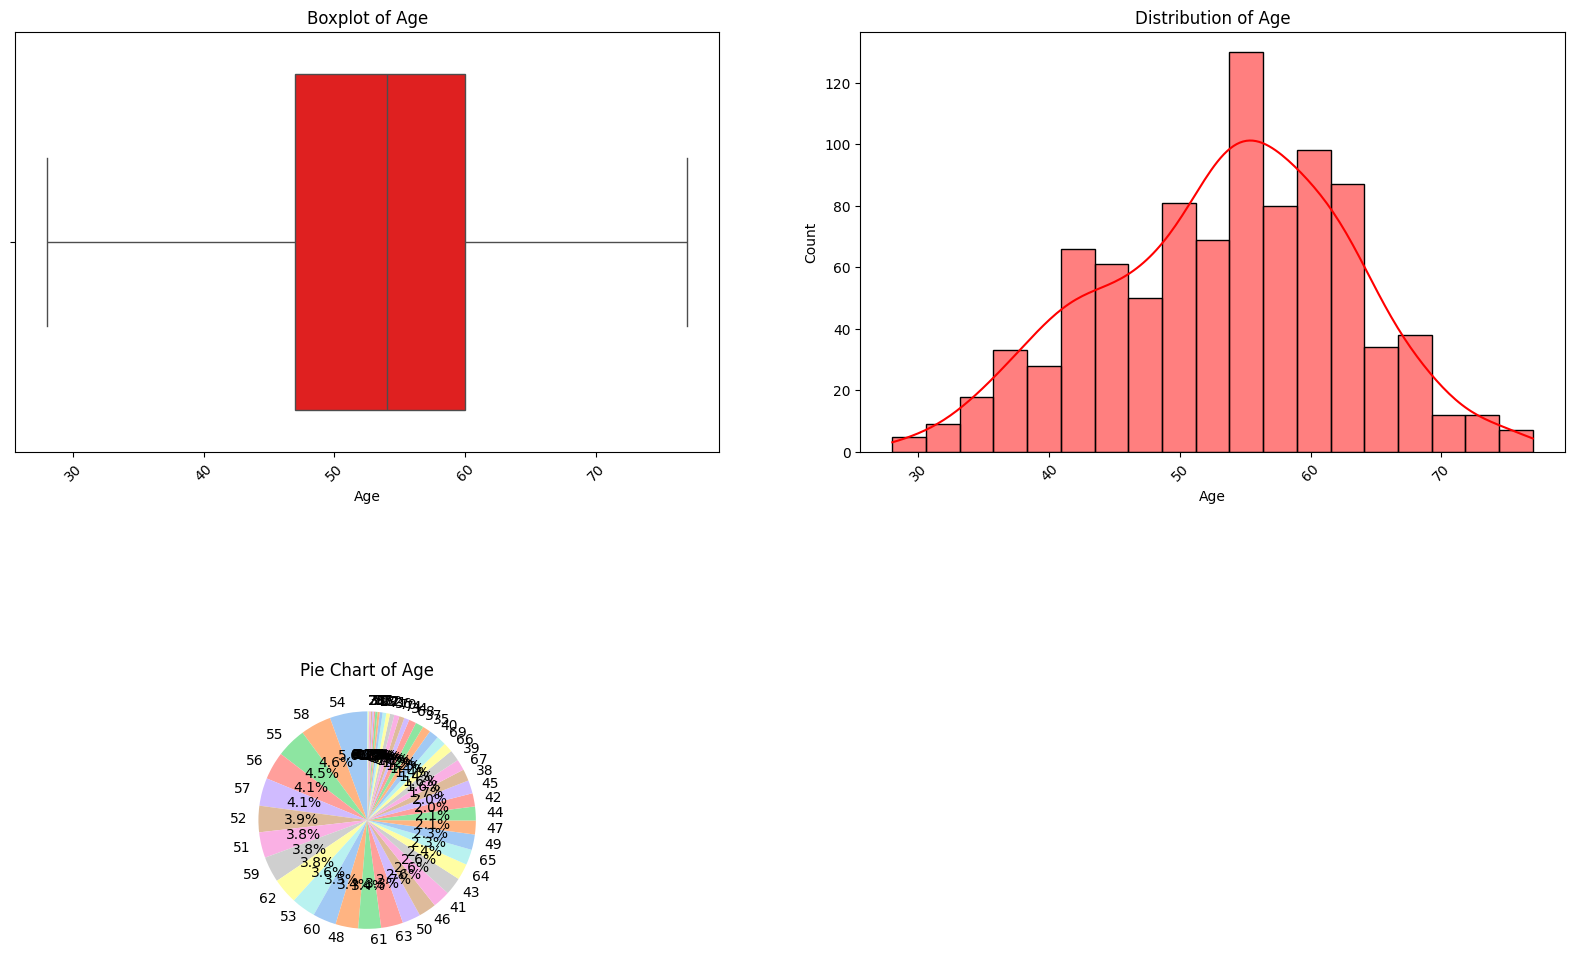

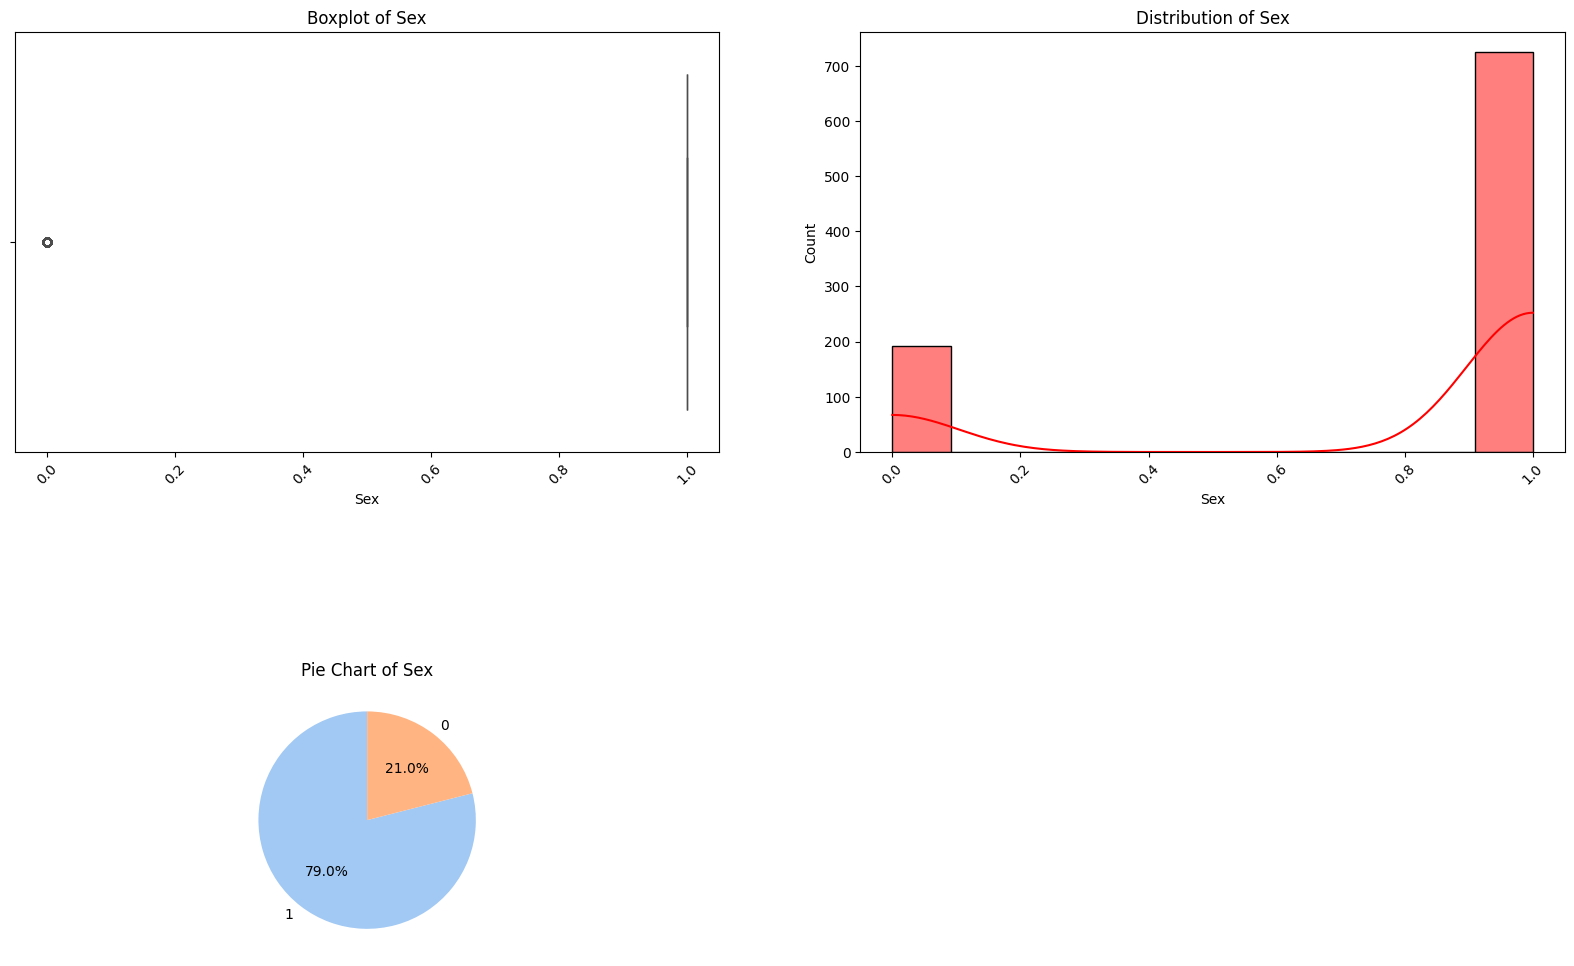

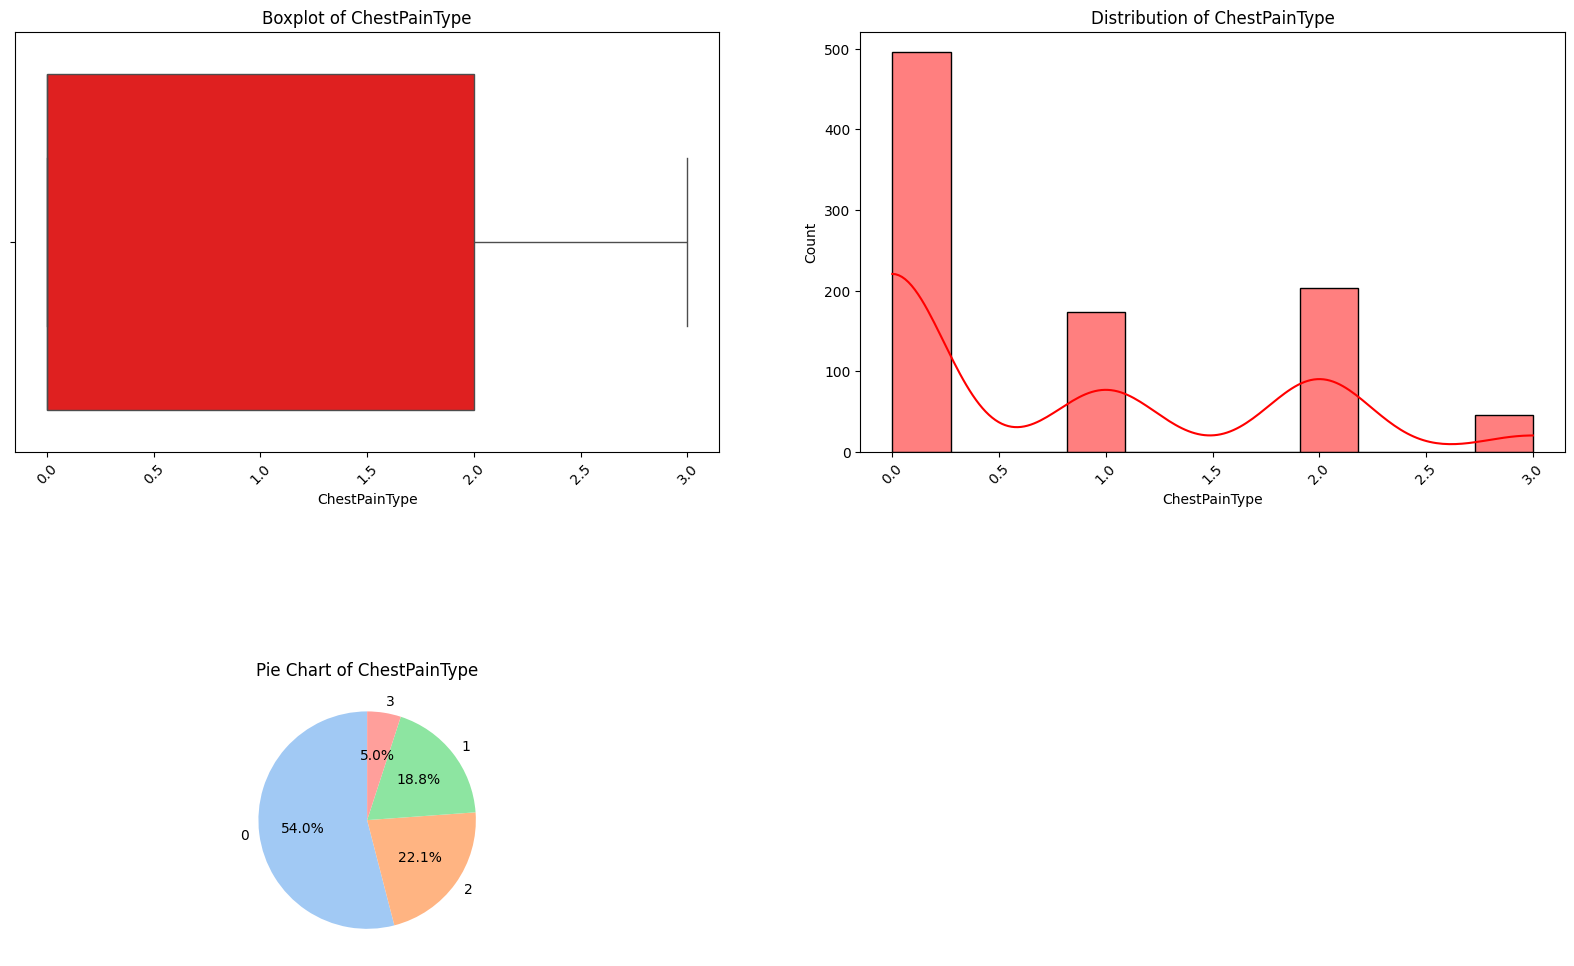

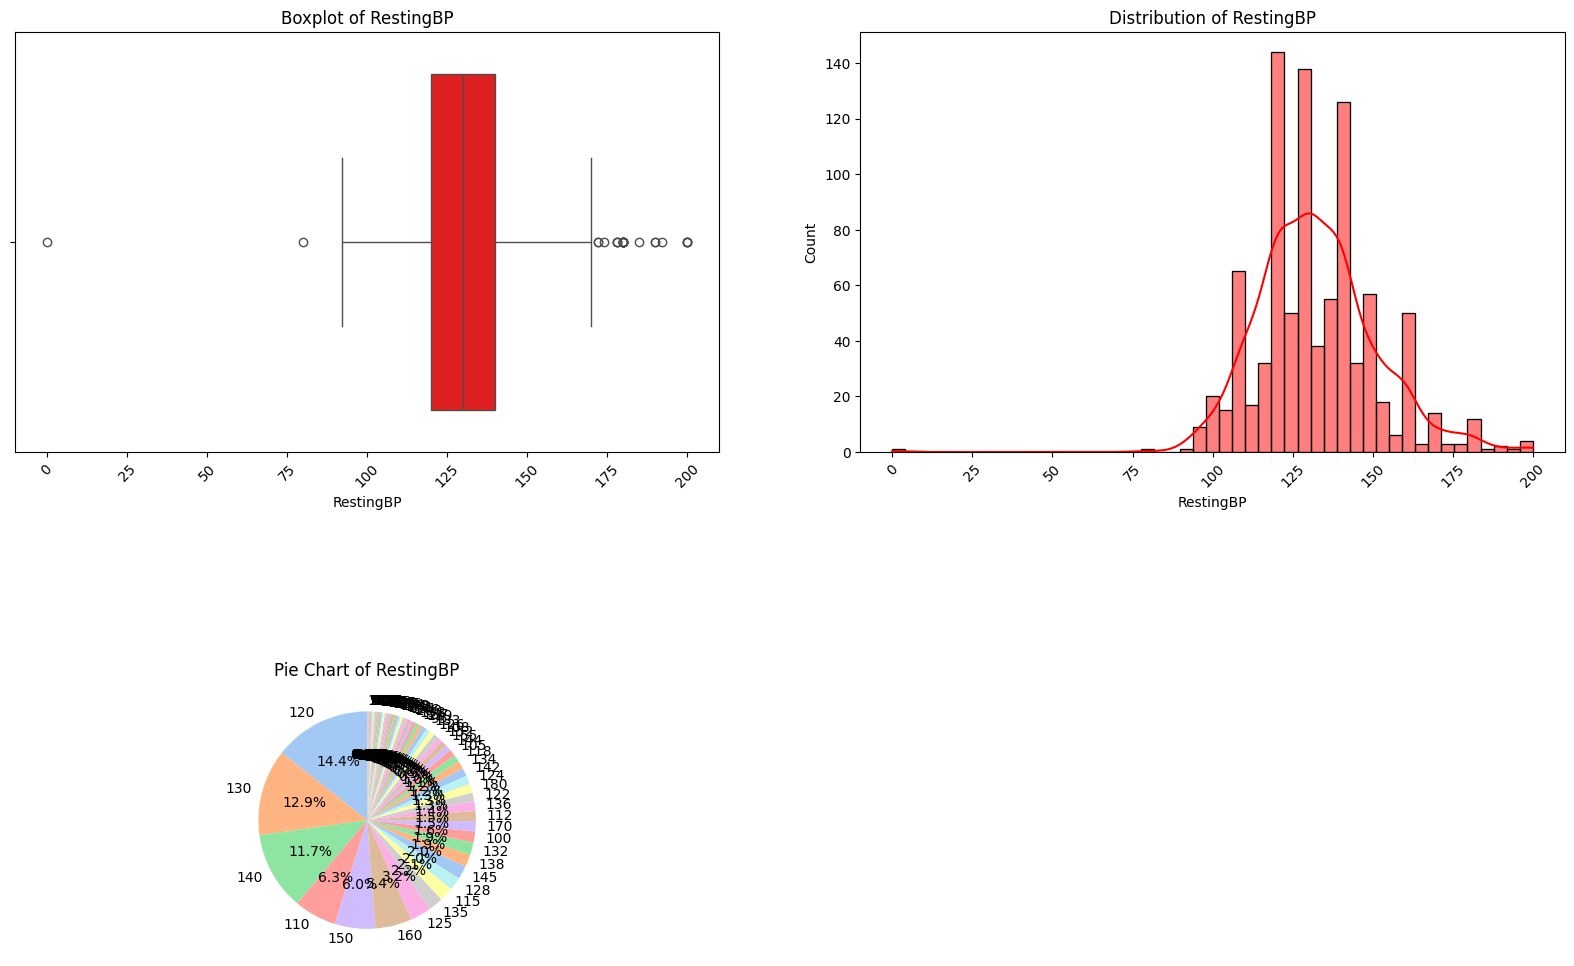

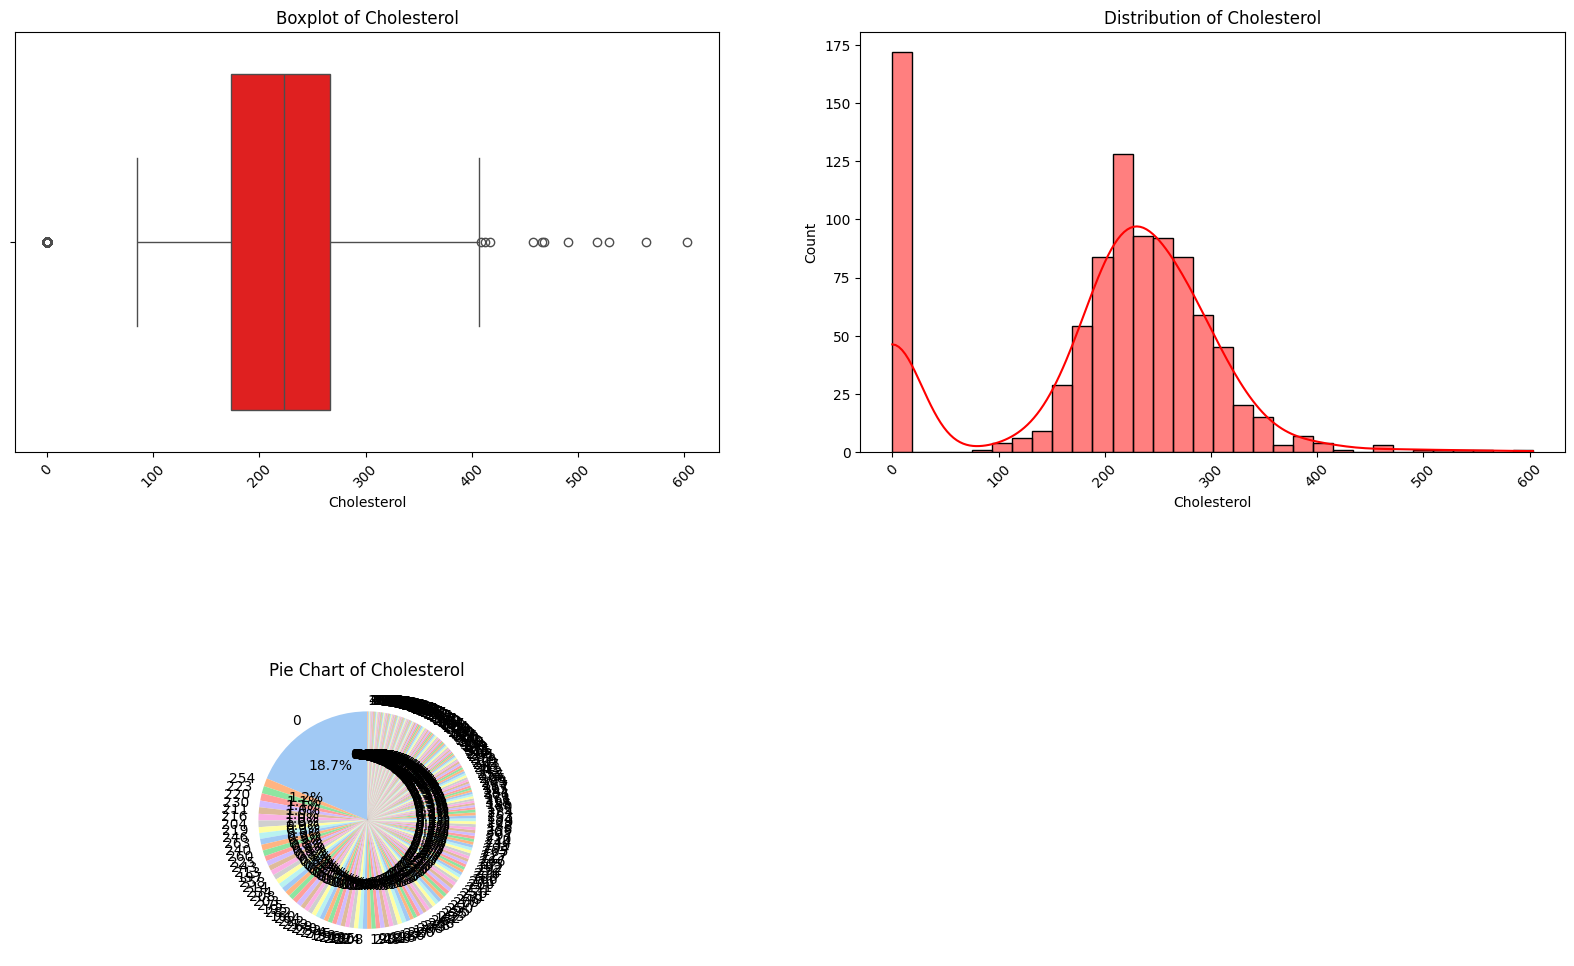

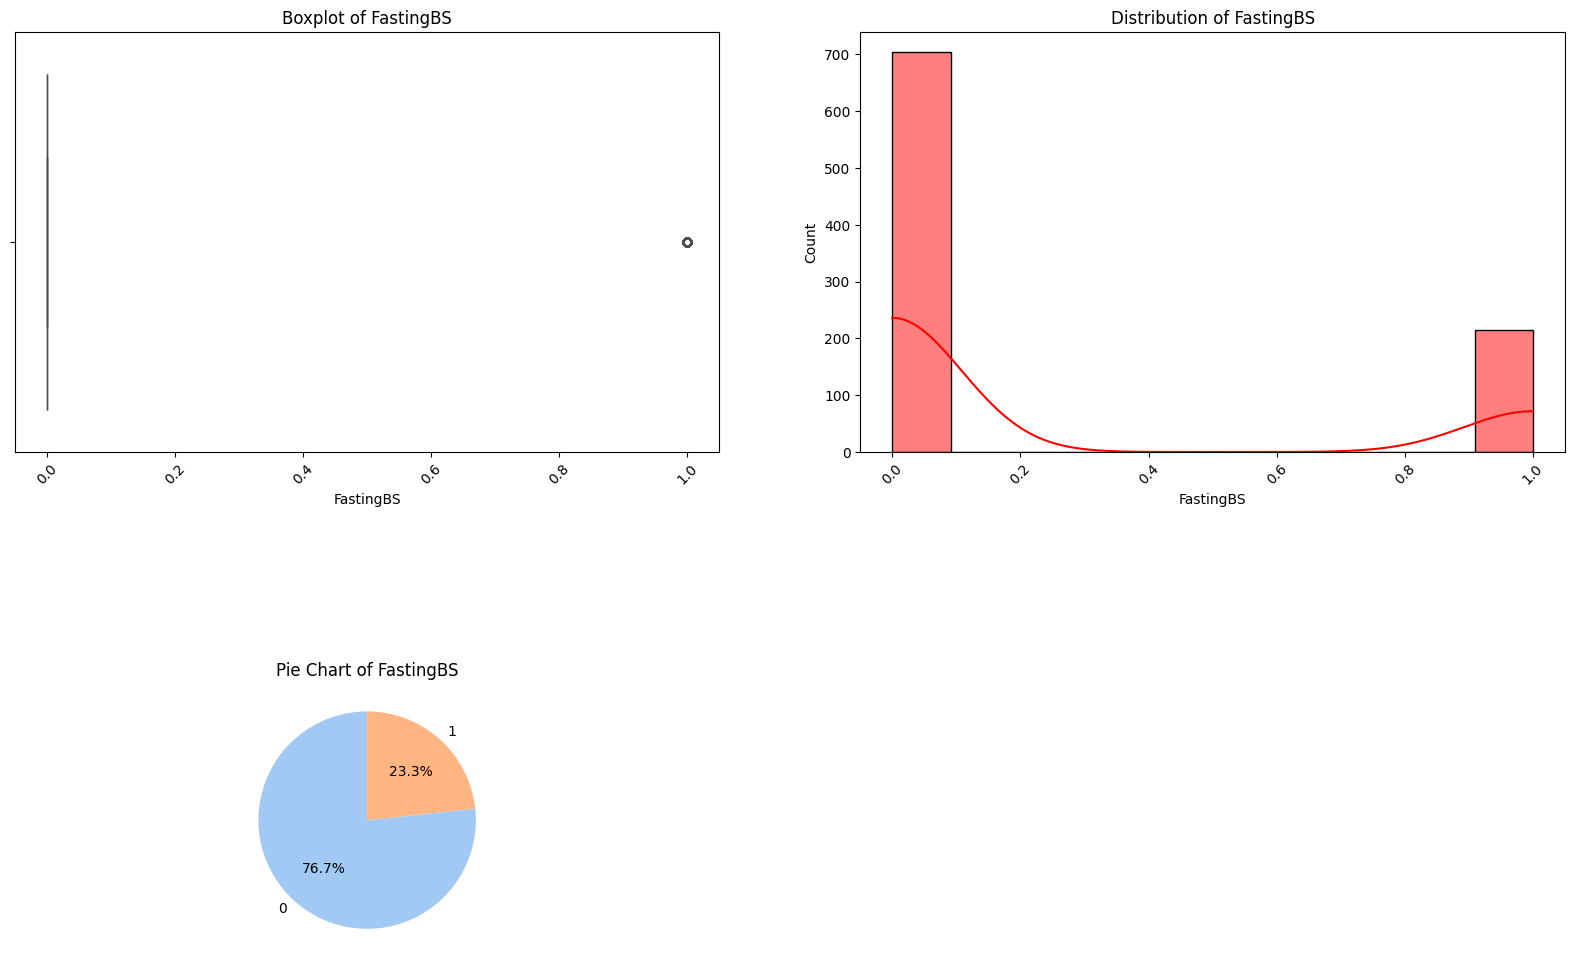

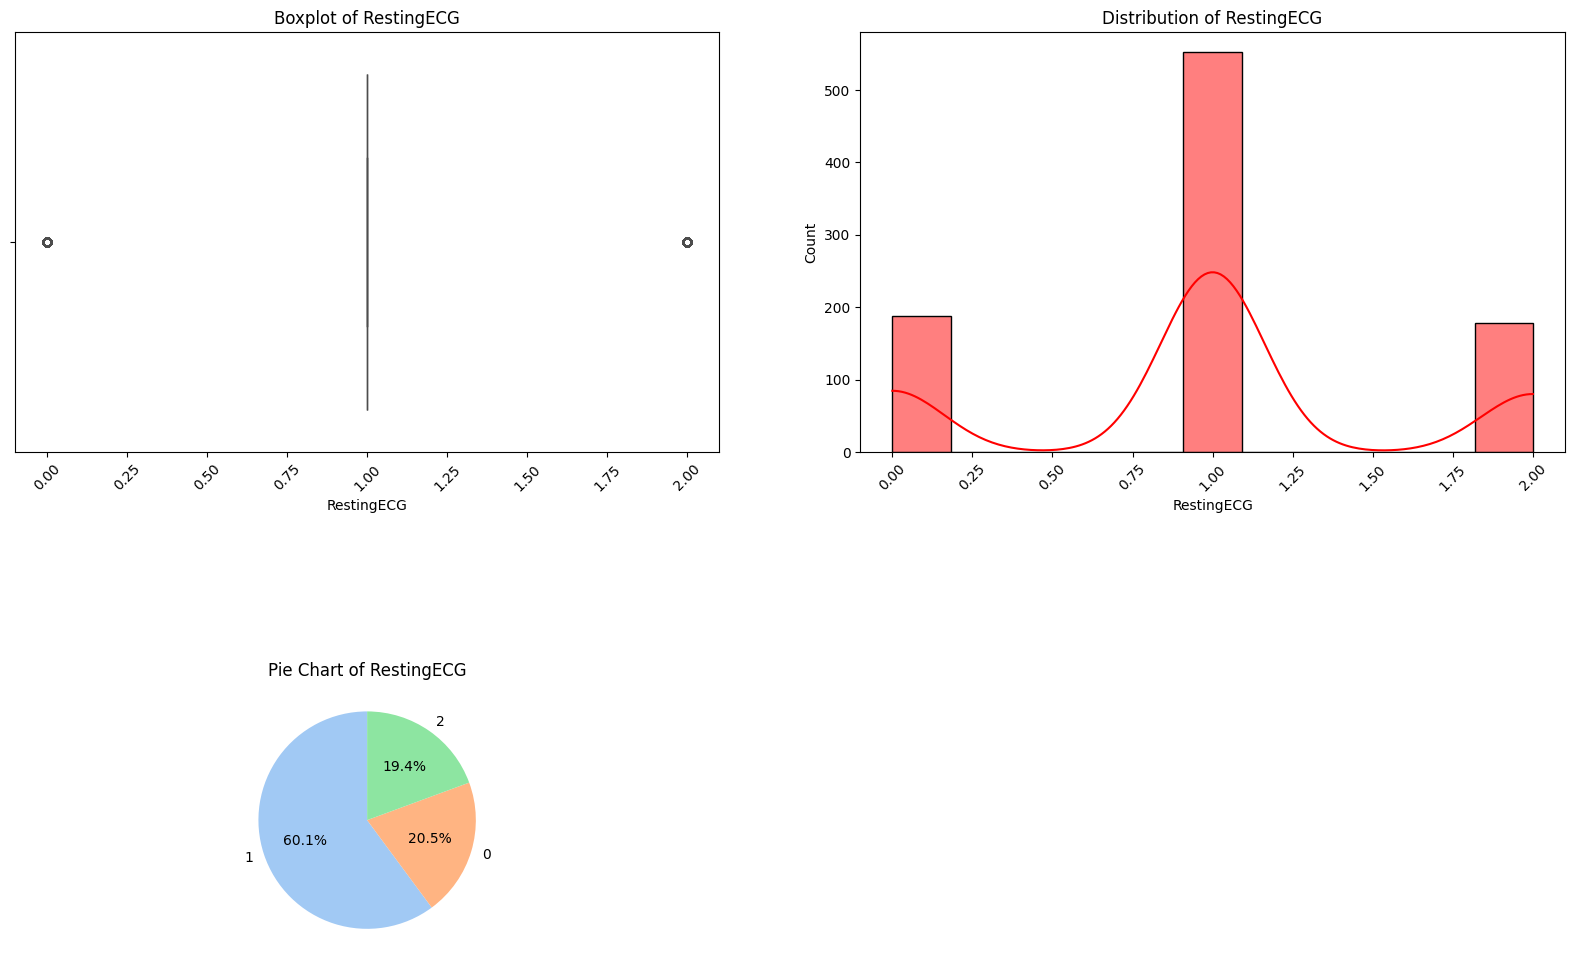

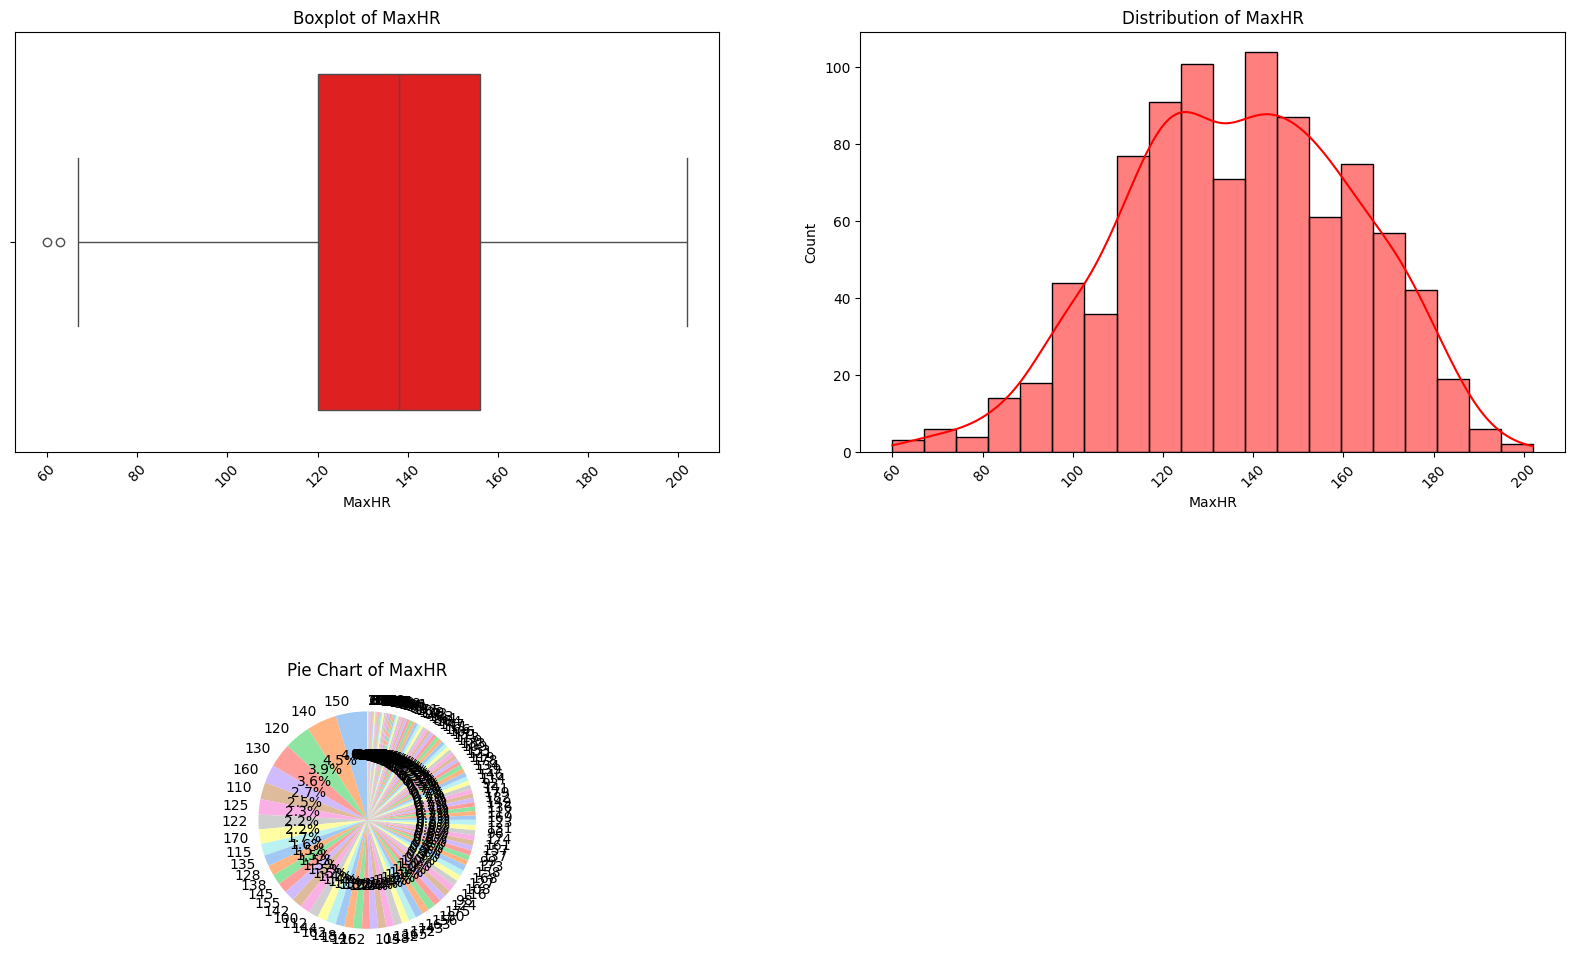

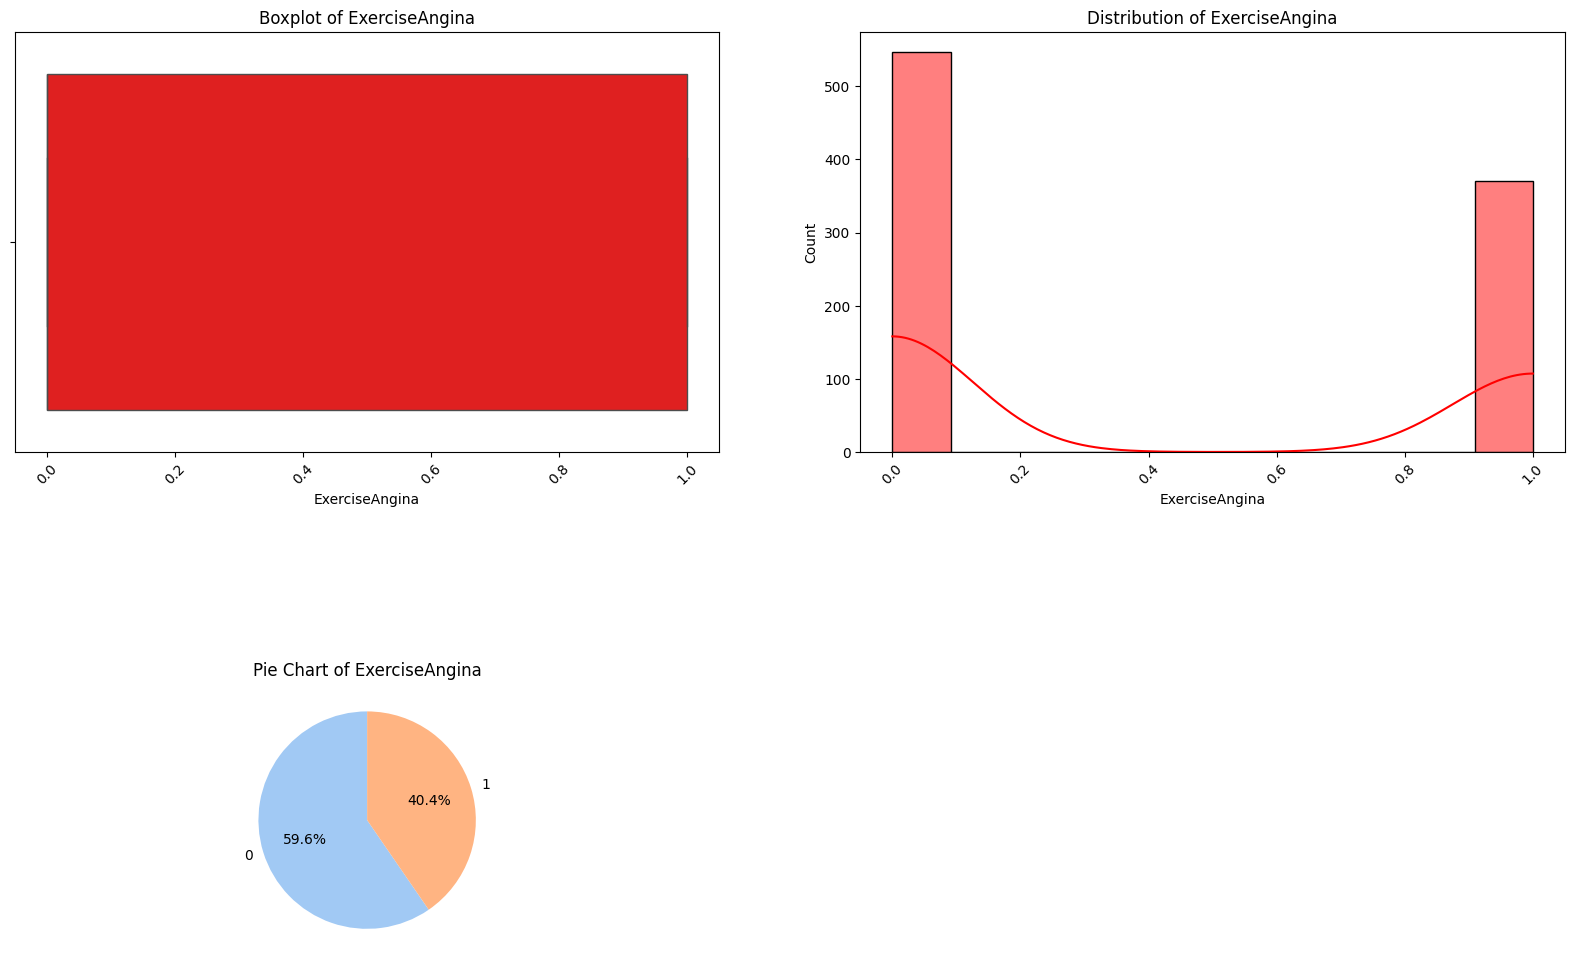

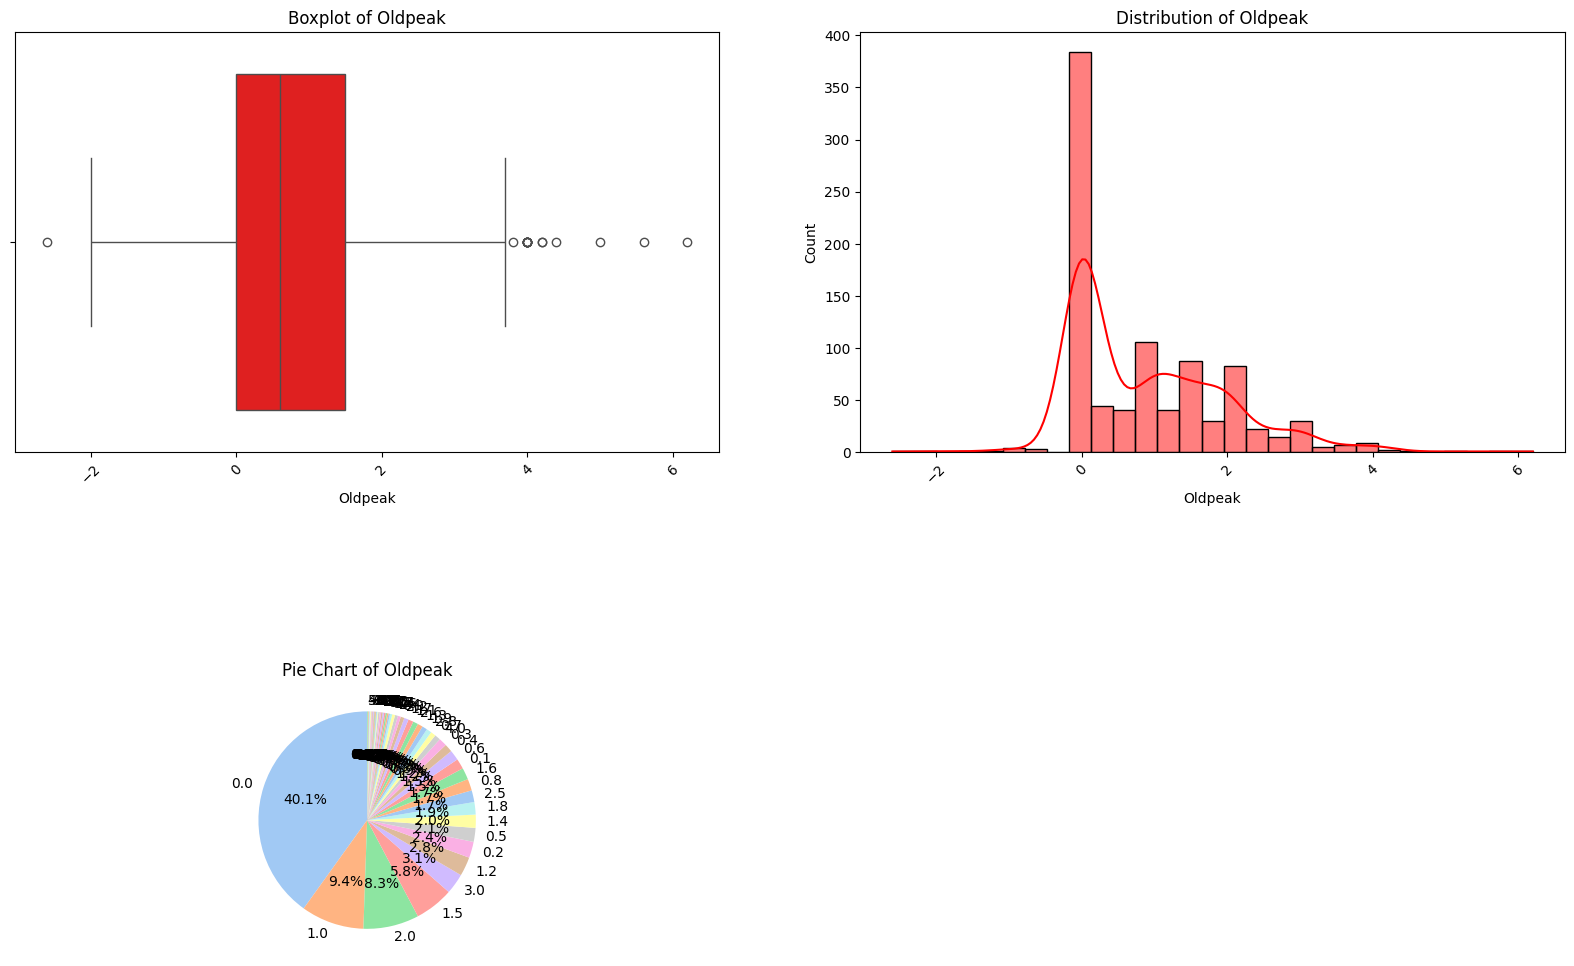

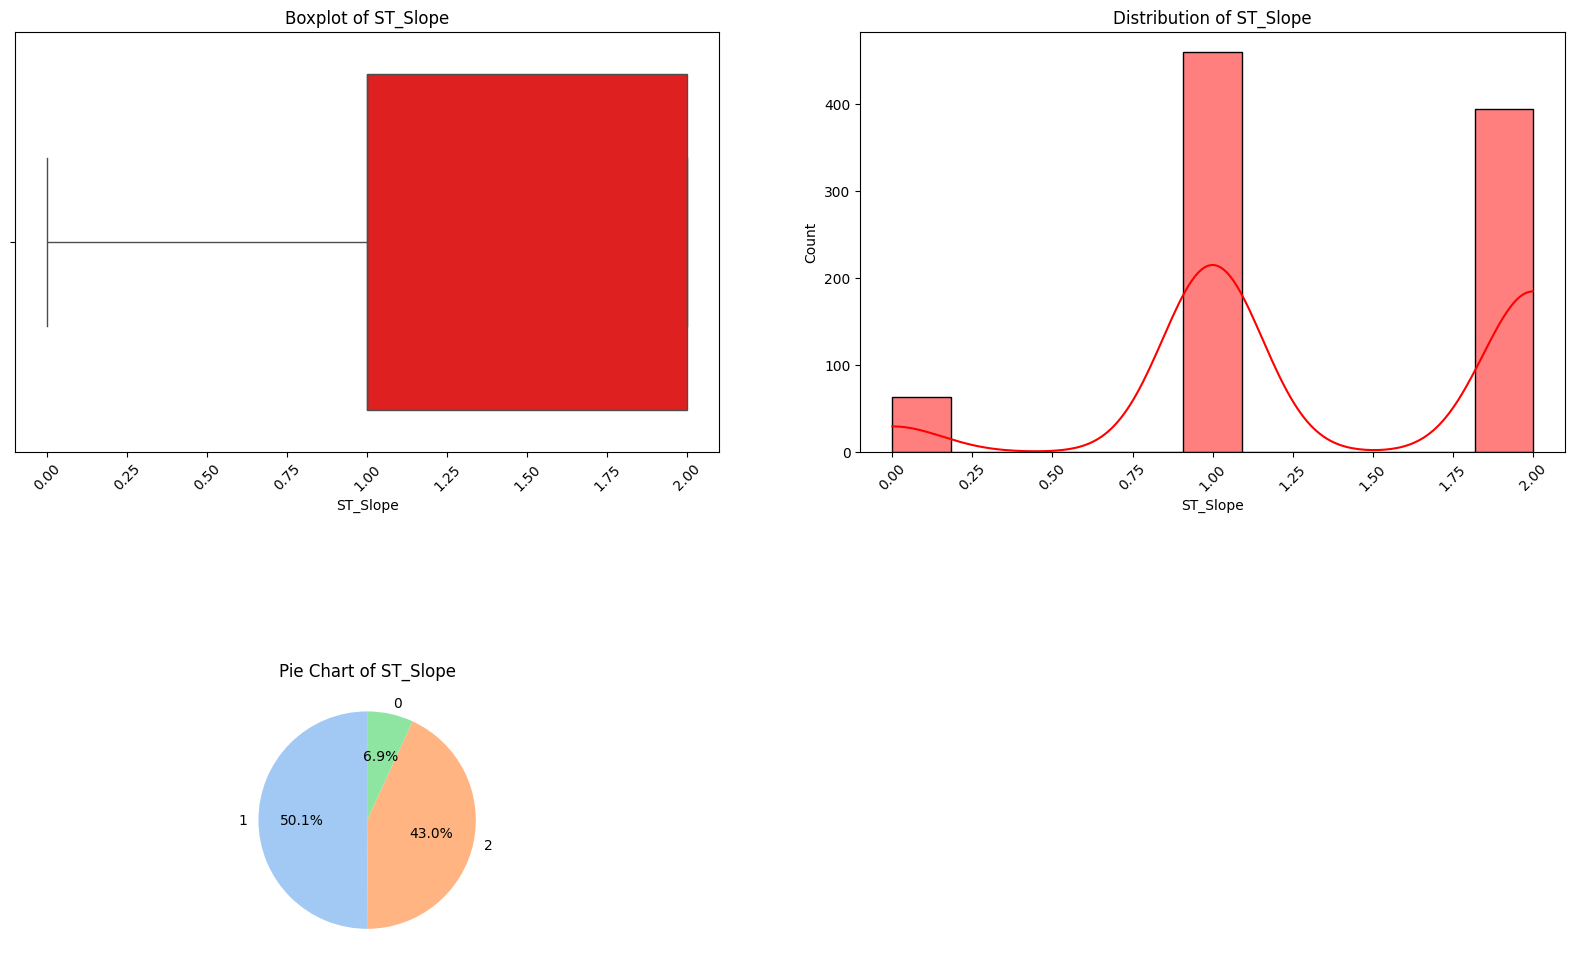

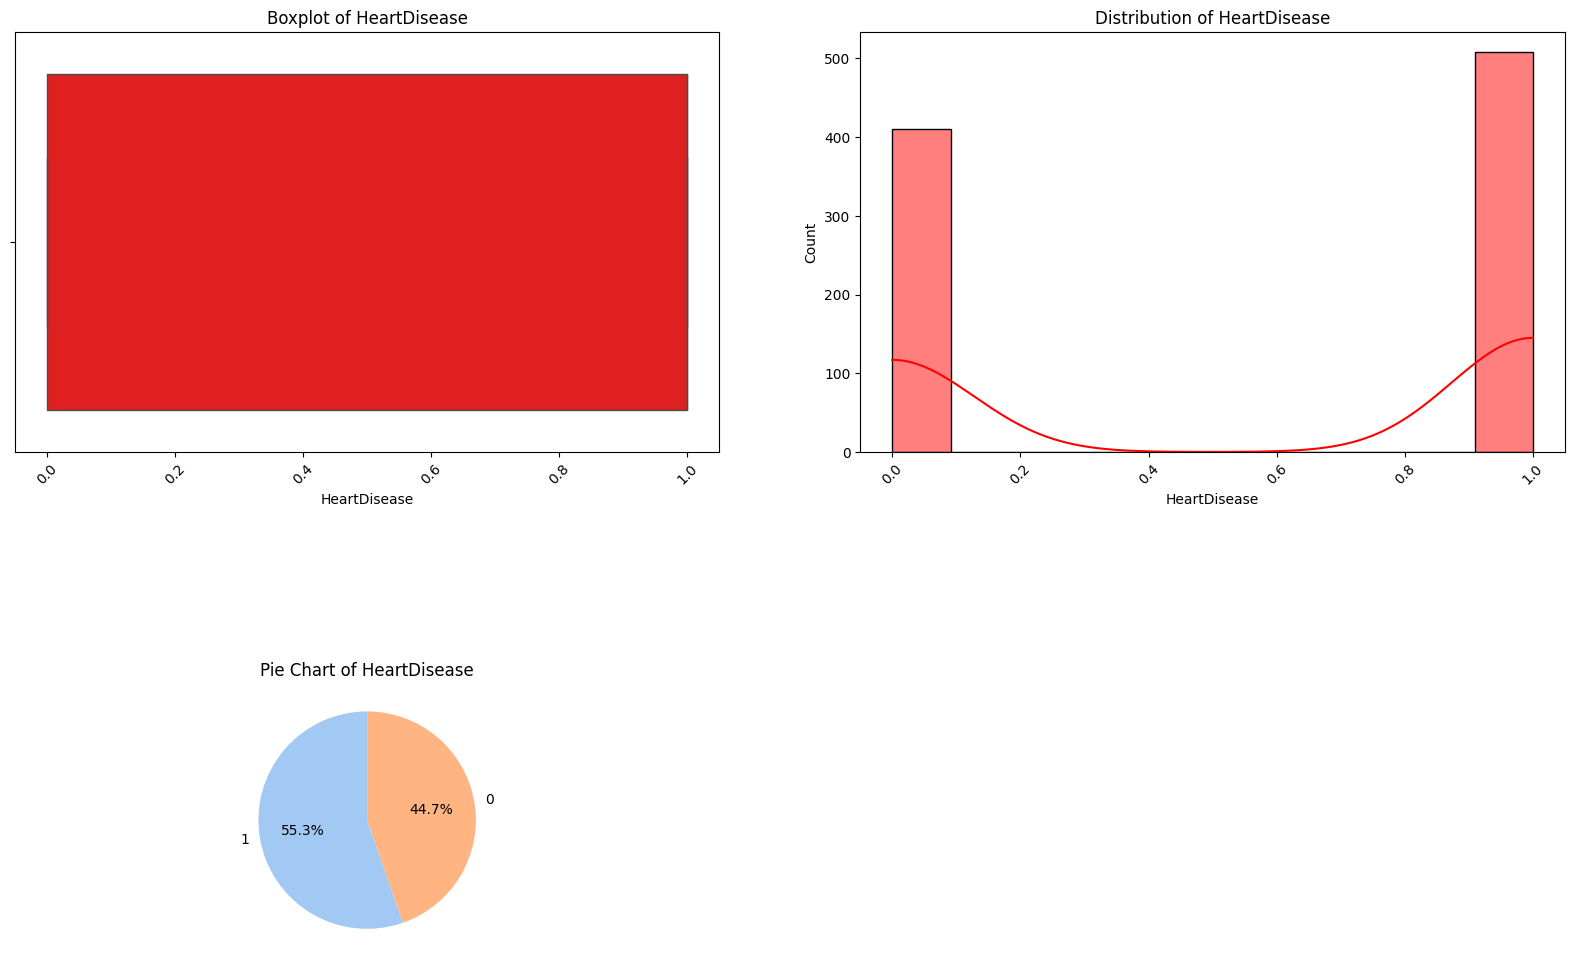

In [17]:
for column in df.columns:
    plt.figure(figsize=(20, 12))
    
    # Subplot 1: Boxplot
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df[column], color='red')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 2: Distribution Plot (Histogram)
    plt.subplot(2, 2, 2)
    sns.histplot(df[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 5: Pie Chart (for proportions of unique values)
    plt.subplot(3, 2, 5)
    unique_counts = df[column].value_counts()
    unique_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('') 


    plt.show()

From the boxplots, we can see that we have outliers in 4 features :
 1.  'RestingBp' 
 2.  'choristol' 
 3.  'maxhr' 
 4.  'Old peak' 

In [18]:
threshold = 1.5

# For RestingBP
Q1_bp = df['RestingBP'].quantile(0.25)
Q3_bp = df['RestingBP'].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp


# For Cholesterol
Q1_chol = df['Cholesterol'].quantile(0.25)
Q3_chol = df['Cholesterol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol


# For MaxHR
Q1_hr = df['MaxHR'].quantile(0.25)
Q3_hr = df['MaxHR'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr

# For Oldpeak
Q1_op = df['Oldpeak'].quantile(0.25)
Q3_op = df['Oldpeak'].quantile(0.75)
IQR_op = Q3_op - Q1_op


# Print the bounds for each feature
print("\nBounds for each feature:")
print(f"RestingBP: Lower = {Q1_bp - threshold * IQR_bp:.2f}, Upper = {Q3_bp + threshold * IQR_bp:.2f}")
print(f"Cholesterol: Lower = {Q1_chol - threshold * IQR_chol:.2f}, Upper = {Q3_chol + threshold * IQR_chol:.2f}")
print(f"MaxHR: Lower = {Q1_hr - threshold * IQR_hr:.2f}, Upper = {Q3_hr + threshold * IQR_hr:.2f}")
print(f"Oldpeak: Lower = {Q1_op - threshold * IQR_op:.2f}, Upper = {Q3_op + threshold * IQR_op:.2f}")


Bounds for each feature:
RestingBP: Lower = 90.00, Upper = 170.00
Cholesterol: Lower = 32.62, Upper = 407.62
MaxHR: Lower = 66.00, Upper = 210.00
Oldpeak: Lower = -2.25, Upper = 3.75


In [19]:
df_1 = df 
df_1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

We will now drop all the outliers

In [20]:
# Define thresholds for all features
lower_bound_bp = Q1_bp - threshold * IQR_bp
upper_bound_bp = Q3_bp + threshold * IQR_bp

lower_bound_chol = Q1_chol - threshold * IQR_chol
upper_bound_chol = Q3_chol + threshold * IQR_chol

lower_bound_hr = Q1_hr - threshold * IQR_hr
upper_bound_hr = Q3_hr + threshold * IQR_hr

lower_bound_op = Q1_op - threshold * IQR_op
upper_bound_op = Q3_op + threshold * IQR_op

# Filter out outliers for all features
df_cleaned = df[
    (df['RestingBP'] >= lower_bound_bp) & (df['RestingBP'] <= upper_bound_bp) &
    (df['Cholesterol'] >= lower_bound_chol) & (df['Cholesterol'] <= upper_bound_chol) &
    (df['MaxHR'] >= lower_bound_hr) & (df['MaxHR'] <= upper_bound_hr) &
    (df['Oldpeak'] >= lower_bound_op) & (df['Oldpeak'] <= upper_bound_op)
]

# Check the number of rows before and after dropping outliers
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Original number of rows: 918
Number of rows after removing outliers: 702


The new data frame

In [21]:
df_cleaned

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[702 rows x 12 columns]

As we see from the frame above, the index of some rows is wrong; we have row with index 917 while we only have 702 rows, let's reset the index before moving on

In [22]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
697   45    1              3        110          264          0           1   
698   68    1              0        144          193          1           1   
699   57    1              0        130          131          0           1   
700   57    0              1        130          236          0           0   
701   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
697    132               0      1.2         1             1  
698    141               0      3.4         1             1  
699    115               1      1.2         1             1  
700    174               0      0.0         1             1  
701    173               0      0.0         2             0  

[702 rows x 12 columns]

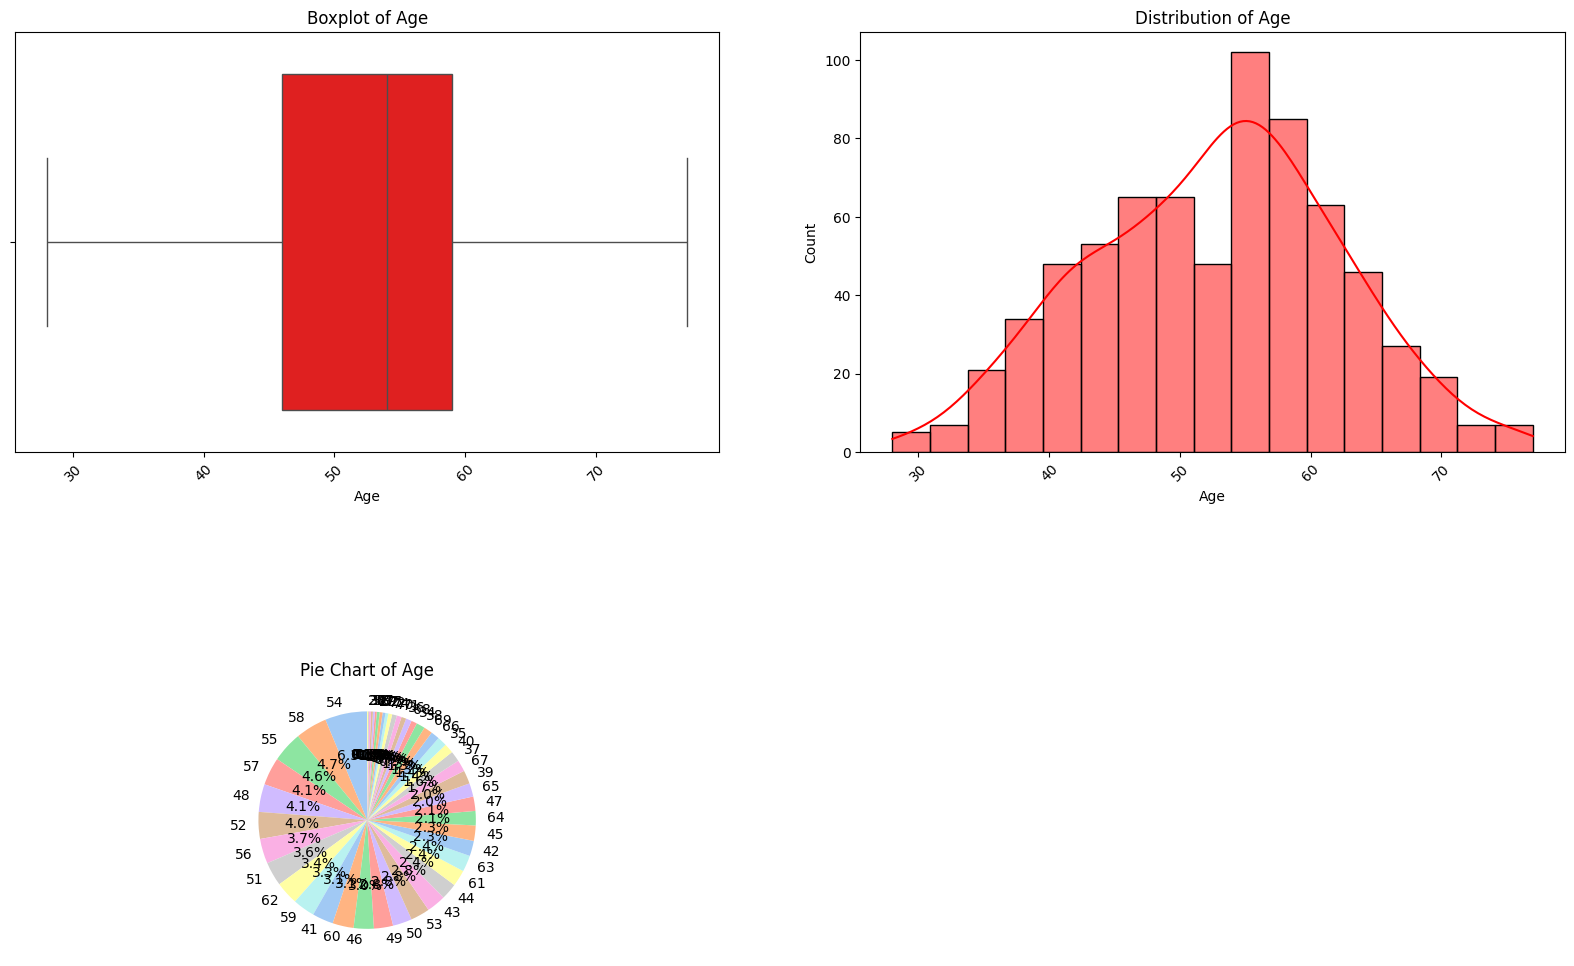

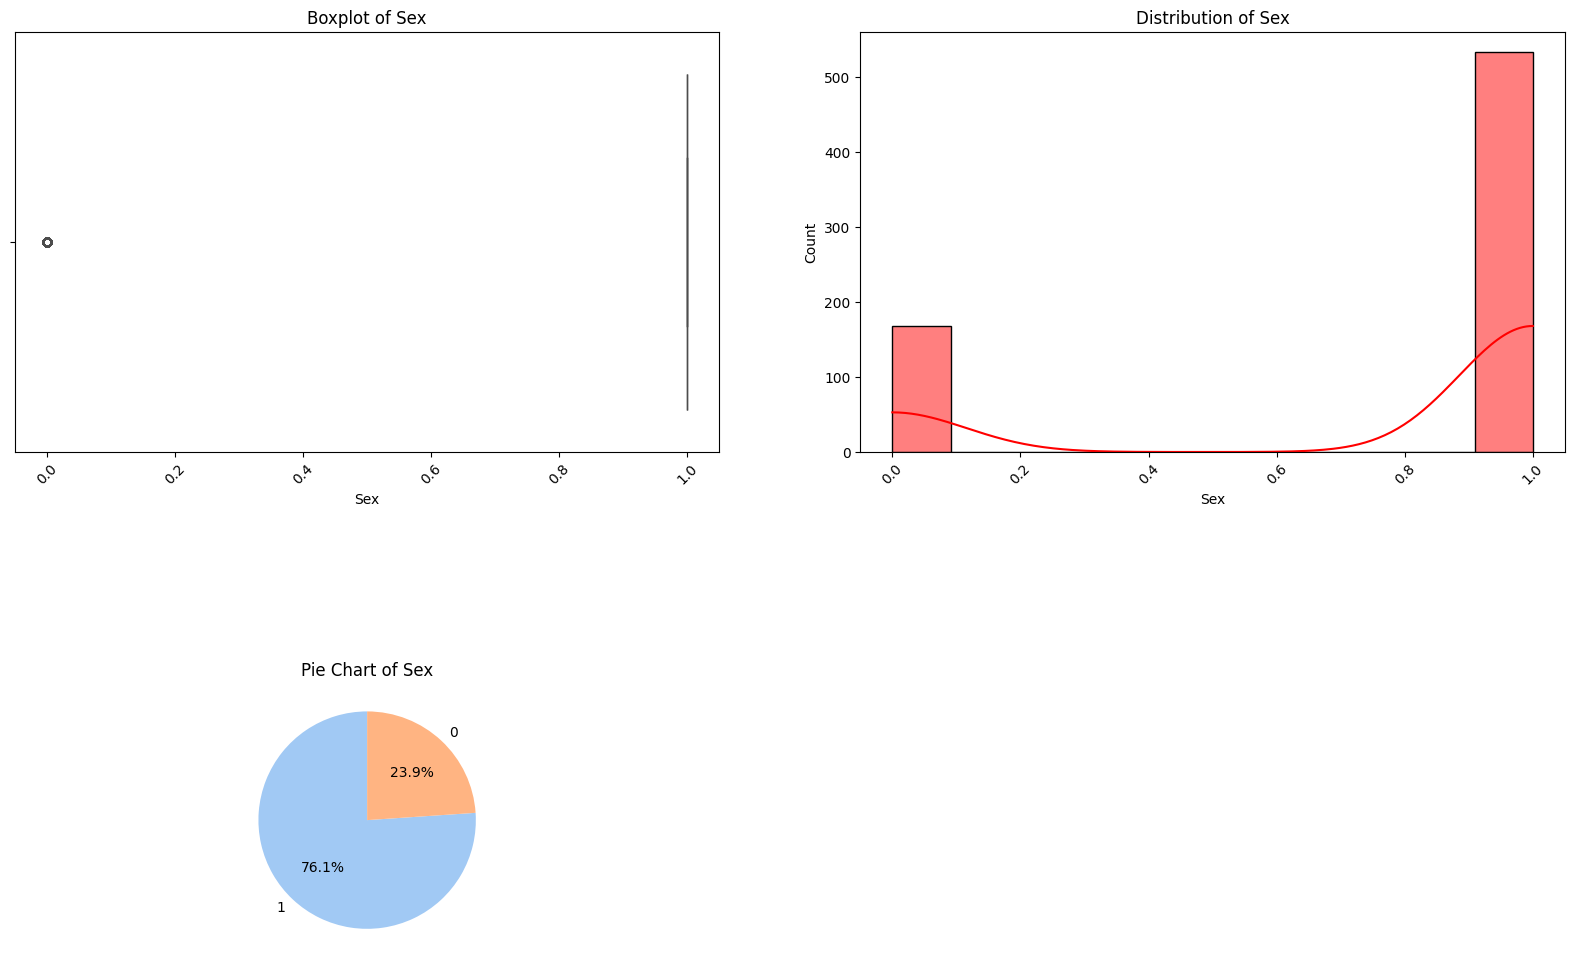

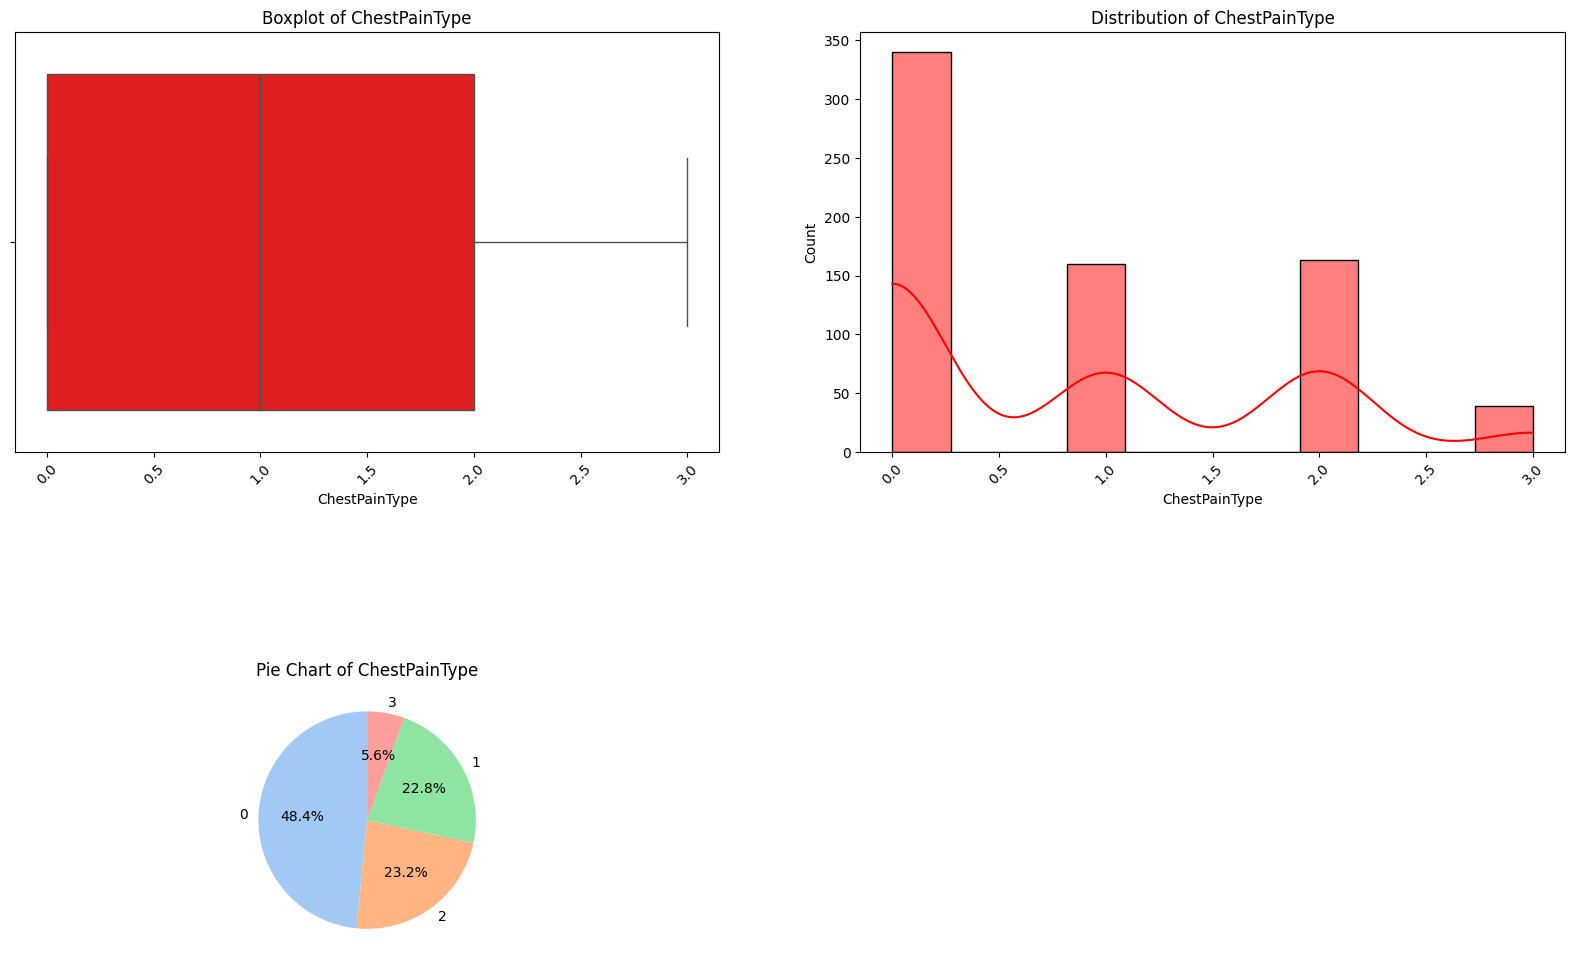

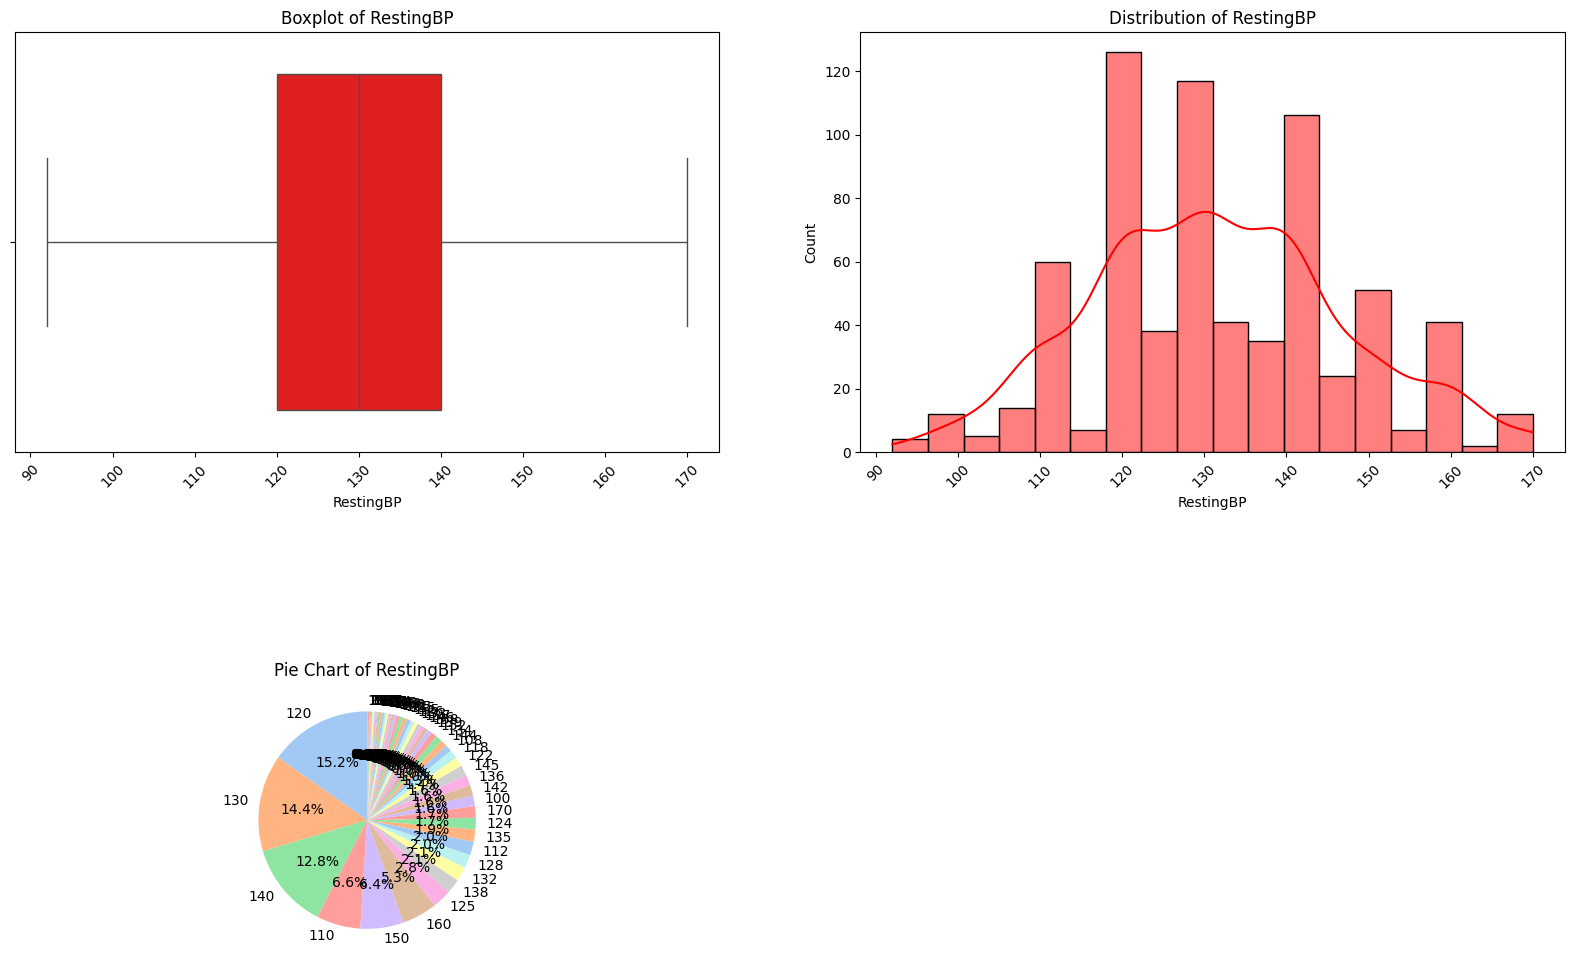

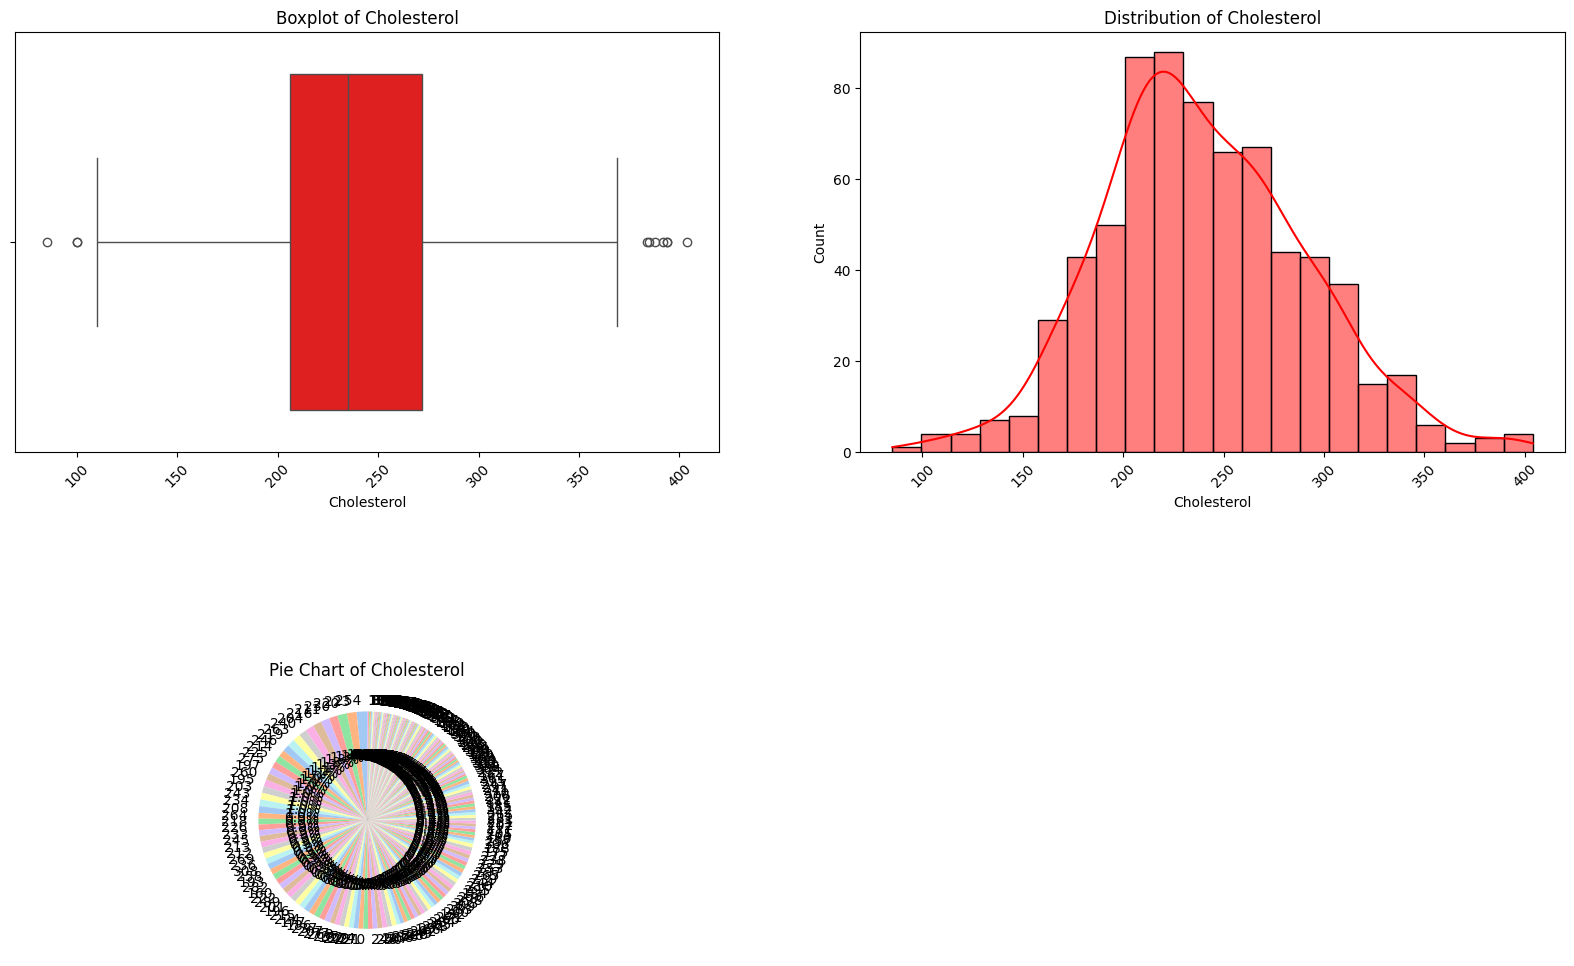

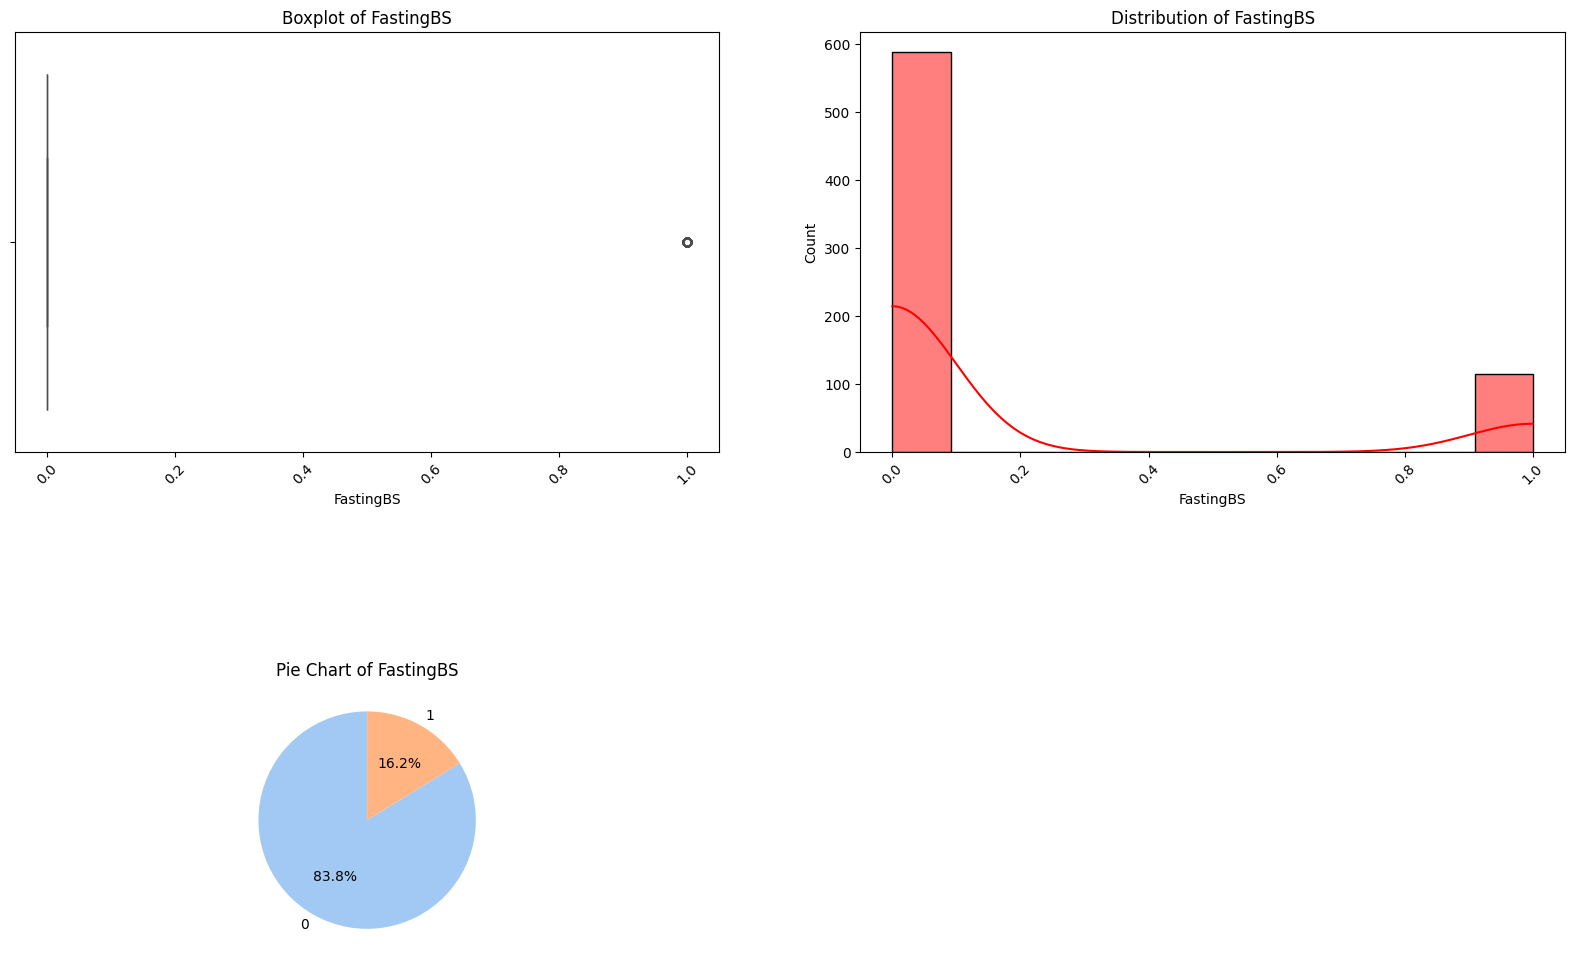

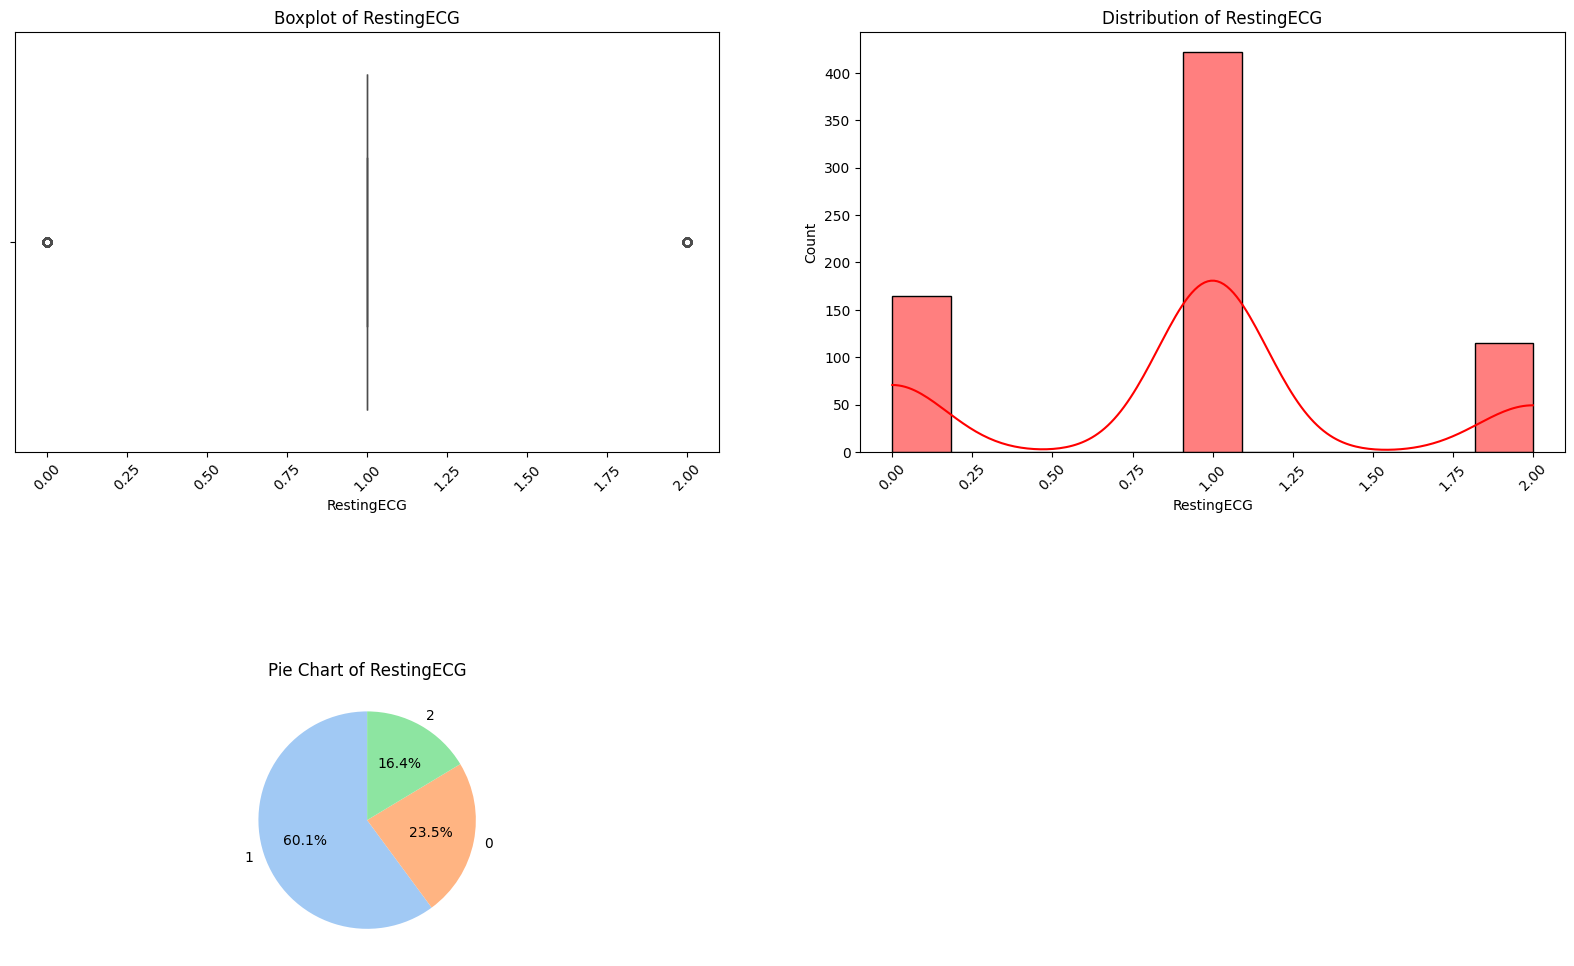

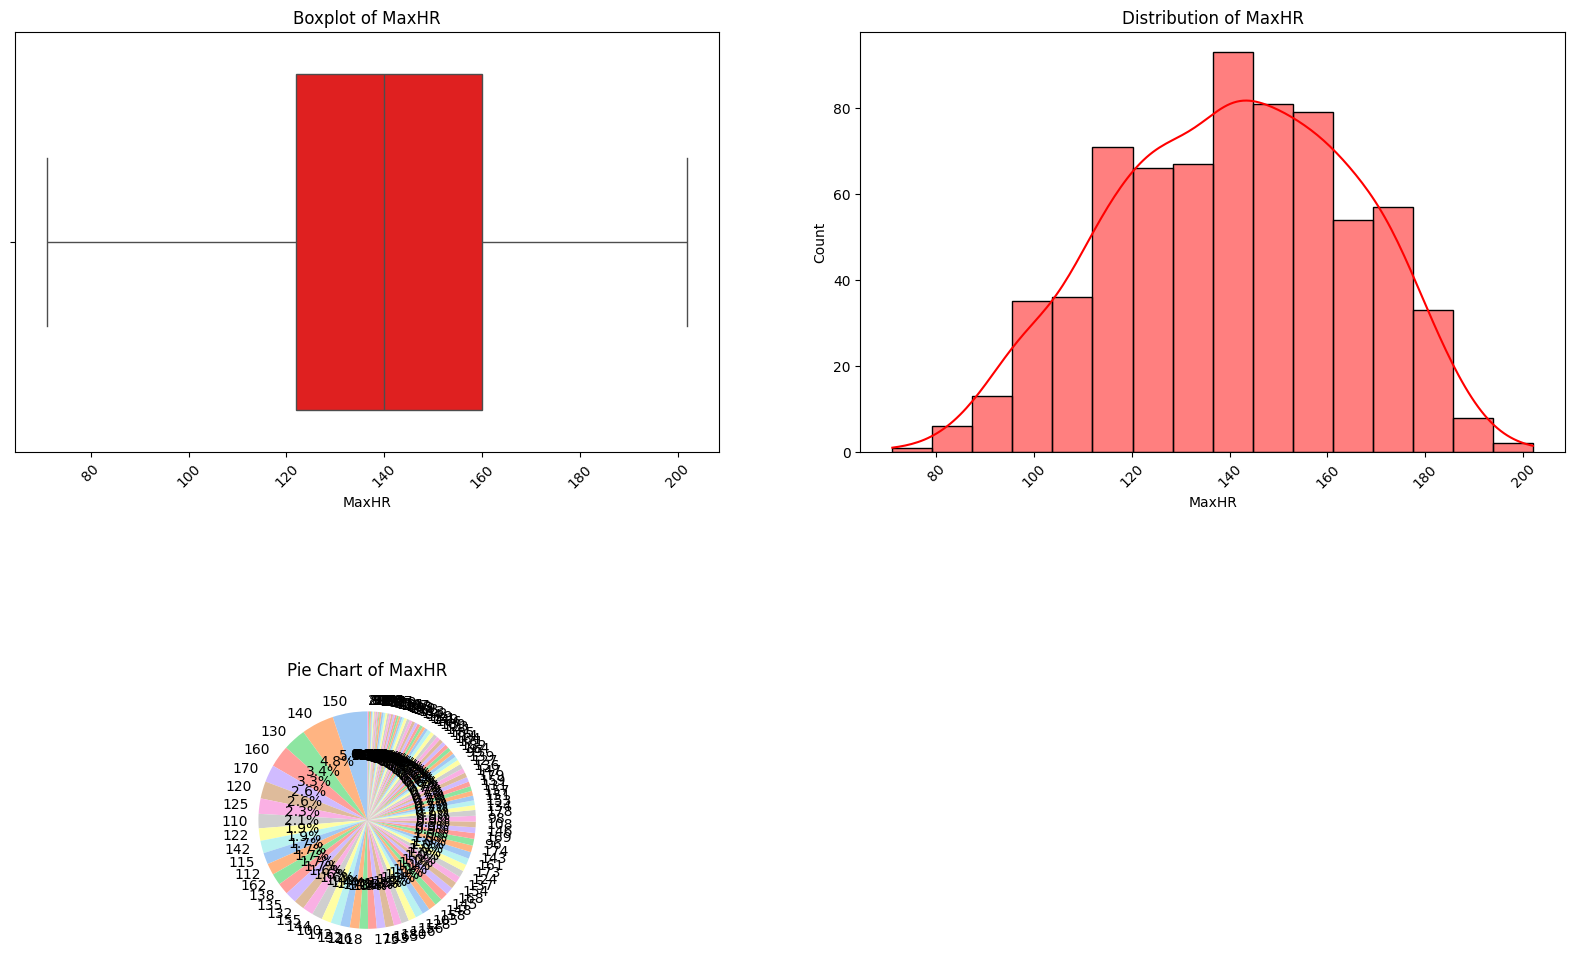

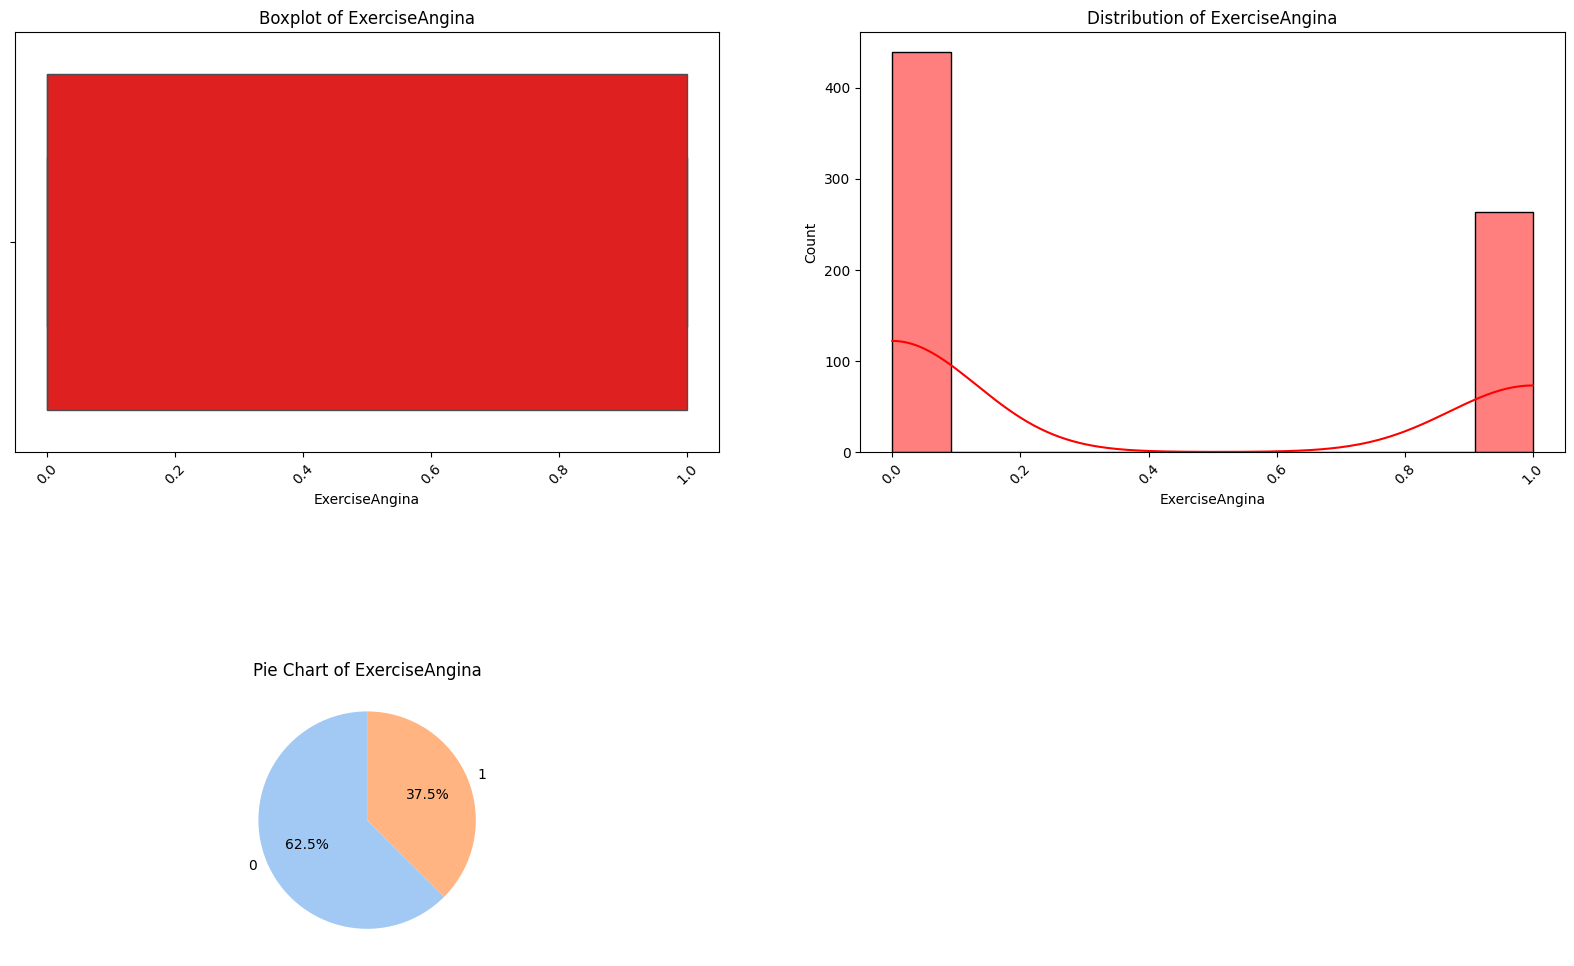

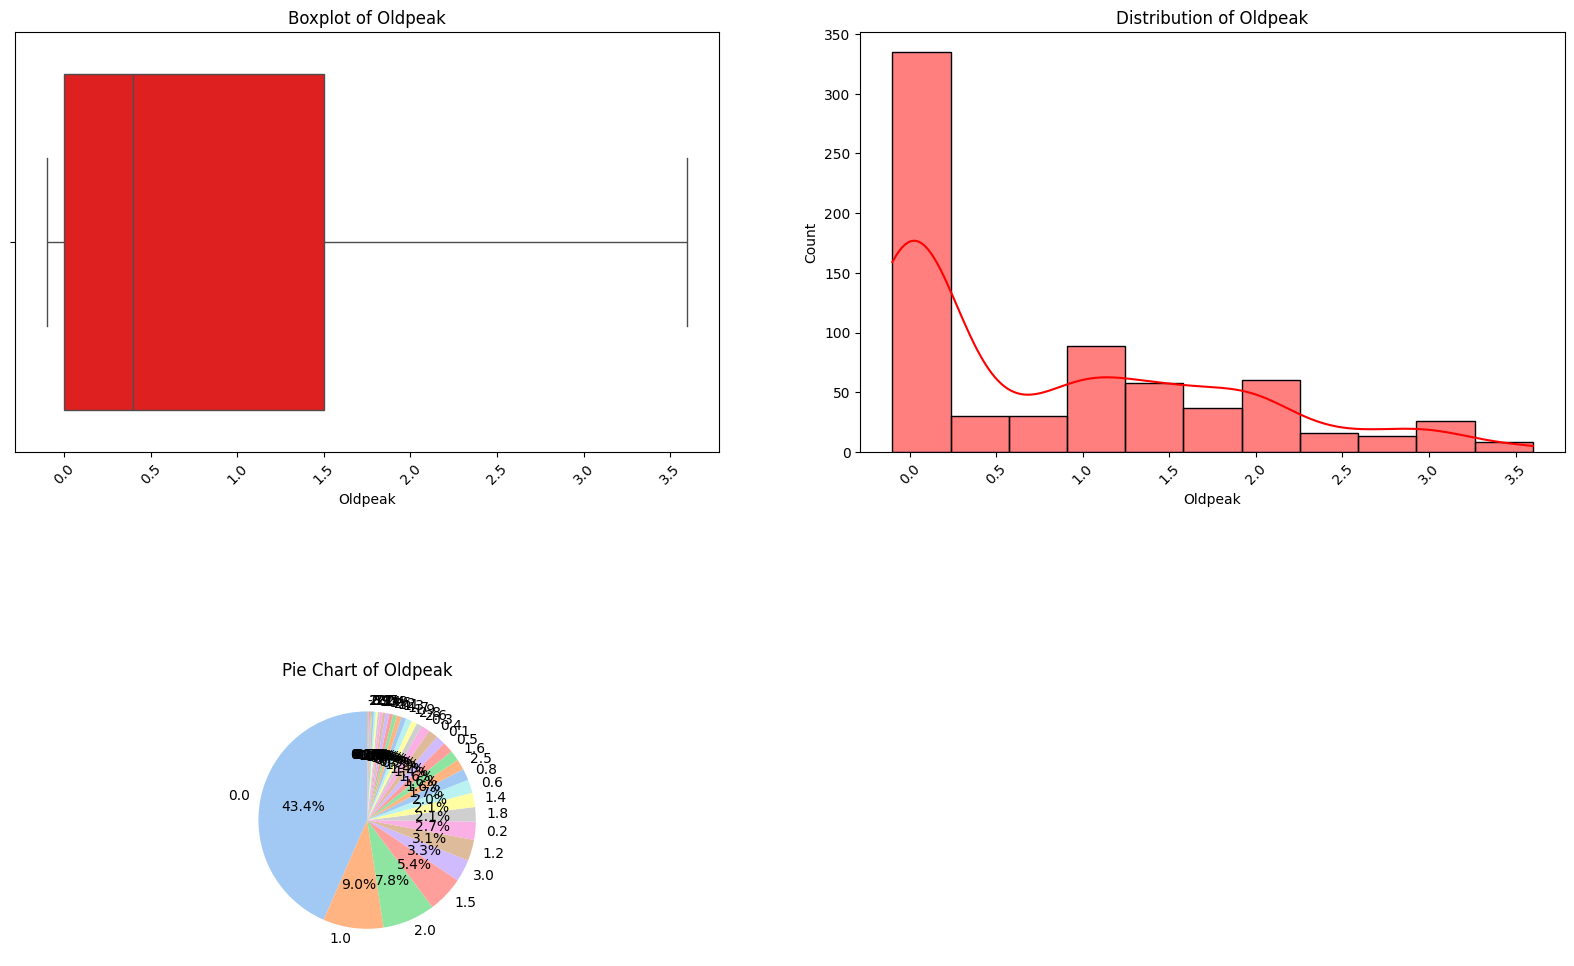

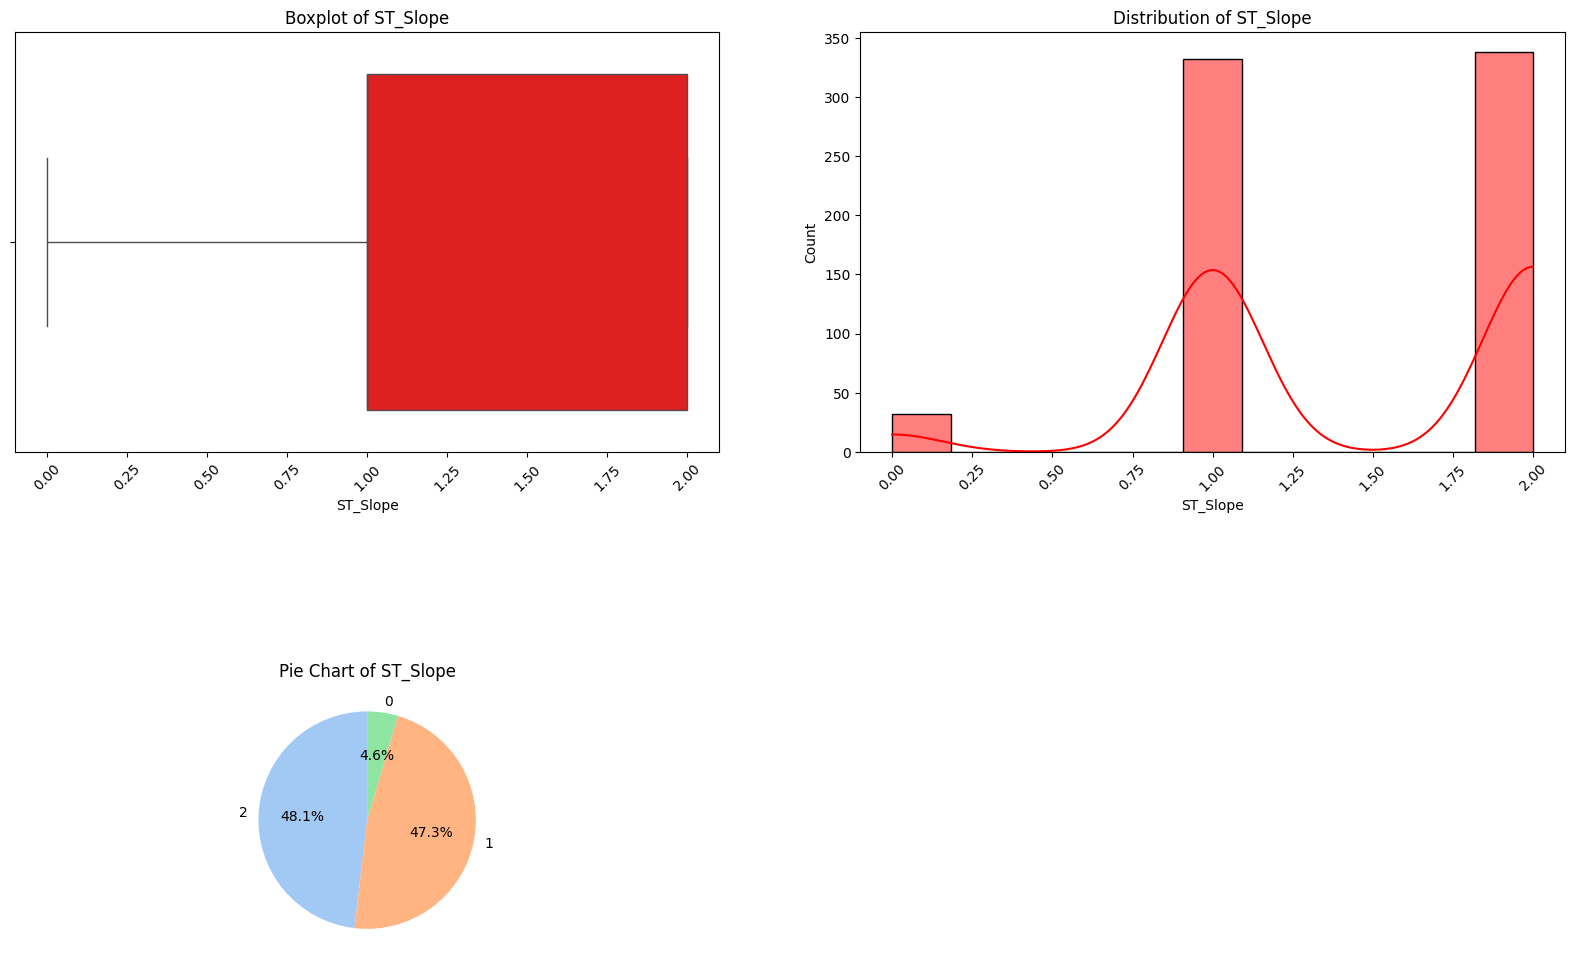

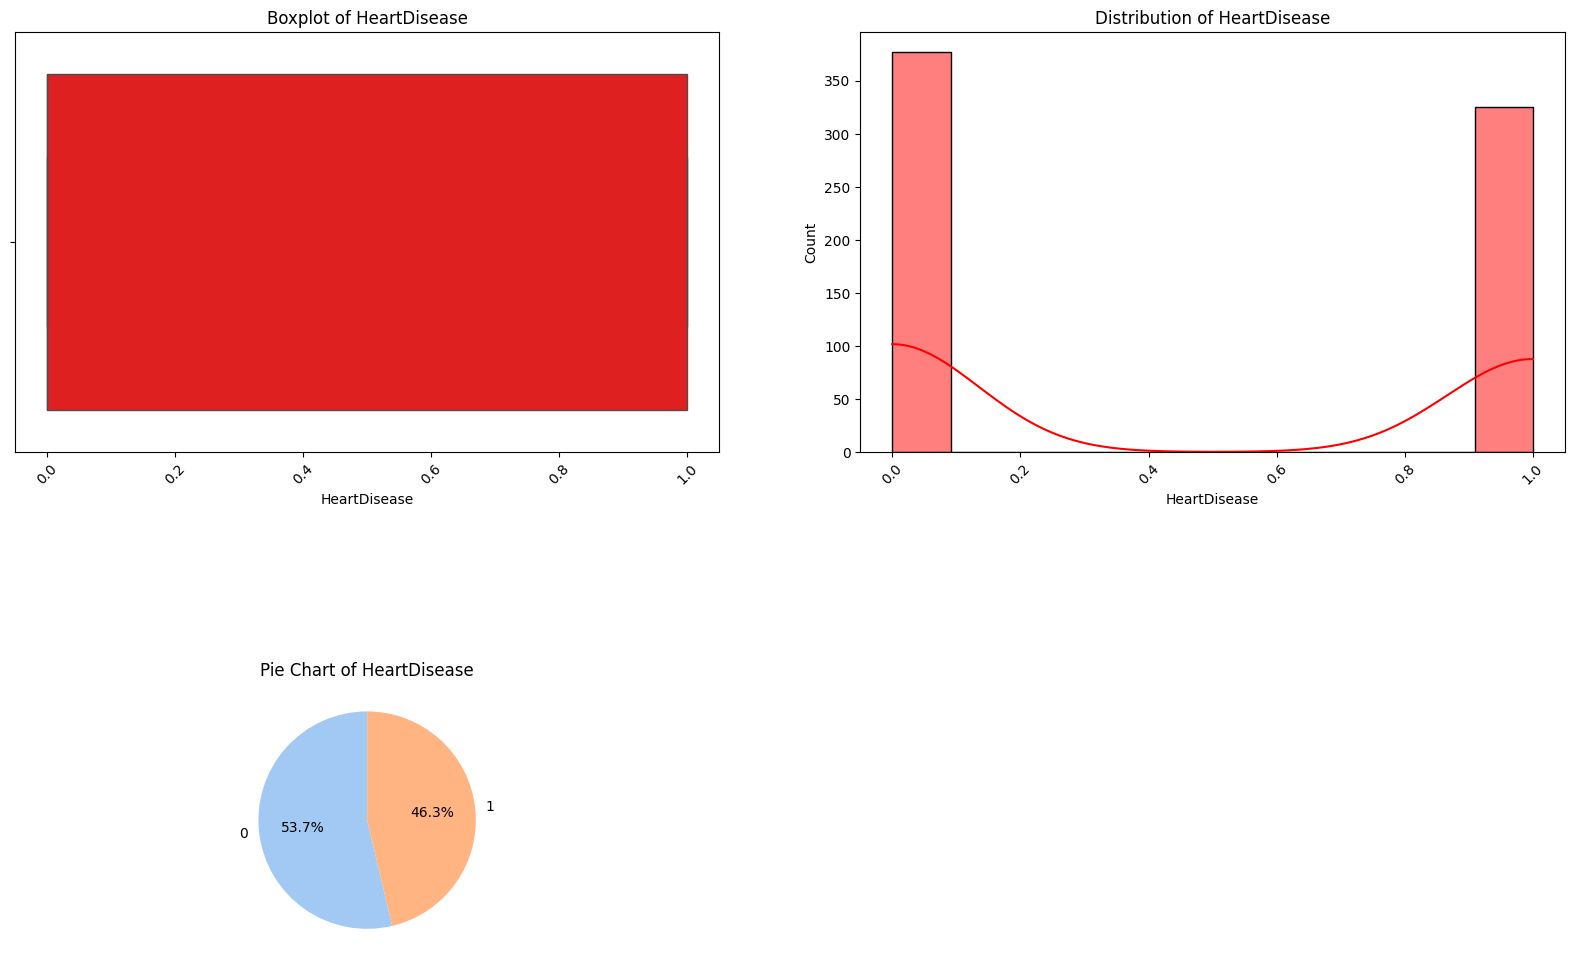

In [23]:
for column in df_cleaned.columns:
    plt.figure(figsize=(20, 12))
    
    # Subplot 1: Boxplot
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df_cleaned[column], color='red')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 2: Distribution Plot (Histogram)
    plt.subplot(2, 2, 2)
    sns.histplot(df_cleaned[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Subplot 5: Pie Chart (for proportions of unique values)
    plt.subplot(3, 2, 5)
    unique_counts = df_cleaned[column].value_counts()
    unique_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('') 


    plt.show()

As we can see, most of the continues features are gaussian distributed, except for the 'OldPeak' that is shifted left

PCA

In [24]:
corr = df.corr()

this will show all the features that have correlation > 0.5 in absolute value. We will also remove the features with correlation = 1; to remove the correlation of a feature with itself

If we have two features with a correlation of at least 90%, then these features are so alike that they can be reduced into one featues using PCA

In [25]:
mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

ST_Slope      HeartDisease   -0.558771
HeartDisease  ST_Slope       -0.558771
Oldpeak       ST_Slope       -0.501921
ST_Slope      Oldpeak        -0.501921
dtype: float64

As we can see, our largest correlation is 55%, not worth it, we will directly standaradize the data and apply PCA with two principle components as required

In [26]:
df_pca1 = df_cleaned.copy()
df_pca1

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
697   45    1              3        110          264          0           1   
698   68    1              0        144          193          1           1   
699   57    1              0        130          131          0           1   
700   57    0              1        130          236          0           0   
701   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
697    132               0      1.2         1             1  
698    141               0      3.4         1             1  
699    115               1      1.2         1             1  
700    174               0      0.0         1             1  
701    173               0      0.0         2             0  

[702 rows x 12 columns]

In [27]:
scaler = StandardScaler()
data_scaled1 = scaler.fit_transform(df_pca1)

In [28]:
pca1 = PCA(n_components=2)
principal_components = pca1.fit_transform(data_scaled1)

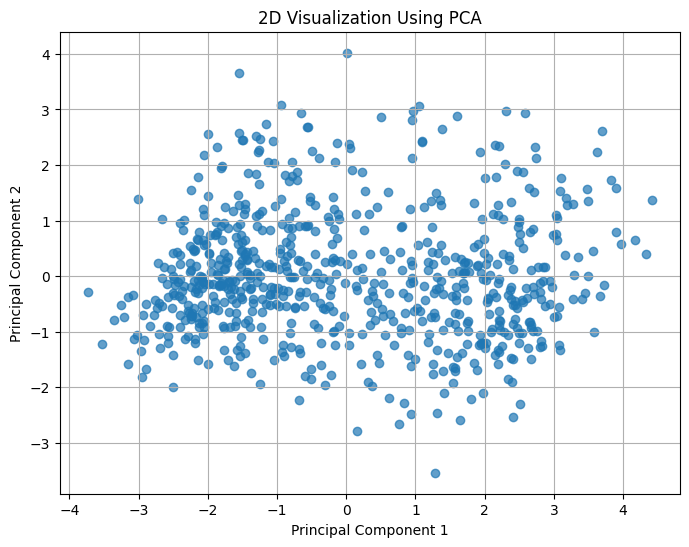

In [29]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('2D Visualization Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [30]:
pca_df

PC1       PC2
0   -2.069748 -0.100430
1   -0.268647  1.070978
2   -1.211779 -0.649158
3    1.746152 -0.847887
4   -1.261589  1.112300
..        ...       ...
697 -0.252077 -0.541620
698  2.642690  1.590578
699  2.021982 -1.205075
700 -0.700908  0.283253
701 -2.593746 -0.142097

[702 rows x 2 columns]

Now back to our initial data frame

In [31]:
df_cleaned

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
697   45    1              3        110          264          0           1   
698   68    1              0        144          193          1           1   
699   57    1              0        130          131          0           1   
700   57    0              1        130          236          0           0   
701   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
697    132               0      1.2         1             1  
698    141               0      3.4         1             1  
699    115               1      1.2         1             1  
700    174               0      0.0         1             1  
701    173               0      0.0         2             0  

[702 rows x 12 columns]

As we can see, we have sex with values 0 and 1, resting bp ranging from 130 --> 150 or smth, we will have to normalize our data

So, continuos features like 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'; will be normalized

note that old peak isn't gaussian distributed, so it will be normalized instead of standarized

In [32]:
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
discrete_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
normalize_feature = ['Oldpeak']

scaler_continuous = StandardScaler()
scaler_normalize = MinMaxScaler()

df_continuous = pd.DataFrame(scaler_continuous.fit_transform(df_cleaned[continuous_features]), columns=continuous_features)
df_oldpeak_normalized = pd.DataFrame(scaler_normalize.fit_transform(df_cleaned[normalize_feature]), columns=normalize_feature)
df_discrete = df_cleaned[discrete_features]

df_stand = pd.concat([df_continuous, df_oldpeak_normalized, df_discrete], axis=1)
df_stand

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex  ChestPainType  \
0   -1.335169   0.547914     0.973199  1.291925  0.027027    1              1   
1   -0.390639   1.845825    -1.178909  0.634669  0.297297    0              2   
2   -1.650013  -0.101041     0.854735 -1.747885  0.027027    1              1   
3   -0.495587   0.418123    -0.507609 -1.337100  0.432432    0              0   
4    0.134100   1.196870    -0.882748 -0.762001  0.027027    1              2   
..        ...        ...          ...       ...       ...  ...            ...   
697 -0.810430  -1.398952     0.479596 -0.351215  0.351351    1              3   
698  1.603369   0.807496    -0.922236  0.018491  0.945946    1              0   
699  0.448943  -0.101041    -2.146371 -1.049550  0.351351    1              0   
700  0.448943  -0.101041    -0.073239  1.374082  0.027027    0              1   
701 -1.545065   0.418123    -1.277630  1.333004  0.027027    1              2   

     FastingBS  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0            0           1               0         2             0  
1            0           1               0         1             1  
2            0           2               0         2             0  
3            0           1               1         1             1  
4            0           1               0         2             0  
..         ...         ...             ...       ...           ...  
697          0           1               0         1             1  
698          1           1               0         1             1  
699          0           1               1         1             1  
700          0           0               0         1             1  
701          0           1               0         2             0  

[702 rows x 12 columns]

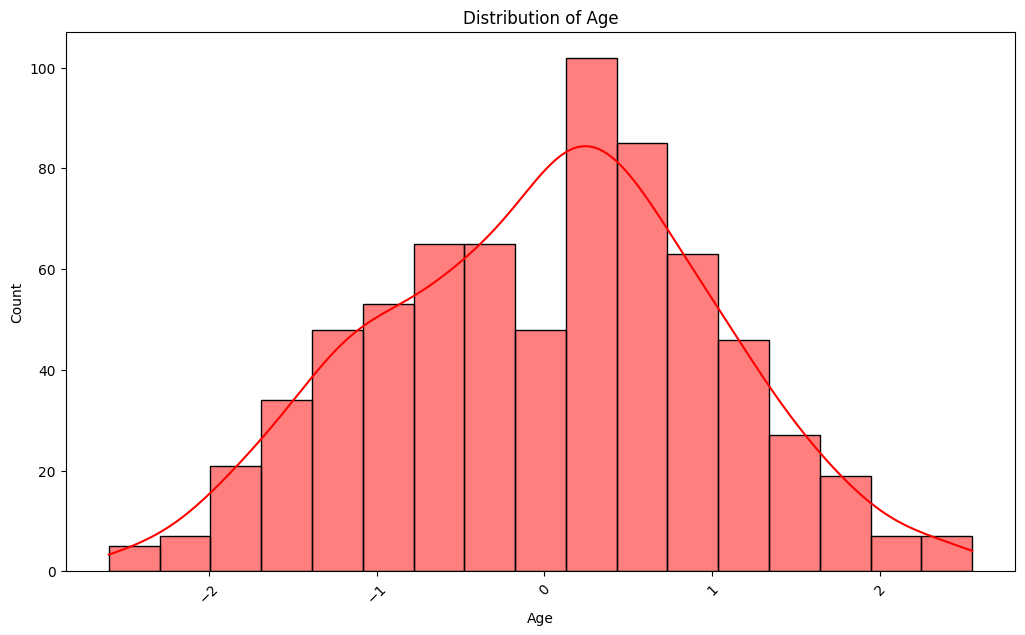

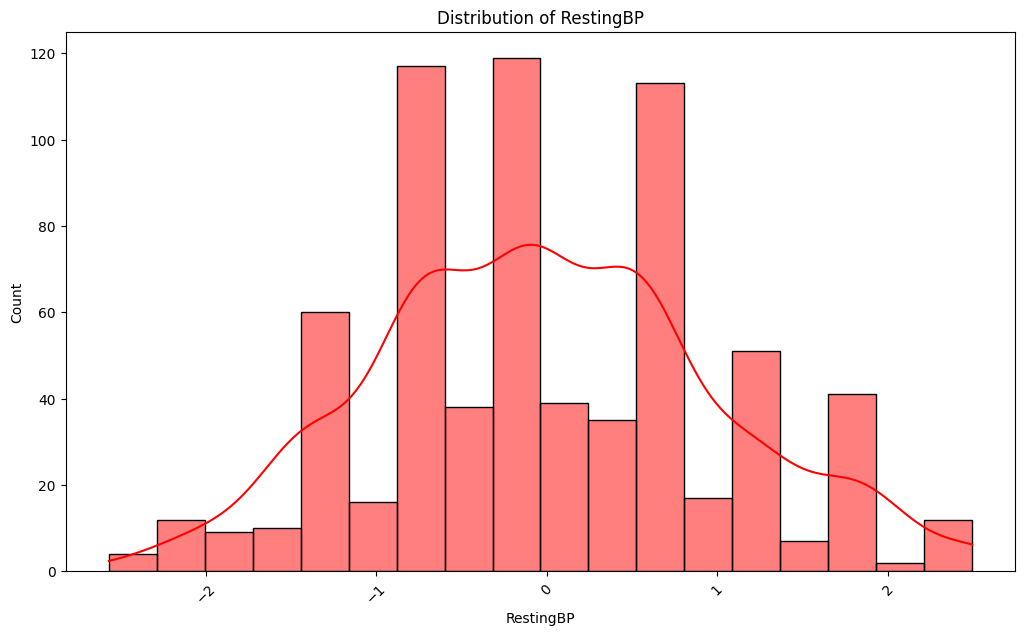

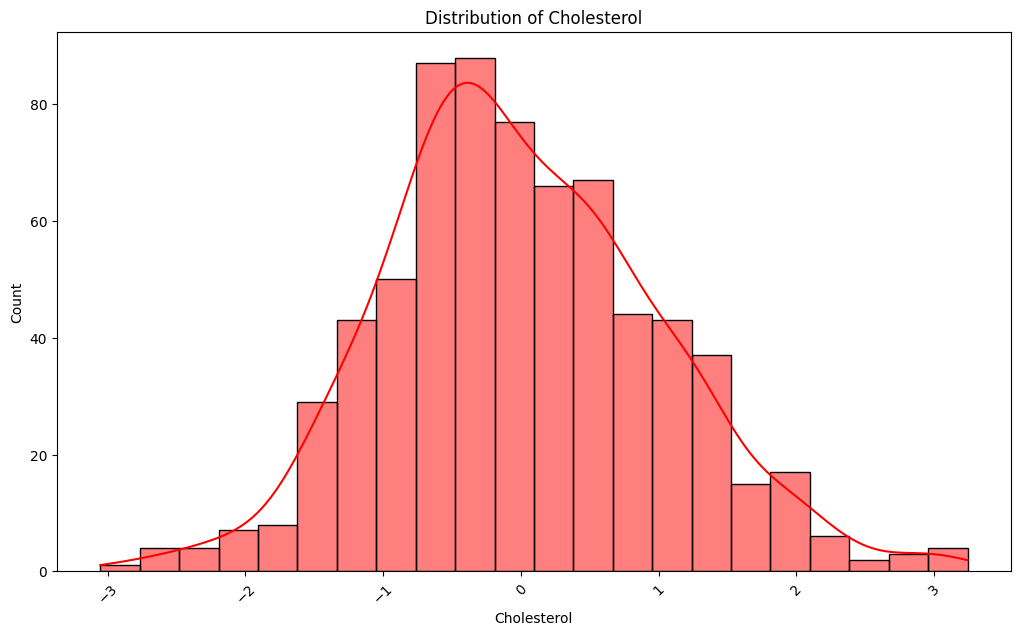

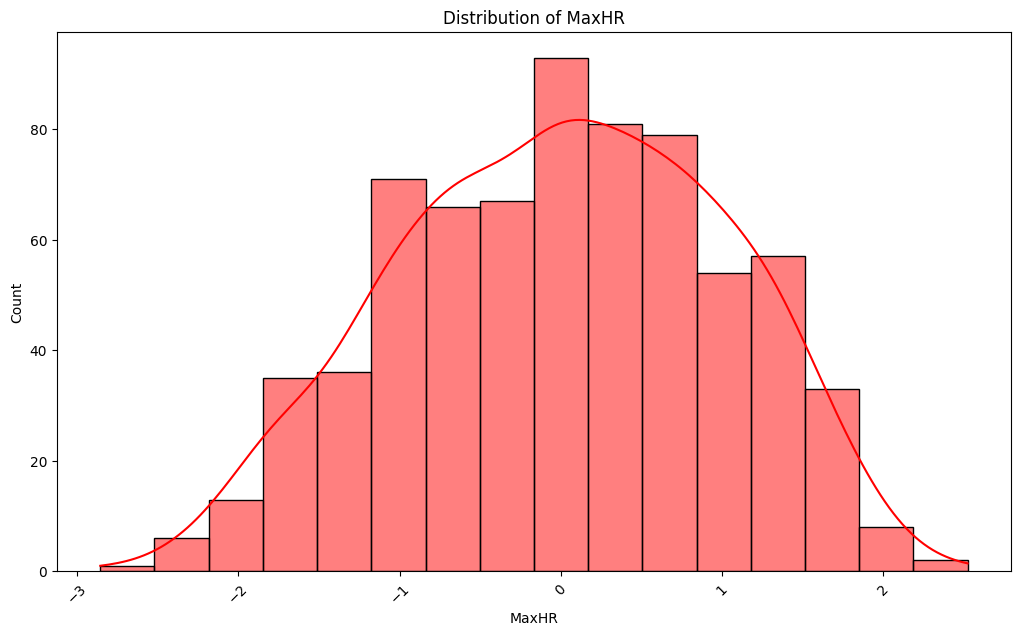

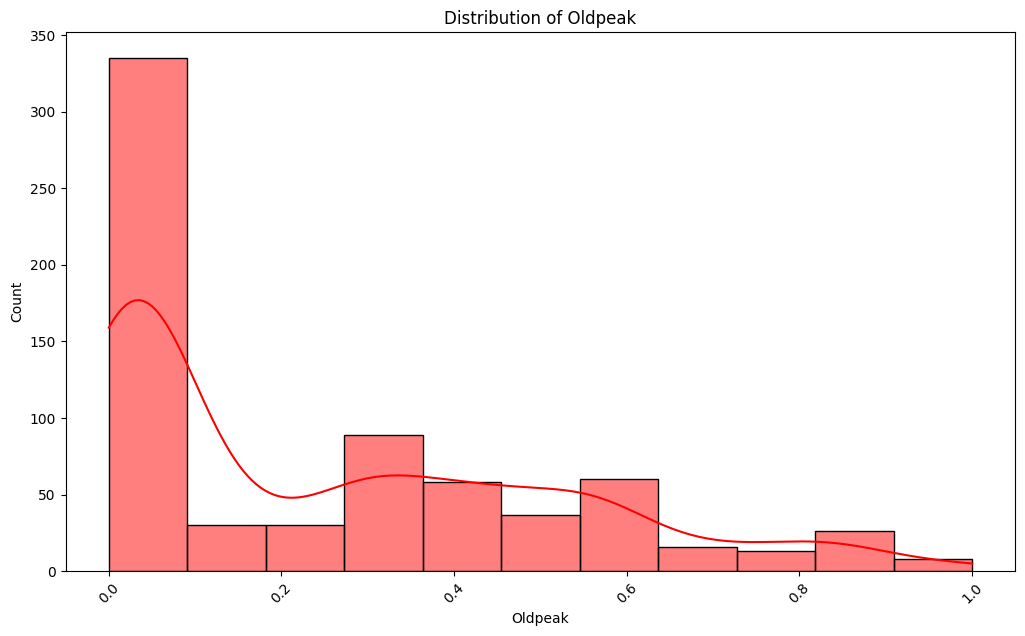

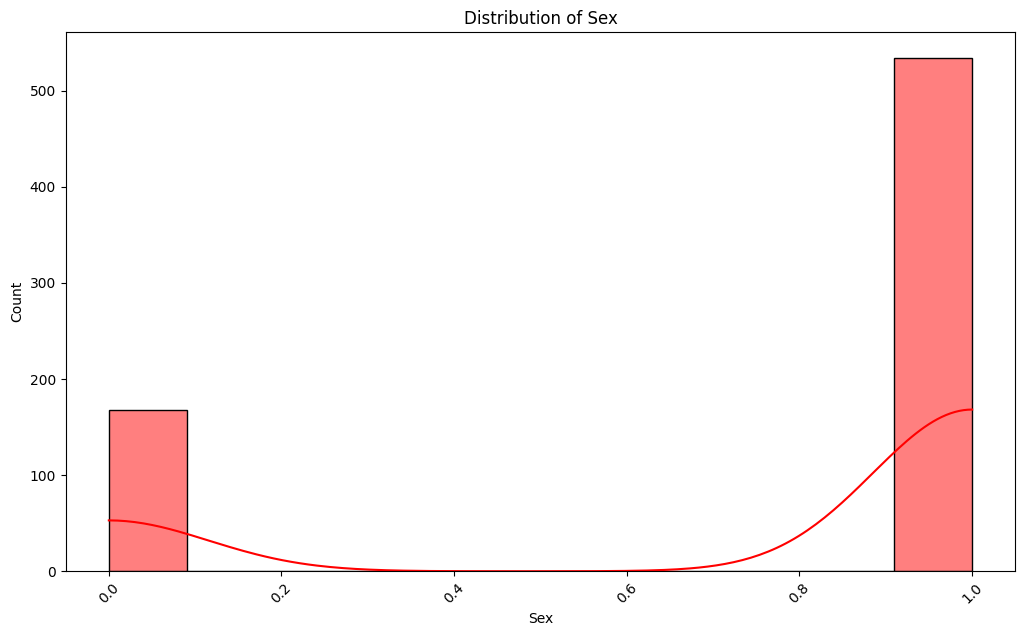

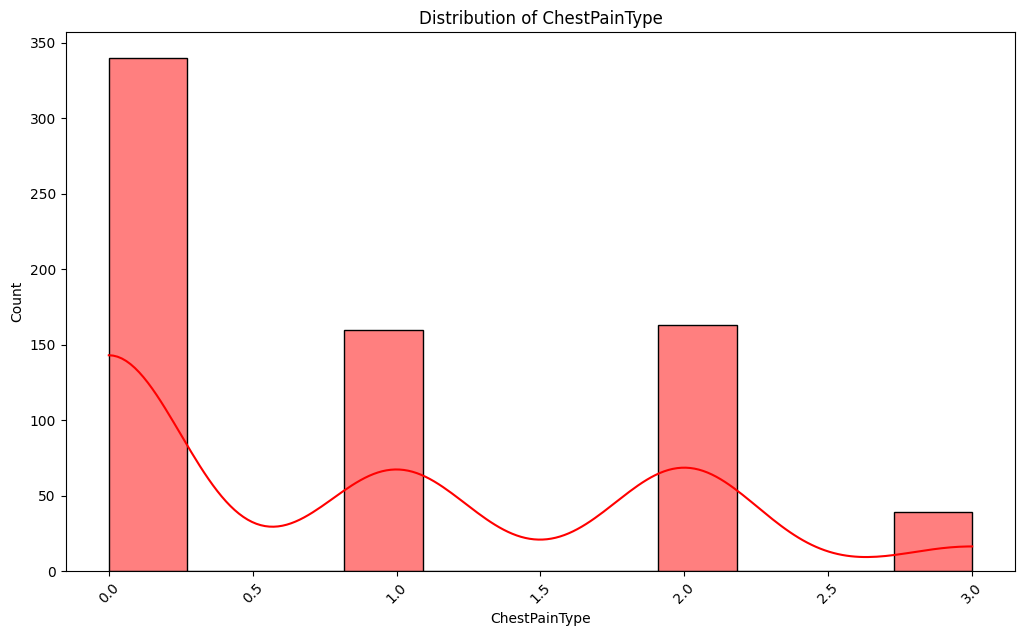

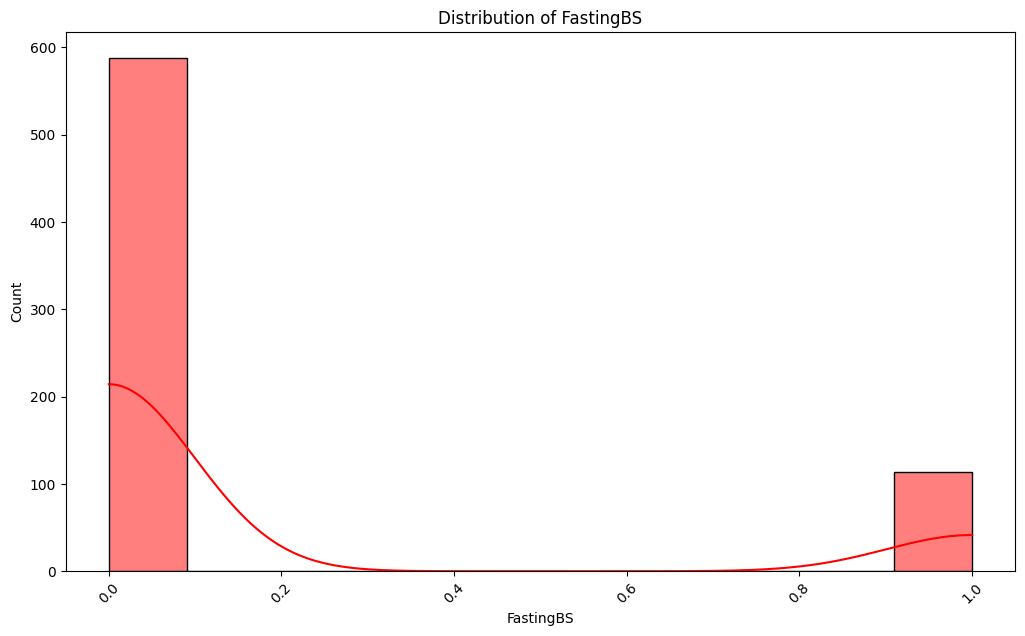

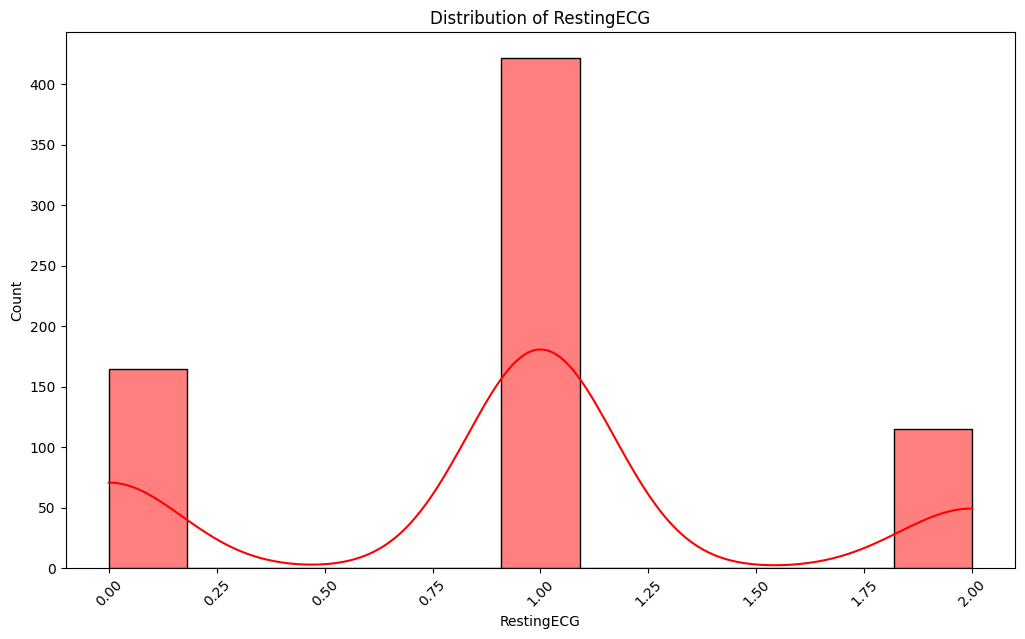

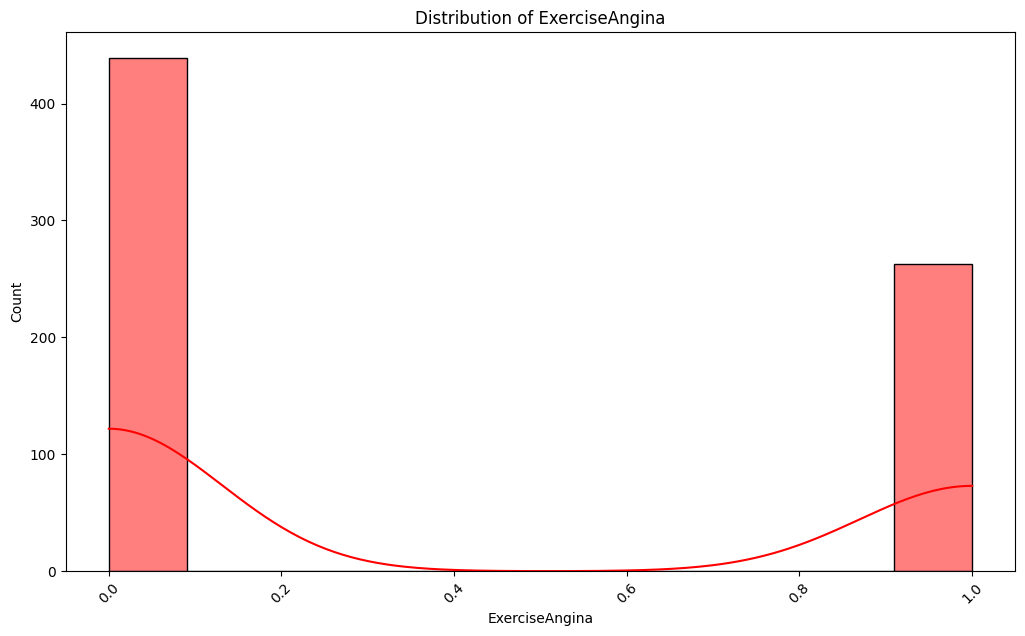

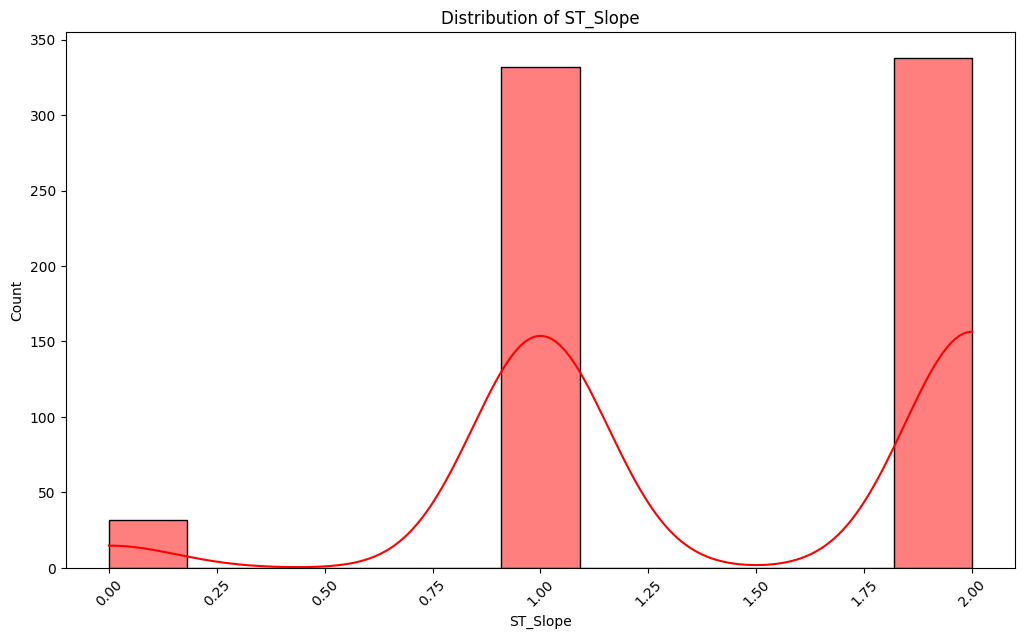

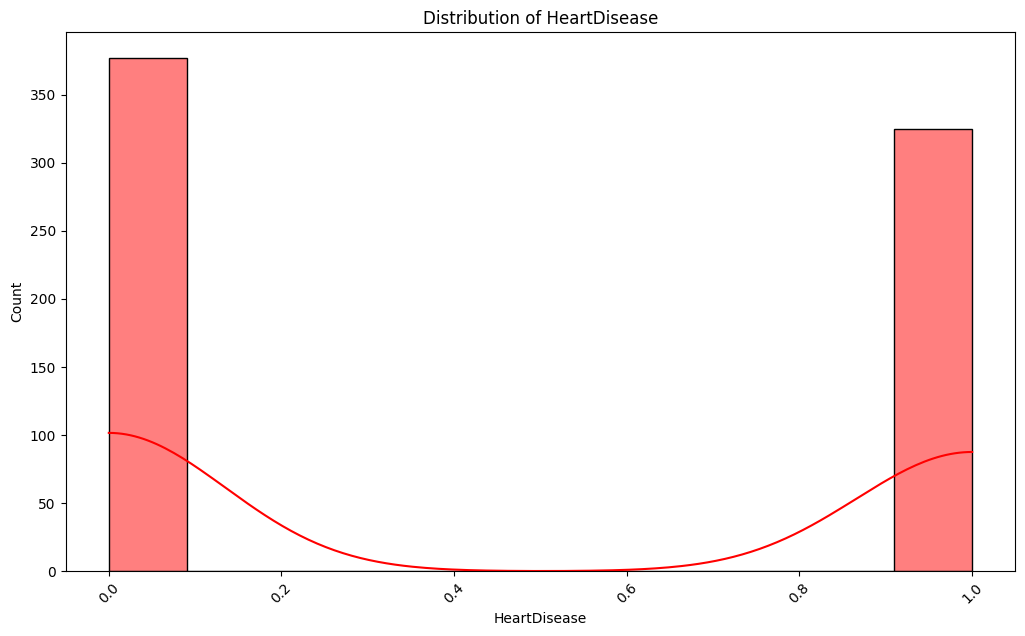

In [33]:
for column in df_stand.columns:
    plt.figure(figsize=(20, 12))
    
    plt.subplot(2, 2, 2)
    sns.histplot(df_stand[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

Now we will scale all the data to range from -1 to 1

In [34]:
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
discrete_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

scaler_minmax = MinMaxScaler(feature_range=(-1, 1))

df_continuous_scaled = scaler_minmax.fit_transform(df_stand[continuous_features])
df_continuous_scaled = pd.DataFrame(df_continuous_scaled, columns=continuous_features)

df_discrete_scaled = scaler_minmax.fit_transform(df_stand[discrete_features])
df_discrete_scaled = pd.DataFrame(df_discrete_scaled, columns=discrete_features)

df_stand2 = pd.concat([df_continuous_scaled, df_discrete_scaled], axis=1)

# Check the result
print(df_stand2.head())

        Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex  ChestPainType  \
0 -0.510204   0.230769     0.278997  0.541985 -0.945946  1.0      -0.333333   
1 -0.142857   0.743590    -0.404389  0.297710 -0.405405 -1.0       0.333333   
2 -0.632653  -0.025641     0.241379 -0.587786 -0.945946  1.0      -0.333333   
3 -0.183673   0.179487    -0.191223 -0.435115 -0.135135 -1.0      -1.000000   
4  0.061224   0.487179    -0.310345 -0.221374 -0.945946  1.0       0.333333   

   FastingBS  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0       -1.0         0.0            -1.0       1.0          -1.0  
1       -1.0         0.0            -1.0       0.0           1.0  
2       -1.0         1.0            -1.0       1.0          -1.0  
3       -1.0         0.0             1.0       0.0           1.0  
4       -1.0         0.0            -1.0       1.0          -1.0  


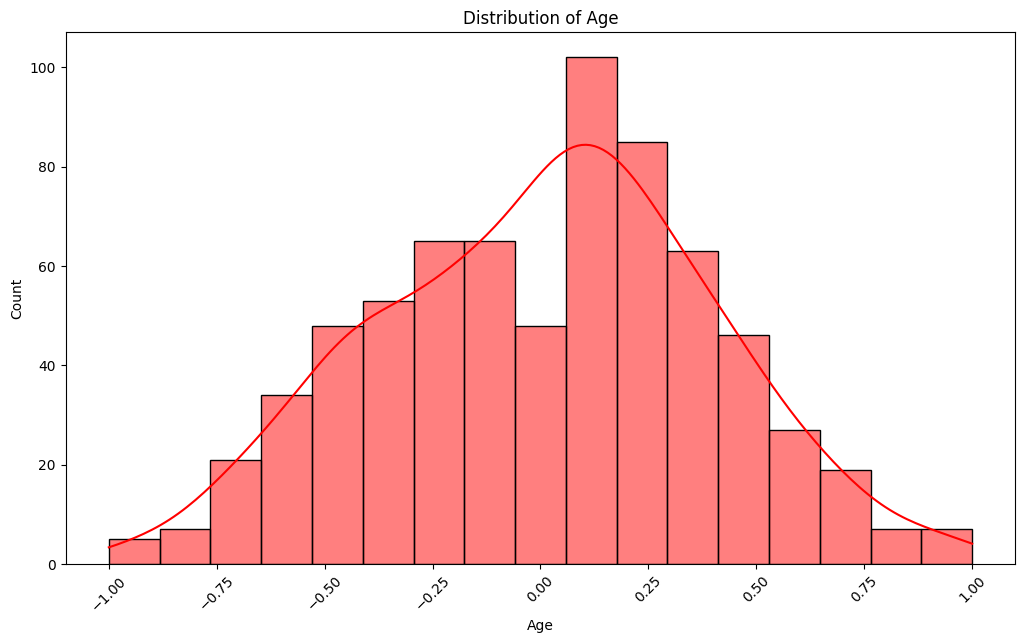

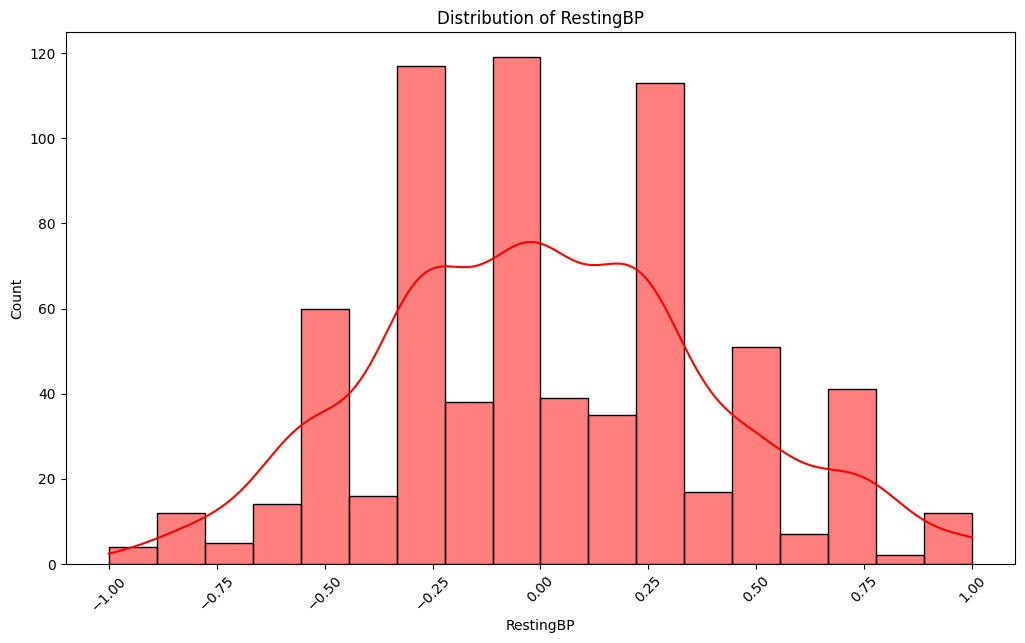

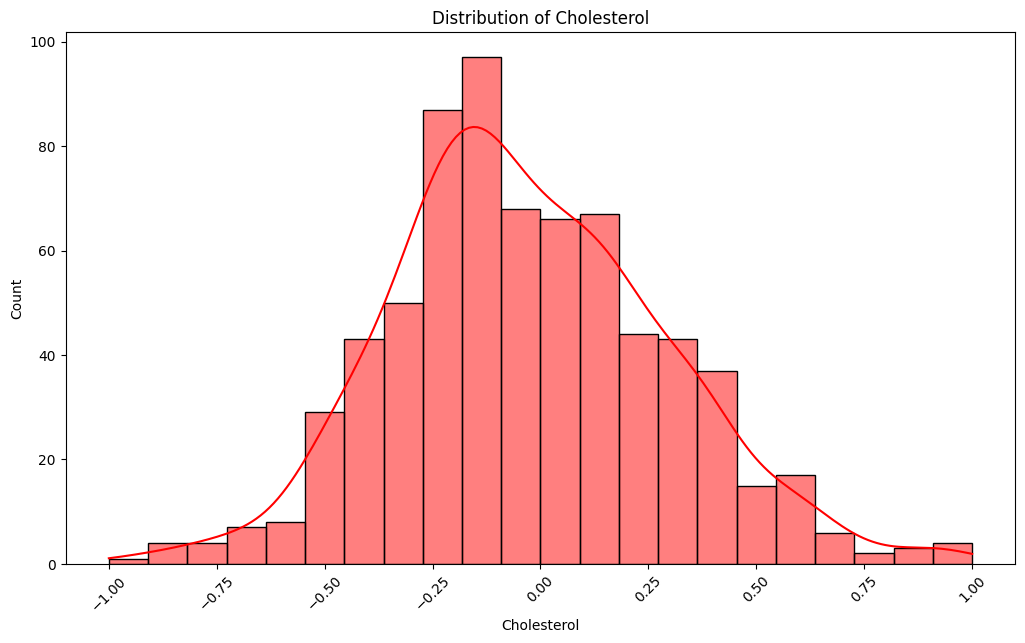

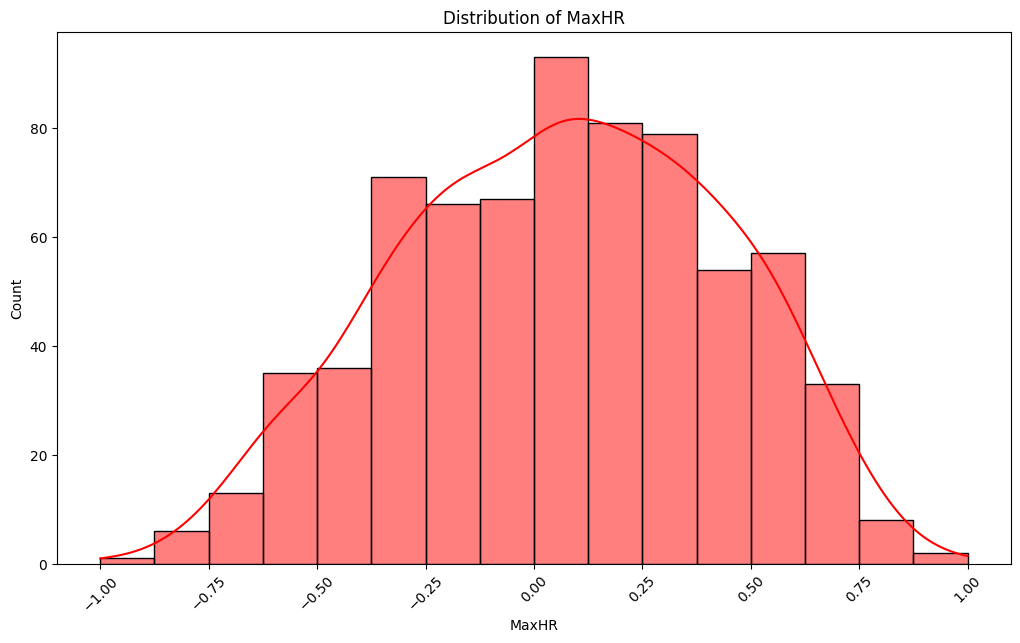

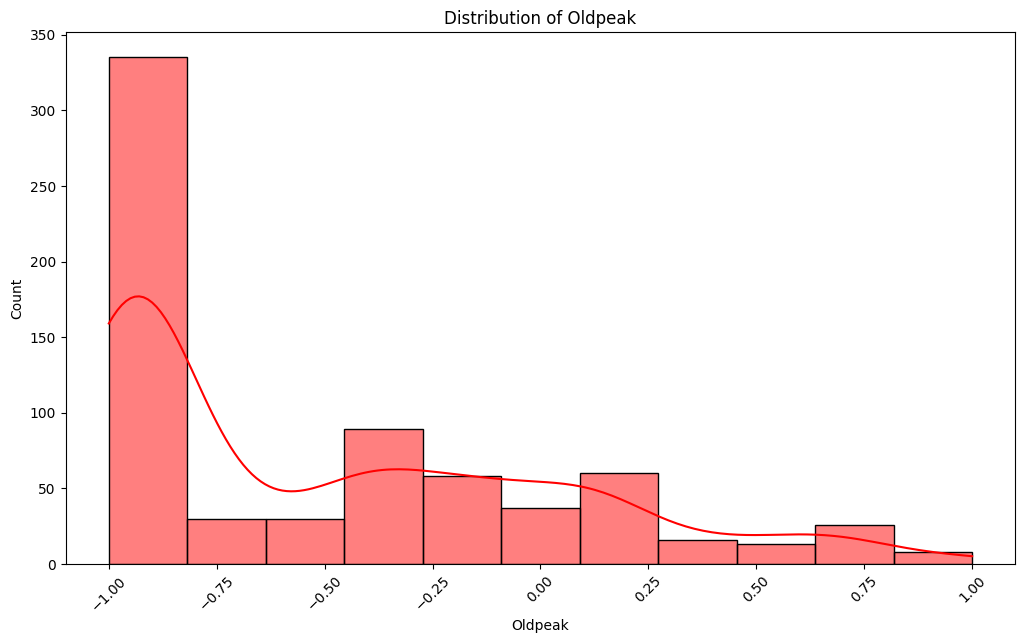

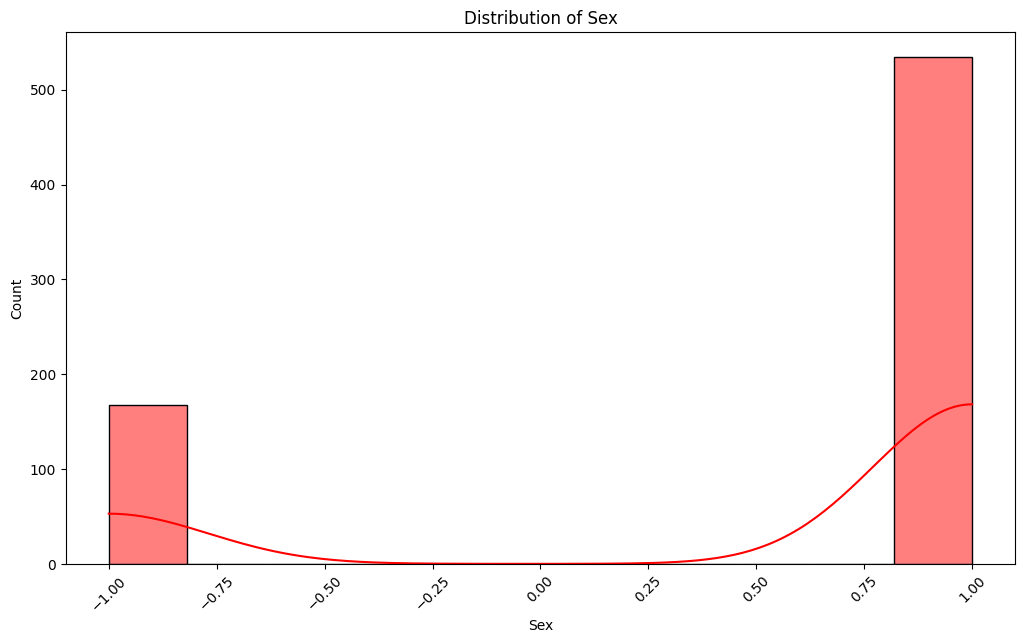

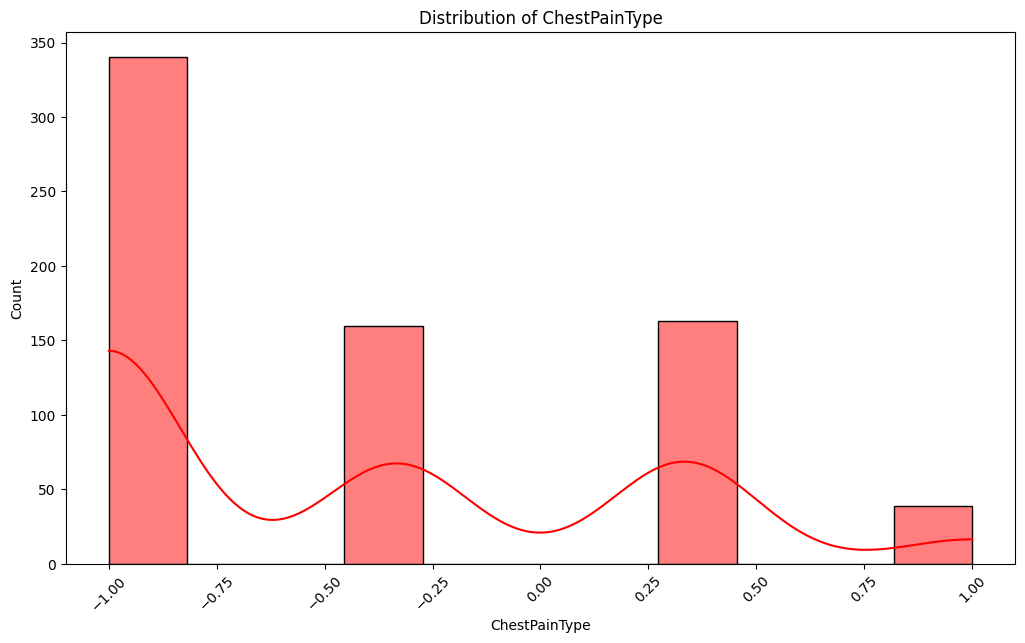

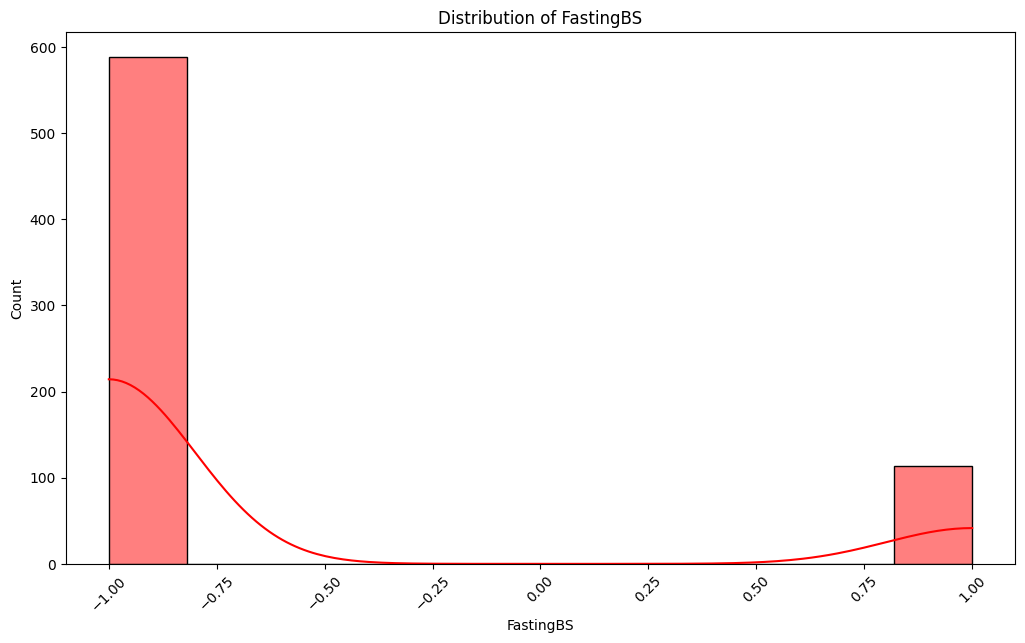

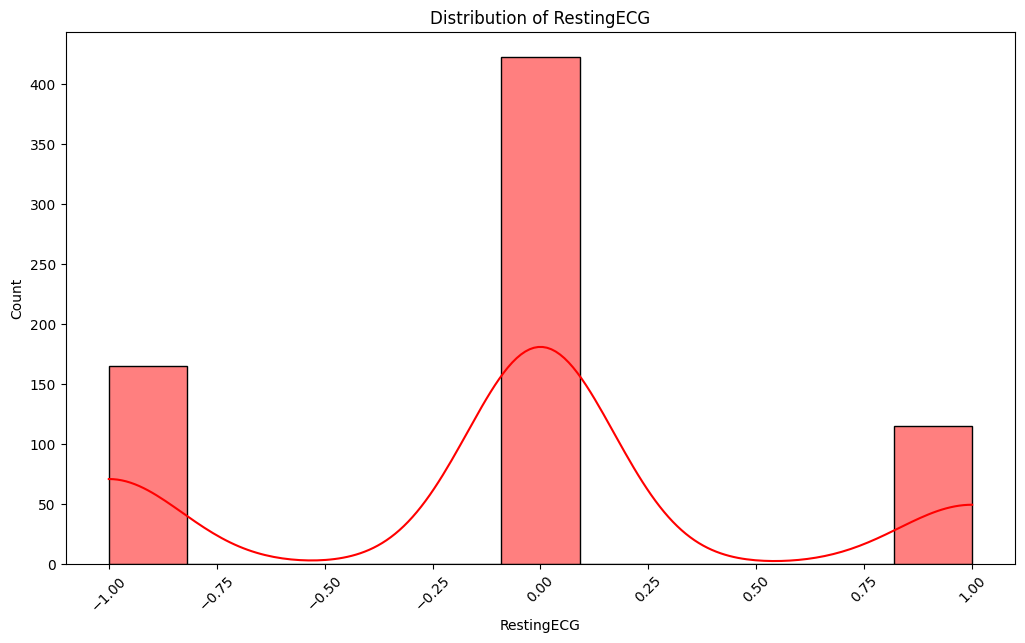

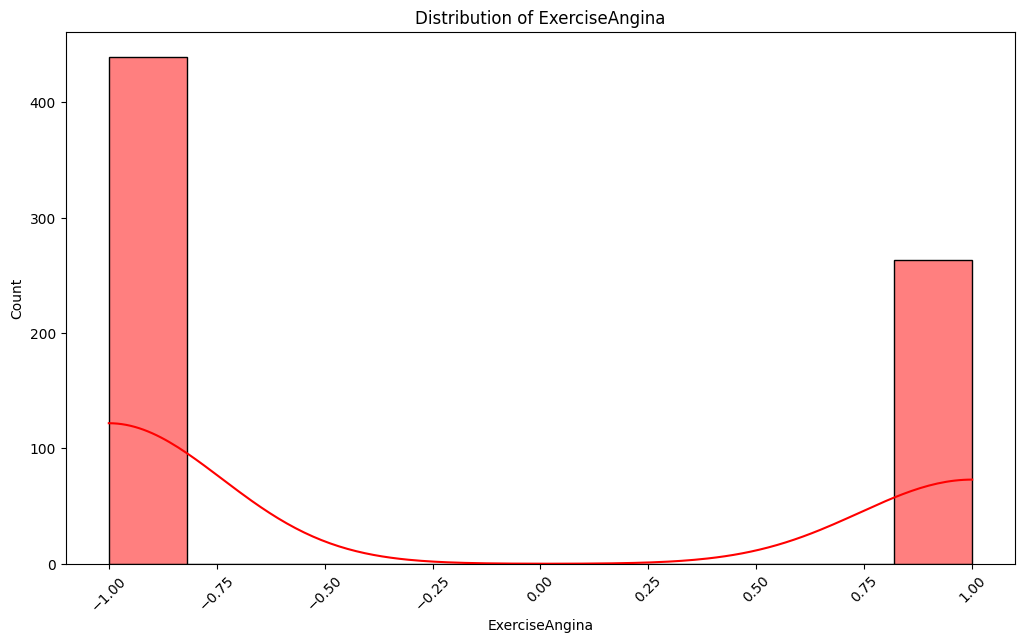

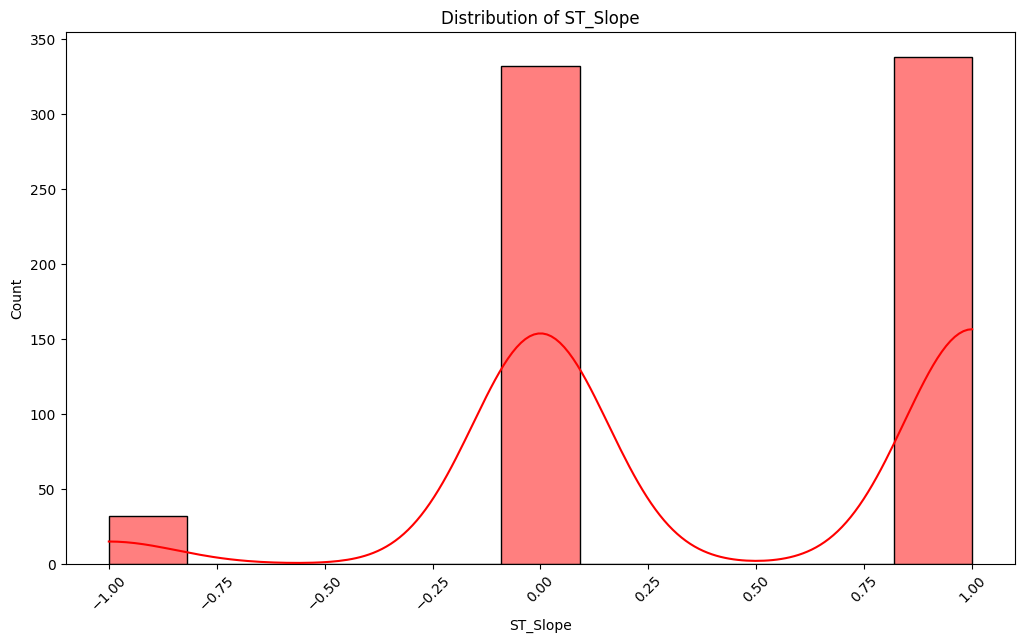

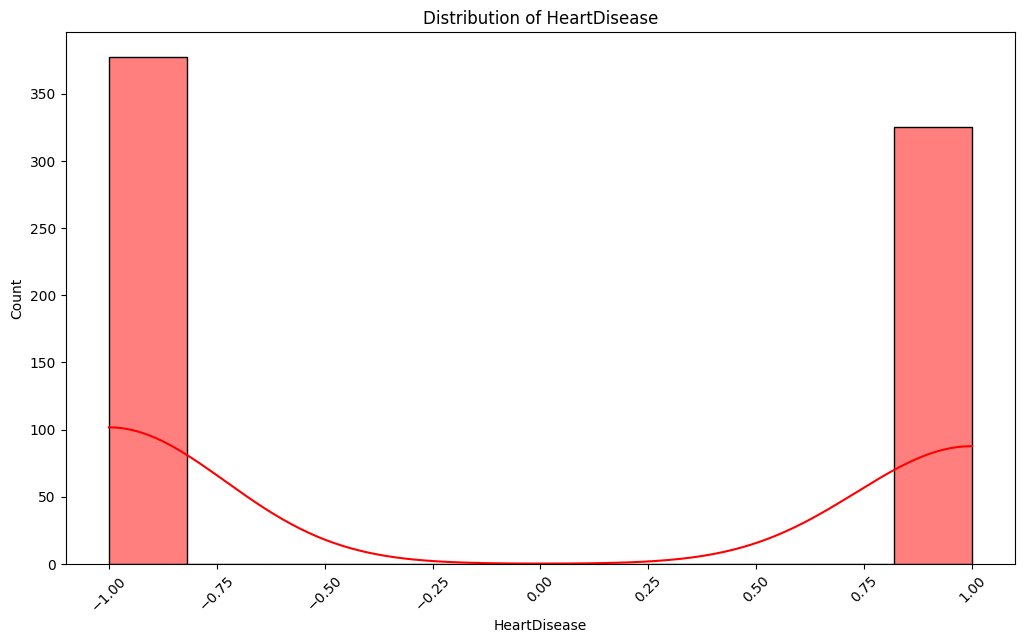

In [35]:
for column in df_stand2.columns:
    plt.figure(figsize=(20, 12))
    
    plt.subplot(2, 2, 2)
    sns.histplot(df_stand2[column], color='red', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

Now all of our discrete values are as they were, and the continuos are shifted and scaled to be ranged from -1 to 1

PCA once again after standarizing

In [36]:
corr1 = df_stand2.corr()

In [37]:
mask1 = (abs(corr1) > 0.5) & (abs(corr1) != 1)
corr1.where(mask1).stack().sort_values()

ST_Slope        HeartDisease     -0.598696
HeartDisease    ST_Slope         -0.598696
Oldpeak         ST_Slope         -0.598051
ST_Slope        Oldpeak          -0.598051
Oldpeak         HeartDisease      0.502095
HeartDisease    Oldpeak           0.502095
ExerciseAngina  HeartDisease      0.550326
HeartDisease    ExerciseAngina    0.550326
dtype: float64

In [38]:
df_pca2 = df_stand2.copy()
df_pca2

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex  ChestPainType  \
0   -0.510204   0.230769     0.278997  0.541985 -0.945946  1.0      -0.333333   
1   -0.142857   0.743590    -0.404389  0.297710 -0.405405 -1.0       0.333333   
2   -0.632653  -0.025641     0.241379 -0.587786 -0.945946  1.0      -0.333333   
3   -0.183673   0.179487    -0.191223 -0.435115 -0.135135 -1.0      -1.000000   
4    0.061224   0.487179    -0.310345 -0.221374 -0.945946  1.0       0.333333   
..        ...        ...          ...       ...       ...  ...            ...   
697 -0.306122  -0.538462     0.122257 -0.068702 -0.297297  1.0       1.000000   
698  0.632653   0.333333    -0.322884  0.068702  0.891892  1.0      -1.000000   
699  0.183673  -0.025641    -0.711599 -0.328244 -0.297297  1.0      -1.000000   
700  0.183673  -0.025641    -0.053292  0.572519 -0.945946 -1.0      -0.333333   
701 -0.591837   0.179487    -0.435737  0.557252 -0.945946  1.0       0.333333   

     FastingBS  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0         -1.0         0.0            -1.0       1.0          -1.0  
1         -1.0         0.0            -1.0       0.0           1.0  
2         -1.0         1.0            -1.0       1.0          -1.0  
3         -1.0         0.0             1.0       0.0           1.0  
4         -1.0         0.0            -1.0       1.0          -1.0  
..         ...         ...             ...       ...           ...  
697       -1.0         0.0            -1.0       0.0           1.0  
698        1.0         0.0            -1.0       0.0           1.0  
699       -1.0         0.0             1.0       0.0           1.0  
700       -1.0        -1.0            -1.0       0.0           1.0  
701       -1.0         0.0            -1.0       1.0          -1.0  

[702 rows x 12 columns]

I know that the variables below are the same above, we will just do new variable to keep it clean

In [39]:
scaler1 = StandardScaler()
data_scaled2 = scaler1.fit_transform(df_pca2)

In [40]:
pca2 = PCA(n_components=2)
principal_components1 = pca2.fit_transform(data_scaled2)

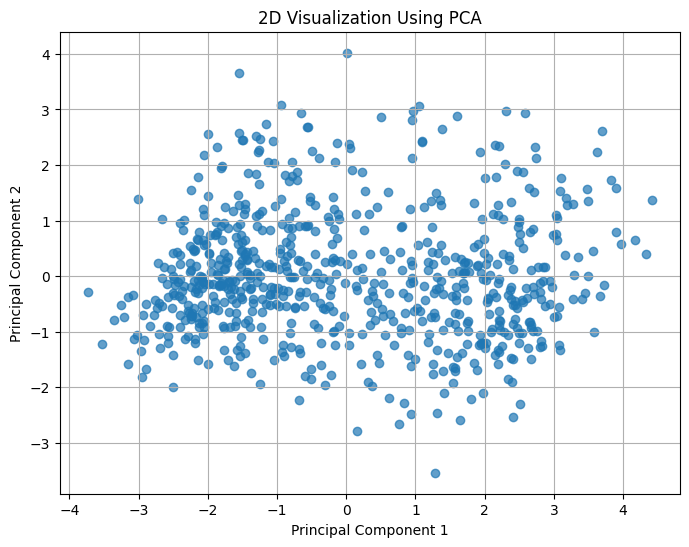

In [41]:
pca_df1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(pca_df1['PC1'], pca_df1['PC2'], alpha=0.7)
plt.title('2D Visualization Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [42]:
pca_df1

PC1       PC2
0   -2.069748 -0.100430
1   -0.268647  1.070978
2   -1.211779 -0.649158
3    1.746152 -0.847887
4   -1.261589  1.112300
..        ...       ...
697 -0.252077 -0.541620
698  2.642690  1.590578
699  2.021982 -1.205075
700 -0.700908  0.283253
701 -2.593746 -0.142097

[702 rows x 2 columns]

DATA SPLITING

BEFORE standardization

Splitting our data frame into x and y where x is all the features and y is the target; aka patient has heart disease or not

In [43]:
x = df_cleaned.drop('HeartDisease', axis='columns')
x

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
697   45    1              3        110          264          0           1   
698   68    1              0        144          193          1           1   
699   57    1              0        130          131          0           1   
700   57    0              1        130          236          0           0   
701   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0      172               0      0.0         2  
1      156               0      1.0         1  
2       98               0      0.0         2  
3      108               1      1.5         1  
4      122               0      0.0         2  
..     ...             ...      ...       ...  
697    132               0      1.2         1  
698    141               0      3.4         1  
699    115               1      1.2         1  
700    174               0      0.0         1  
701    173               0      0.0         2  

[702 rows x 11 columns]

In [44]:
y = df_cleaned['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
697    1
698    1
699    1
700    1
701    0
Name: HeartDisease, Length: 702, dtype: int64

Now splitting the data into training, testing and validation set

Training set will be 60% of the whole data

The rest will be split 50% for validating and 50% for testing

In [45]:
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.4,random_state=40)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.7,random_state=40)

print("Size of training set:", X_train.shape[0])
print("Size of test set:", X_test.shape[0])
print("Size of validation set:", X_val.shape[0])

Size of training set: 421
Size of test set: 197
Size of validation set: 84


Naive Bayes algorithm

In [46]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB(var_smoothing=1e-7)

training the data

In [47]:
model.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-07)

training set accuracy

In [48]:
accuracy_train = model.score(X_train,y_train)
accuracy_train

0.8551068883610451

testing set accuracy

In [49]:
accuracy_test = model.score(X_test,y_test)
accuracy_test

0.8274111675126904

accuracy set accuracy

In [50]:
accuracy_valdiation = model.score(X_val,y_val)
accuracy_valdiation

0.8333333333333334

Plot training accuracy and validation accuracy  for Naive Bayes


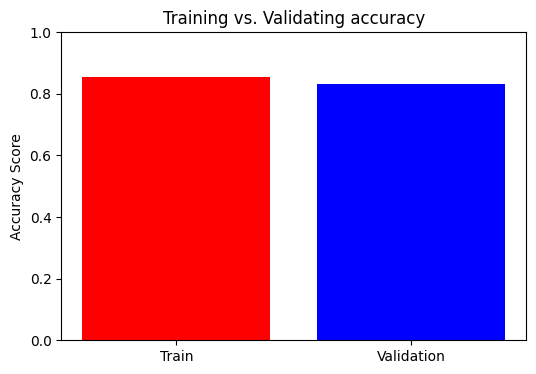

In [51]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [accuracy_train,accuracy_valdiation], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

After standarization

DATA SPLITING

In [52]:
x1 = df_stand2.drop('HeartDisease', axis='columns')
x1

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex  ChestPainType  \
0   -0.510204   0.230769     0.278997  0.541985 -0.945946  1.0      -0.333333   
1   -0.142857   0.743590    -0.404389  0.297710 -0.405405 -1.0       0.333333   
2   -0.632653  -0.025641     0.241379 -0.587786 -0.945946  1.0      -0.333333   
3   -0.183673   0.179487    -0.191223 -0.435115 -0.135135 -1.0      -1.000000   
4    0.061224   0.487179    -0.310345 -0.221374 -0.945946  1.0       0.333333   
..        ...        ...          ...       ...       ...  ...            ...   
697 -0.306122  -0.538462     0.122257 -0.068702 -0.297297  1.0       1.000000   
698  0.632653   0.333333    -0.322884  0.068702  0.891892  1.0      -1.000000   
699  0.183673  -0.025641    -0.711599 -0.328244 -0.297297  1.0      -1.000000   
700  0.183673  -0.025641    -0.053292  0.572519 -0.945946 -1.0      -0.333333   
701 -0.591837   0.179487    -0.435737  0.557252 -0.945946  1.0       0.333333   

     FastingBS  RestingECG  ExerciseAngina  ST_Slope  
0         -1.0         0.0            -1.0       1.0  
1         -1.0         0.0            -1.0       0.0  
2         -1.0         1.0            -1.0       1.0  
3         -1.0         0.0             1.0       0.0  
4         -1.0         0.0            -1.0       1.0  
..         ...         ...             ...       ...  
697       -1.0         0.0            -1.0       0.0  
698        1.0         0.0            -1.0       0.0  
699       -1.0         0.0             1.0       0.0  
700       -1.0        -1.0            -1.0       0.0  
701       -1.0         0.0            -1.0       1.0  

[702 rows x 11 columns]

In [53]:
y1 = df_stand2['HeartDisease']
y1

0     -1.0
1      1.0
2     -1.0
3      1.0
4     -1.0
      ... 
697    1.0
698    1.0
699    1.0
700    1.0
701   -1.0
Name: HeartDisease, Length: 702, dtype: float64

Now splitting the data into training, testing and validation set

In [54]:
X_train1, X_remaining1, y_train1, y_remaining1 = train_test_split(x1, y1, test_size=0.4,random_state=40)

X_val1, X_test1, y_val1, y_test1 = train_test_split(X_remaining1, y_remaining1, test_size=0.7,random_state=40)

print("Size of training set:", X_train1.shape[0])
print("Size of test set:", X_test1.shape[0])
print("Size of validation set:", X_val1.shape[0])

Size of training set: 421
Size of test set: 197
Size of validation set: 84


Naive Bayes algorithm

In [55]:
model1 = GaussianNB(var_smoothing=1e-7)

training the data

In [56]:
model1.fit(X_train1,y_train1)

GaussianNB(var_smoothing=1e-07)

training set accuracy

In [57]:
accuracy_train1 = model1.score(X_train1,y_train1)
accuracy_train1

0.8551068883610451

testing set accuracy

In [58]:
accuracy_test1 = model1.score(X_test1,y_test1)
accuracy_test1

0.8274111675126904

accuracy set accuracy

In [59]:
accuracy_valdiation1 = model1.score(X_val1,y_val1)
accuracy_valdiation1

0.8333333333333334

Plot training accuracy and validation accuracy  for Naive Bayes


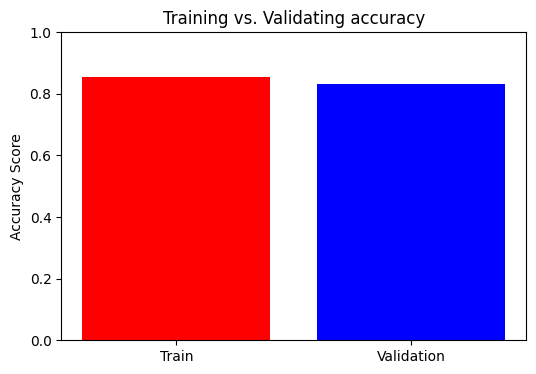

In [60]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [accuracy_train,accuracy_valdiation], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

Here, the standarization didn't affect the result, but it's a good step that we might need later on

GRID SEARCH


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

clf_gnb = GridSearchCV(
    GaussianNB(),
    {
        'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-4]
    },
    cv=5,
    return_train_score=False
)

In [62]:
clf_gnb.fit(X_train, y_train)
print("\nBest Parameters for GaussianNB:", clf_gnb.best_params_)


Best Parameters for GaussianNB: {'var_smoothing': 1e-05}


As we can see, the var smoothing with value 1e-05 is the best value, lets try to run with it

In [63]:
from sklearn.naive_bayes import GaussianNB 
modelGrid = GaussianNB(var_smoothing=1e-5)

training the data

In [64]:
modelGrid.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-05)

training set accuracy

In [65]:
accuracy_trainGrid = modelGrid.score(X_train,y_train)
accuracy_trainGrid

0.8598574821852731

testing set accuracy

In [66]:
accuracy_testGrid = modelGrid.score(X_test,y_test)
accuracy_testGrid

0.8274111675126904

accuracy set accuracy

In [67]:
accuracy_valdiationGrid = modelGrid.score(X_val,y_val)
accuracy_valdiationGrid

0.8333333333333334

Plot training accuracy and validation accuracy  for Naive Bayes


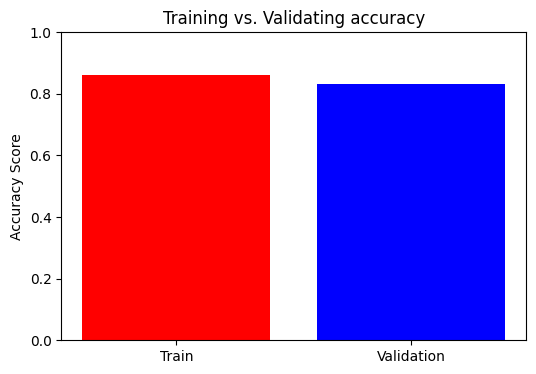

In [68]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [accuracy_trainGrid,accuracy_valdiationGrid], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

Testing Bayes

In [69]:
y_pred = modelGrid.predict(X_test)

In [70]:
bayes_acc = accuracy_score(y_test, y_pred)
bayes_per = precision_score(y_test, y_pred)
bayes_rec = recall_score(y_test, y_pred)
bayes_f1 = f1_score(y_test, y_pred)

print("Accuracy:", bayes_acc)
print("Precision:", bayes_per)
print("Recall:", bayes_rec)
print("F1 Score:", bayes_f1)

Accuracy: 0.8274111675126904
Precision: 0.8452380952380952
Recall: 0.7717391304347826
F1 Score: 0.8068181818181818


Confusion Matrix

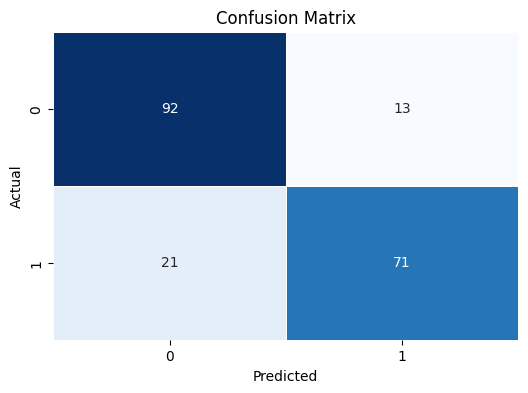

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

false negative 

In [72]:
y_proba = model.predict_proba(X_test)[:, 1]
y_true = y_test


model_bayes

In [73]:
thresholds = np.arange(0.1, 1.0, 0.01)  
best_threshold = 0.5
min_false_negatives = float('inf')

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int) 
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))  
    false_neg_rate = false_negatives / np.sum(y_true == 1)  
    
    if false_neg_rate < min_false_negatives:
        min_false_negatives = false_neg_rate
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Minimum False Negative Rate: {min_false_negatives:.4f}")


Best Threshold: 0.1, Minimum False Negative Rate: 0.1739


testing after we try to change the threshold to reduce number of false neagtive 

In [74]:
threshold = 0.1  
y_pred = (y_proba >= threshold).astype(int) 


In [75]:
# Detailed Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       105
           1       0.77      0.83      0.80        92

    accuracy                           0.80       197
   macro avg       0.80      0.80      0.80       197
weighted avg       0.80      0.80      0.80       197



as we can see that the number of false negatives have reduced, so we reduce the risk 

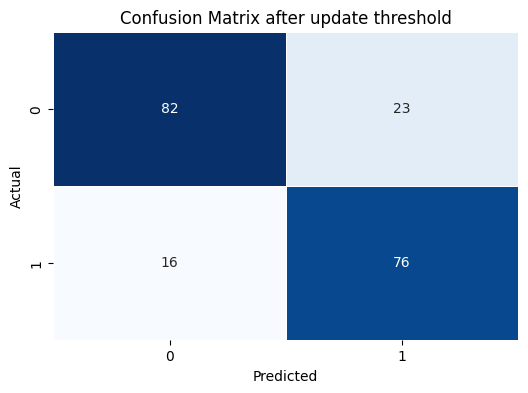

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix after update threshold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
bayes_acc = accuracy_score(y_test, y_pred)
bayes_per = precision_score(y_test, y_pred)
bayes_rec = recall_score(y_test, y_pred)
bayes_f1 = f1_score(y_test, y_pred)

print("Accuracy:", bayes_acc)
print("Precision:", bayes_per)
print("Recall:", bayes_rec)
print("F1 Score:", bayes_f1)

Accuracy: 0.8020304568527918
Precision: 0.7676767676767676
Recall: 0.8260869565217391
F1 Score: 0.7958115183246073


SVM

apply svm on data before standrization 


In [78]:
from sklearn.svm import SVC 
model_svm = SVC()

In [79]:
model_svm.fit(X_train,y_train)

SVC()

In [80]:
train_accuracy_svm = model_svm.score(X_train,y_train)
train_accuracy_svm

0.7078384798099763

In [81]:
test_accuracy_svm = model_svm.score(X_test,y_test)
test_accuracy_svm

0.649746192893401

In [82]:
validation_accuracy_svm = model_svm.score(X_val,y_val)
validation_accuracy_svm

0.6666666666666666

Plot training accuracy and validation accuracy  for SVM


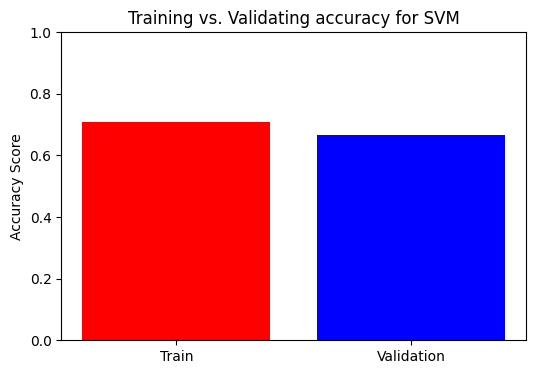

In [83]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_svm,validation_accuracy_svm], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy for SVM')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

Apply SVM After standarization

In [84]:
model_svm.fit(X_train1,y_train1)

SVC()

In [85]:
train_accuracy_svm_1 = model_svm.score(X_train1,y_train1)
train_accuracy_svm_1

0.8859857482185273

In [86]:
test_accuracy_svm_1 = model_svm.score(X_test1,y_test1)
test_accuracy_svm_1

0.8629441624365483

In [87]:
validation_accuracy_svm_1 = model_svm.score(X_val1,y_val1)
validation_accuracy_svm_1

0.8928571428571429

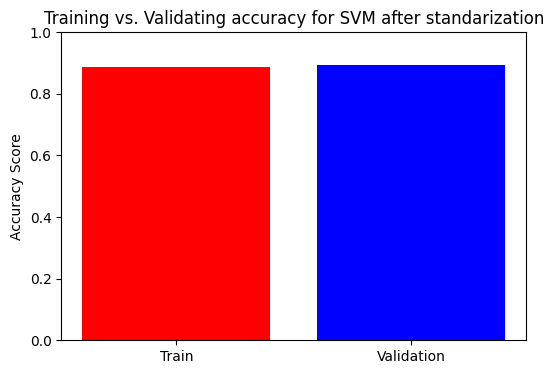

In [88]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_svm_1,validation_accuracy_svm_1], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy for SVM after standarization')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

Grid search for SVM before standraiztion


In [89]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': range(1,101,5),
    'kernel': ['rbf','linear']
},cv=5, return_train_score=False)

In [94]:
clf.fit(X_train, y_train)
print("\nBest Parameters for SVM:", clf.best_params_)

KeyboardInterrupt: 

try the best parameters

In [90]:
model_svm_grid = SVC(C=26,kernel="linear")

In [91]:
model_svm_grid.fit(X_train,y_train)

SVC(C=26, kernel='linear')

In [92]:
train_accuracy_svm_grid = model_svm_grid.score(X_train,y_train)
train_accuracy_svm_grid

0.8622327790973872

In [93]:
test_accuracy_svm_grid = model_svm_grid.score(X_test,y_test)
test_accuracy_svm_grid

0.8274111675126904

In [94]:
validation_accuracy_svm_grid = model_svm_grid.score(X_val,y_val)
validation_accuracy_svm_grid

0.8571428571428571

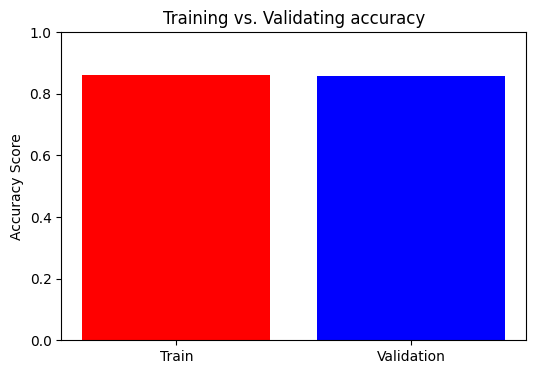

In [95]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_svm_grid,validation_accuracy_svm_grid], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

grid search for data after standarization 

In [96]:
param_grid = {
    'C':range(1,101),
    'gamma': [0.2, 0.01, 0.001],
    'kernel': ['rbf','linear','poly']
}
clf_1 = GridSearchCV(SVC(), param_grid, cv=5)


In [97]:
# Check if any feature values after scaling are too large or small
print(np.max(X_train1))
print(np.min(X_train1))

1.0000000000000002
-1.0


oops looks like we have a value bigger than 1, which isn't a good thing

In [102]:
from decimal import Decimal, ROUND_HALF_UP

def round_decimal(x):
    return Decimal(x).quantize(Decimal('1.0000'), rounding=ROUND_HALF_UP) if np.isfinite(x) else Decimal('0')

X_train1_rounded = X_train1.map(round_decimal)

X_train1_rounded

Age RestingBP Cholesterol    MaxHR  Oldpeak      Sex ChestPainType  \
690   0.5918    0.5385     -0.2038   0.2061  -0.5135   1.0000        0.3333   
582  -0.2653    0.4872     -0.0846   0.1603   1.0000   1.0000        0.3333   
287   0.3061   -0.0256     -0.3668   0.0534  -0.6757   1.0000       -1.0000   
467  -0.0204   -0.0769     -0.2476   0.7252  -0.9459   1.0000       -0.3333   
581   0.3878    0.1795      0.3103  -0.4656   0.0811  -1.0000       -1.0000   
..       ...       ...         ...      ...      ...      ...           ...   
440   0.0612    0.0256      0.2727   0.3435  -0.9459  -1.0000       -0.3333   
165  -0.3878    0.2308      0.2727  -0.0229   0.1351   1.0000       -1.0000   
7     0.0612   -0.5385     -0.2288   0.0840  -0.9459   1.0000       -0.3333   
219  -0.5102   -0.0256      0.2288   0.4656  -0.9459   1.0000        0.3333   
326  -0.7143   -0.2051     -0.5235   0.2519  -1.0000   1.0000        0.3333   

    FastingBS RestingECG ExerciseAngina ST_Slope  
690   -1.0000    -1.0000        -1.0000   0.0000  
582   -1.0000     0.0000        -1.0000   0.0000  
287    1.0000     1.0000         1.0000   0.0000  
467    1.0000     0.0000        -1.0000   1.0000  
581    1.0000     0.0000        -1.0000   0.0000  
..        ...        ...            ...      ...  
440    1.0000    -1.0000         1.0000   1.0000  
165   -1.0000     0.0000         1.0000   0.0000  
7     -1.0000     0.0000        -1.0000   1.0000  
219   -1.0000     0.0000        -1.0000   1.0000  
326   -1.0000     1.0000        -1.0000   1.0000  

[421 rows x 11 columns]

In [103]:
# Check if any feature values after scaling are too large or small
print(np.max(X_train1))
print(np.min(X_train1))

1.0000000000000002
-1.0


In [104]:
# Check if any feature values after scaling are too large or small
print(np.max(X_train1_rounded))
print(np.min(X_train1))


1.0000
-1.0


In [105]:
X_train1 = X_train1_rounded

In [106]:
# Check if any feature values after scaling are too large or small
print(np.max(X_train1))
print(np.min(X_train1))

1.0000
-1.0000


In [101]:
clf_1.fit(X_train1, y_train1)
print("\nBest Parameters for SVM after standarization:", clf_1.best_params_)


Best Parameters for SVM after standarization: {'C': 2, 'gamma': 0.2, 'kernel': 'poly'}


In [107]:
model_svm_grid_1 = SVC(C=2,gamma=0.2,kernel="poly")

In [108]:
model_svm_grid_1.fit(X_train1 , y_train1)

SVC(C=2, gamma=0.2, kernel='poly')

In [109]:
train_accuracy_svm_grid_1 = model_svm_grid_1.score(X_train1,y_train1)
train_accuracy_svm_grid_1

0.9121140142517815

In [110]:
test_accuracy_svm_grid_1 = model_svm_grid_1.score(X_test1,y_test1)
test_accuracy_svm_grid_1

0.8375634517766497

In [111]:
validation_accuracy_svm_grid_1 = model_svm_grid_1.score(X_val1,y_val1)
validation_accuracy_svm_grid_1

0.8809523809523809

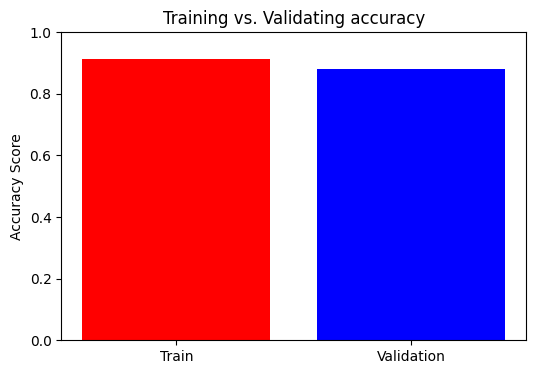

In [112]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_svm_grid_1,validation_accuracy_svm_grid_1], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

Testing for SVM


In [113]:
y_pred_SVM = model_svm_grid_1.predict(X_test1)

In [114]:
SVM_acc = accuracy_score(y_test1, y_pred_SVM)
SVM_per = precision_score(y_test1, y_pred_SVM)
SVM_rec = recall_score(y_test1, y_pred_SVM)
SVM_f1 = f1_score(y_test1, y_pred_SVM)

print("Accuracy:", SVM_acc)
print("Precision:", SVM_per)
print("Recall:", SVM_rec)
print("F1 Score:", SVM_f1)

Accuracy: 0.8375634517766497
Precision: 0.8333333333333334
Recall: 0.8152173913043478
F1 Score: 0.8241758241758241


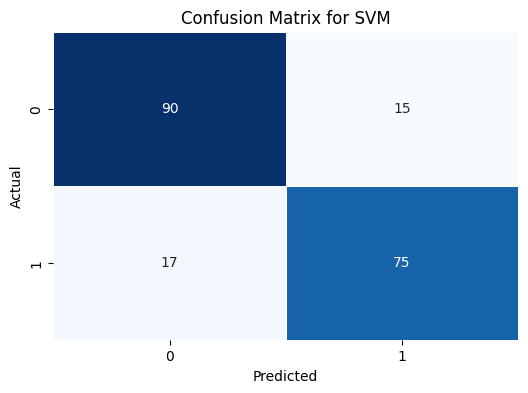

In [115]:
conf_matrix = confusion_matrix(y_test1, y_pred_SVM)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [116]:
# # Fit the model
# model_svm123 = SVC(kernel='rbf', probability=True, C=6)
# model_svm123.fit(X_train1, y_train1)


false negative 

In [117]:


# Add class_weight='balanced' to prioritize the minority class
model_false_negatives = SVC(C=6,kernel='linear', class_weight='balanced', probability=True)
model_false_negatives.fit(X_train1, y_train1)


SVC(C=6, class_weight='balanced', kernel='linear', probability=True)

In [118]:




# Obtain decision scores and apply a lower threshold
y_scores = model_false_negatives.decision_function(X_test1)  # Decision scores from SVM
threshold = 0.0004 # Set a lower threshold to prioritize recall
y_pred_false_negatives = (y_scores >= threshold).astype(int)  # Predictions based on the threshold

# Evaluate the updated predictions
print("Classification Report with Recall Prioritized:")
print(classification_report(y_test1, y_pred_false_negatives))


Classification Report with Recall Prioritized:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       105
         0.0       0.00      0.00      0.00         0
         1.0       0.85      0.80      0.83        92

    accuracy                           0.38       197
   macro avg       0.28      0.27      0.28       197
weighted avg       0.40      0.38      0.39       197



c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

KNN

training before standraization 

In [119]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [120]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [121]:
train_accuracy_knn = model_knn.score(X_train,y_train)
train_accuracy_knn

0.7909738717339667

In [122]:
test_accuracy_knn = model_knn.score(X_test,y_test)
test_accuracy_knn

0.6598984771573604

In [123]:
validation_accuracy_knn = model_knn.score(X_val,y_val)
validation_accuracy_knn

0.6309523809523809

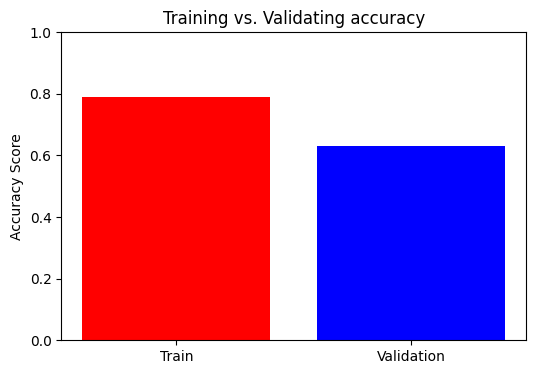

In [124]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_knn,validation_accuracy_knn], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

as we see before standraization without set any hyperparameters the model have overfitting



Apply Knn on data after standraization 


In [125]:
model_knn.fit(X_train1,y_train1)

KNeighborsClassifier()

In [126]:
train_accuracy_knn_1 = model_knn.score(X_train1,y_train1)
train_accuracy_knn_1

0.8836104513064132

In [127]:
test_accuracy_knn_1 = model_knn.score(X_test1,y_test1)
test_accuracy_knn_1

0.8071065989847716

In [128]:
validation_accuracy_knn_1 = model_knn.score(X_val1,y_val1)
validation_accuracy_knn_1

0.8333333333333334

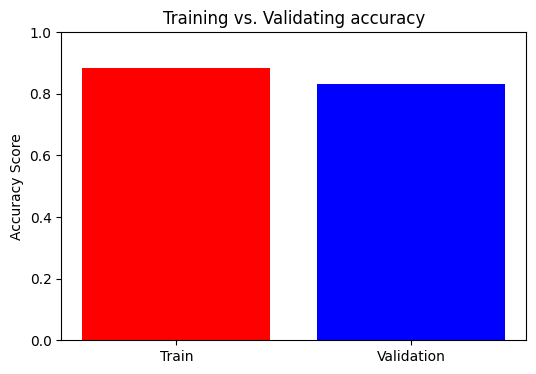

In [129]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_knn_1,validation_accuracy_knn_1], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

we can see that the data after Standraization is better for KNN





Grid search for KNN for data before standraization 

In [203]:
param_grid = {
    'n_neighbors': range(1, 51),               
    'weights': ['uniform', 'distance'],       
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2, 3, 4]                          
}
clf_knn = GridSearchCV(
    estimator=model_knn,
    param_grid=param_grid,
    cv=10,                    
    scoring='accuracy',      
    verbose=2,               
    n_jobs=-1               
)




In [204]:
clf_knn.fit(X_train, y_train)
print("Best Parameters:", clf_knn.best_params_)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 37, 'p': 1, 'weights': 'distance'}


try the hypeparameters of the gridsearch

In [205]:
model_knn_gridsearch = KNeighborsClassifier(
    n_neighbors=37,         
    weights='distance',     
    metric='manhattan',     
    p=1                     
)

In [206]:
model_knn_gridsearch.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=37, p=1,
                     weights='distance')

In [207]:
train_accuracy_knn_gridsearch = model_knn_gridsearch.score(X_train,y_train)
train_accuracy_knn_gridsearch

1.0

In [208]:
test_accuracy_knn_gridsearch = model_knn_gridsearch.score(X_test,y_test)
test_accuracy_knn_gridsearch

0.7309644670050761

In [209]:
validation_accuracy_knn_gridsearch = model_knn_gridsearch.score(X_val,y_val)
validation_accuracy_knn_gridsearch

0.6785714285714286

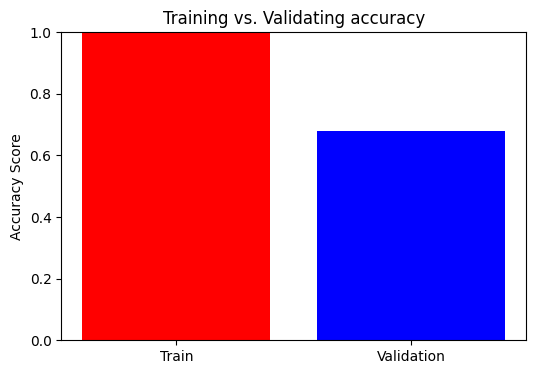

In [210]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_knn_gridsearch,validation_accuracy_knn_gridsearch], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

Gridsearch for data after standraization 

In [211]:
clf_knn.fit(X_train1, y_train1)
print("Best Parameters:", clf_knn.best_params_)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 33, 'p': 1, 'weights': 'uniform'}


try the hyperparameters of the gridsearch 

In [212]:
model_knn_gridsearch1 = KNeighborsClassifier(
    n_neighbors=33,         
    weights='uniform',     
    metric='manhattan',     
    p=1         
)

In [213]:
model_knn_gridsearch1.fit(X_train1,y_train1)

KNeighborsClassifier(metric='manhattan', n_neighbors=33, p=1)

In [214]:
train_accuracy_knn_gridsearch_1 = model_knn_gridsearch1.score(X_train1,y_train1)
train_accuracy_knn_gridsearch_1

0.850356294536817

In [215]:
test_accuracy_knn_gridsearch_1 = model_knn_gridsearch1.score(X_test1,y_test1)
test_accuracy_knn_gridsearch_1

0.8274111675126904

In [216]:
validation_accuracy_knn_gridsearch_1 = model_knn_gridsearch1.score(X_val1,y_val1)
validation_accuracy_knn_gridsearch_1

0.8095238095238095

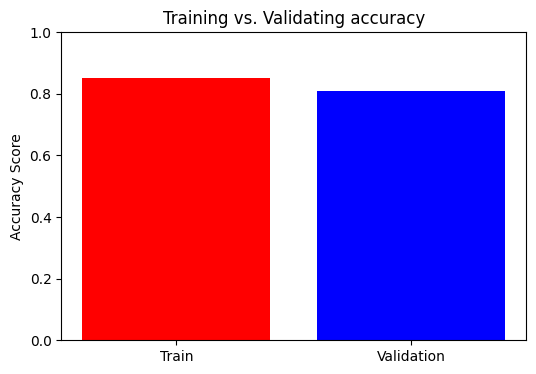

In [218]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_knn_gridsearch_1,validation_accuracy_knn_gridsearch_1], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

As we see that the standraization is very important in KNN

Testing KNN

In [336]:
y_pred_KNN = model_knn_gridsearch1.predict(X_test1)

In [337]:
KNN_acc = accuracy_score(y_test1, y_pred_KNN)
KNN_per = precision_score(y_test1, y_pred_KNN)
KNN_rec = recall_score(y_test1, y_pred_KNN)
KNN_f1 = f1_score(y_test1, y_pred_KNN)

print("Accuracy:", KNN_acc)
print("Precision:", KNN_per)
print("Recall:", KNN_rec)
print("F1 Score:", KNN_f1)

Accuracy: 0.8274111675126904
Precision: 0.9027777777777778
Recall: 0.7065217391304348
F1 Score: 0.7926829268292683


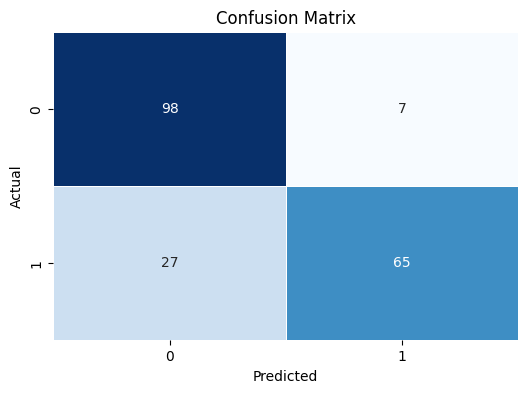

In [338]:
conf_matrix = confusion_matrix(y_test1, y_pred_KNN)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

false negatives for KNN

In [339]:
y_proba_knn = model_knn_gridsearch1.predict_proba(X_test1)[:, 1]
y_true_knn = y_test1


In [340]:
thresholds = np.arange(0.1, 1.0, 0.01)  
best_threshold = 0.5
min_false_negatives = float('inf')

for threshold in thresholds:
    y_pred_KNN1 = (y_proba_knn >= threshold).astype(int) 
    false_negatives = np.sum((y_true_knn == 1) & (y_pred_KNN1 == 0))  
    false_neg_rate = false_negatives / np.sum(y_true_knn == 1)  
    
    if false_neg_rate < min_false_negatives:
        min_false_negatives = false_neg_rate
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Minimum False Negative Rate: {min_false_negatives:.4f}")


Best Threshold: 0.1, Minimum False Negative Rate: 0.0652


In [344]:
threshold = 0.3
y_pred_KNN1 = (y_proba_knn >= threshold).astype(int) 


In [345]:
# Detailed Metrics
print("Classification Report:")
print(classification_report(y_test1, y_pred_KNN1))


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       105
         0.0       0.00      0.00      0.00         0
         1.0       0.82      0.88      0.85        92

    accuracy                           0.41       197
   macro avg       0.27      0.29      0.28       197
weighted avg       0.38      0.41      0.40       197



c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

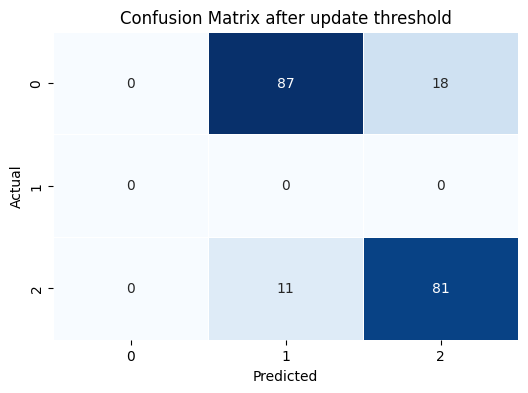

In [346]:
conf_matrix = confusion_matrix(y_test1, y_pred_KNN1)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix after update threshold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree 

before standraization 

In [247]:
from sklearn import tree 

model_decision_tree = tree.DecisionTreeClassifier()

In [248]:
model_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [249]:
train_accuracy_decision_tree = model_decision_tree.score(X_train,y_train)
train_accuracy_decision_tree

1.0

In [250]:
test_accuracy_decision_tree = model_decision_tree.score(X_test,y_test)
test_accuracy_decision_tree

0.8121827411167513

In [251]:
validation_accuracy_decision_tree = model_decision_tree.score(X_val,y_val)
validation_accuracy_decision_tree

0.8095238095238095

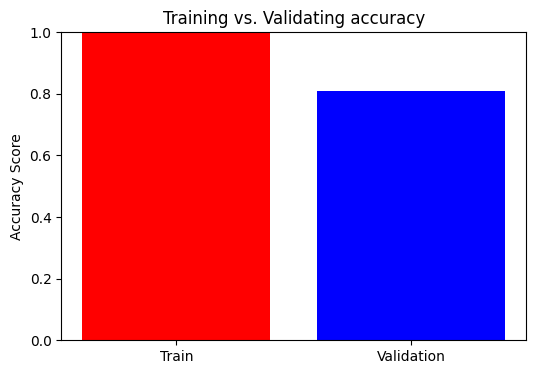

In [252]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_decision_tree,validation_accuracy_decision_tree], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

after standraization 

In [270]:


model_decision_tree_1 = tree.DecisionTreeClassifier()

In [271]:
model_decision_tree_1.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [272]:
train_accuracy_decision_tree_1 = model_decision_tree_1.score(X_train1,y_train1)
train_accuracy_decision_tree_1

1.0

In [273]:
test_accuracy_decision_tree_1 = model_decision_tree_1.score(X_test1,y_test1)
test_accuracy_decision_tree_1

0.7918781725888325

In [274]:
validation_accuracy_decision_tree_1 = model_decision_tree_1.score(X_val1,y_val1)
validation_accuracy_decision_tree_1

0.7976190476190477

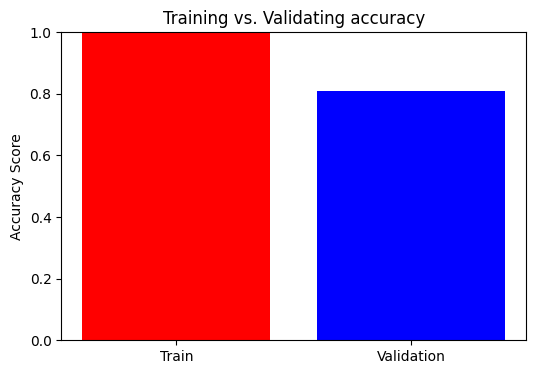

In [275]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_decision_tree,validation_accuracy_decision_tree], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

as we can see that the descision tree make overfitting in both cases 

grid search before satndraization 

In [287]:
param_grid = {
    'criterion': ['gini', 'entropy'],                   # Split criteria
    'max_depth': [None, 5, 10, 15, 20, 25, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20, 50],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10, 20],               # Minimum samples for leaf nodes
    'max_features': [None, 'sqrt', 'log2', 2, 5, 10],    # Number of features to consider for split
    'splitter': ['best', 'random'],                    
    'class_weight': [None, 'balanced']                   # Handle class imbalance
}
clf_dt =  GridSearchCV(
    estimator=model_decision_tree,
    param_grid=param_grid,
    cv=10,                    
    scoring='accuracy',      
    verbose=2,               
    n_jobs=-1               
)


In [288]:
clf_dt.fit(X_train,y_train)
print("Best Parameters:", clf_dt.best_params_)


Fitting 10 folds for each of 8400 candidates, totalling 84000 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}


try hyperparameters 

In [294]:
model_decision_tree_grid = tree.DecisionTreeClassifier(
    criterion='gini', 
    max_depth=20, 
    max_features=5, 
    min_samples_leaf=1, 
    min_samples_split=20, 
    splitter='random', 
    class_weight='balanced',  
    random_state=42     
)

In [295]:
model_decision_tree_grid.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, max_features=5,
                       min_samples_split=20, random_state=42,
                       splitter='random')

In [296]:
train_accuracy_decision_tree_grid = model_decision_tree_grid.score(X_train,y_train)
train_accuracy_decision_tree_grid

0.8598574821852731

In [297]:
test_accuracy_decision_tree_grid = model_decision_tree_grid.score(X_test,y_test)
test_accuracy_decision_tree_grid

0.8477157360406091

In [298]:
validation_accuracy_decision_tree_grid = model_decision_tree_grid.score(X_train,y_train)
validation_accuracy_decision_tree_grid

0.8598574821852731

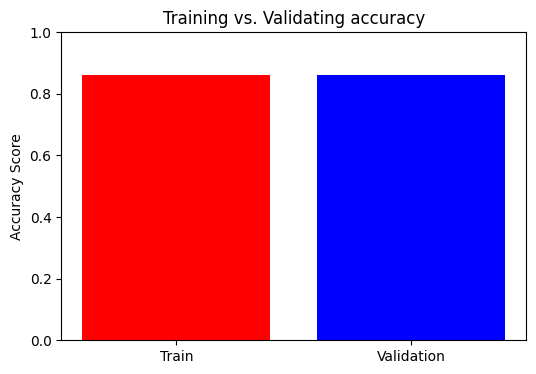

In [300]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_decision_tree_grid,validation_accuracy_decision_tree_grid], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

grid search after standraization 

In [301]:
clf_dt.fit(X_train1,y_train1)
print("Best Parameters:", clf_dt.best_params_)

Fitting 10 folds for each of 8400 candidates, totalling 84000 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 25, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}


In [302]:
model_decision_tree_grid1 = tree.DecisionTreeClassifier(
    criterion='gini', 
    max_depth=25, 
    max_features=5, 
    min_samples_leaf=5, 
    min_samples_split=10, 
    splitter='random', 
    class_weight='balanced',  
    random_state=42     
)

In [303]:
model_decision_tree_grid1.fit(X_train1,y_train1)

DecisionTreeClassifier(class_weight='balanced', max_depth=25, max_features=5,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42, splitter='random')

In [305]:
train_accuracy_decision_tree_grid_1 = model_decision_tree_grid1.score(X_train1,y_train1)
train_accuracy_decision_tree_grid_1

0.8622327790973872

In [307]:
test_accuracy_decision_tree_grid_1 = model_decision_tree_grid1.score(X_test1,y_test1)
test_accuracy_decision_tree_grid_1

0.8477157360406091

In [308]:
validation_accuracy_decision_tree_grid_1 = model_decision_tree_grid1.score(X_val1,y_val1)
validation_accuracy_decision_tree_grid_1

0.8452380952380952

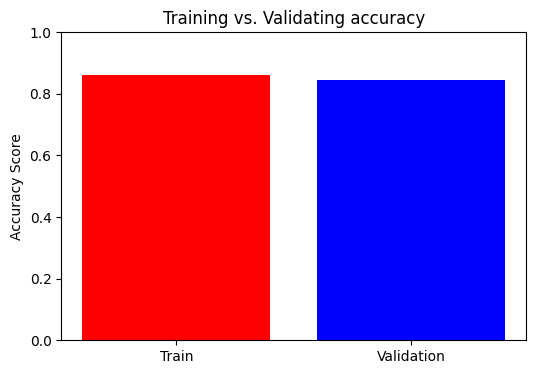

In [309]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_decision_tree_grid_1,validation_accuracy_decision_tree_grid_1], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

Testing Decision tree

In [310]:
y_pred_dt = model_decision_tree_grid1.predict(X_test1)

In [311]:
dt_acc = accuracy_score(y_test1, y_pred_dt)
dt_per = precision_score(y_test1, y_pred_dt)
dt_rec = recall_score(y_test1, y_pred_dt)
dt_f1 = f1_score(y_test1, y_pred_dt)

print("Accuracy:", dt_acc)
print("Precision:", dt_per)
print("Recall:", dt_rec)
print("F1 Score:", dt_f1)

Accuracy: 0.8477157360406091
Precision: 0.8163265306122449
Recall: 0.8695652173913043
F1 Score: 0.8421052631578947


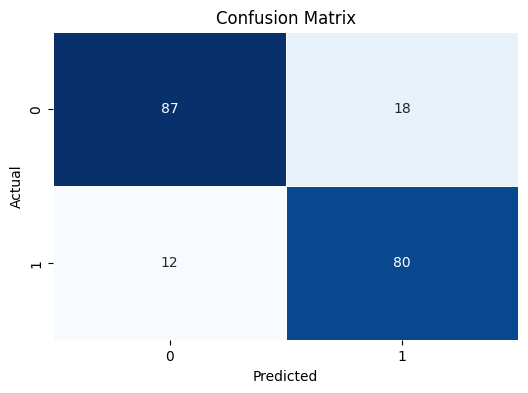

In [312]:
conf_matrix = confusion_matrix(y_test1, y_pred_dt)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

as we can see that in descision tree false negatives is not high so the risk is reduced

classification report for all algorithms 

In [348]:
Models = ['Naive bayes', 'SVC', 'KNN', 'DecisionTreeClassifier']
Accuracy = [bayes_acc,SVM_acc,KNN_acc,dt_acc]
Precision = [bayes_per,SVM_per,KNN_per,dt_per]
Recall = [bayes_rec,SVM_rec,KNN_rec,dt_rec]

models = pd.DataFrame(data={'Models': Models,'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall})
models

Models  Accuracy  Precision    Recall
0             Naive bayes  0.802030   0.767677  0.826087
1                     SVC  0.837563   0.833333  0.815217
2                     KNN  0.827411   0.902778  0.706522
3  DecisionTreeClassifier  0.847716   0.816327  0.869565

dendogram 

In [349]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

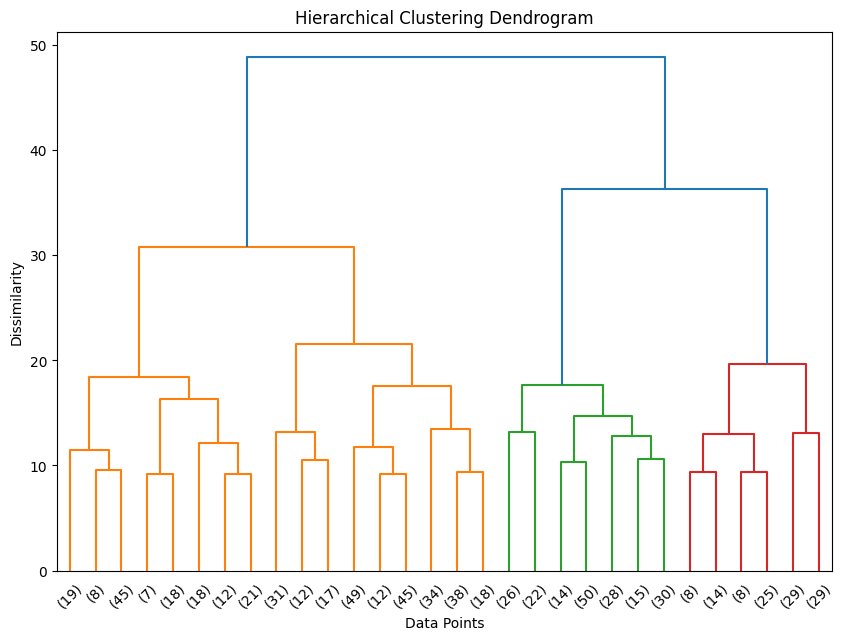

Optimal number of clusters: 3


In [350]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Dissimilarity')
plt.show()
from scipy.cluster.hierarchy import fcluster
optimal_clusters = fcluster(linked, t=3, criterion='maxclust') 
print(f"Optimal number of clusters: {len(set(optimal_clusters))}")

In [351]:
from scipy.cluster.hierarchy import fcluster

optimal_clusters = fcluster(linked, t=3, criterion='maxclust')
print(f"Optimal number of clusters based on the dendrogram: {len(set(optimal_clusters))}")

Optimal number of clusters based on the dendrogram: 3
